# Part 1

## A

## Reasons for Modeling: Interpolation

One common use of modeling is interpolation to determine a value "inside" or "in between" the measured data points. In this exercise, you will make a prediction for the value of the dependent variable distances for a given independent variable times that falls "in between" two measurements from a road trip, where the distances are those traveled for the given elapse times.

In [14]:
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
np.random.seed(42)
distances = np.array([   0.        ,   44.04512153,  107.16353484,  148.43674052,
        196.39705633,  254.4358147 ,  300.        ])
times = np.array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.])

# Compute the total change in distance and change in time
total_distance = distances[-1] - distances[0]
total_time = times[-1] - times[0]

# Estimate the slope of the data from the ratio of the changes
average_speed = total_distance / total_time

# Predict the distance traveled for a time not measured
elapse_time = 2.5
distance_traveled = average_speed * elapse_time
print("The distance traveled is {}".format(distance_traveled))

The distance traveled is 125.0


## Reasons for Modeling: Extrapolation

Another common use of modeling is extrapolation to estimate data values "outside" or "beyond" the range (min and max values of time) of the measured data. In this exercise, we have measured distances for times 0 through 5 hours, but we are interested in estimating how far we'd go in 8 hours. Using the same data set from the previous exercise, we have prepared a linear model distance = model(time). Use that model() to make a prediction about the distance traveled for a time much larger than the other times in the measurements.

In [66]:
def model(time, a0=0, a1=50):
    """
    Purpose: 
    For a given value of time, compute the model value for distance
    Args:
    time (float, np.ndarray): elapse time in units of hours
    a0 (float): default=0, coefficient for the Zeroth order term in the model, i.e. a0 + a1*x
    a1 (float): default=50, coefficient for the 1st order term in the model, i.e. a0 + a1*x
    Returns:
    distance (float, np.ndarray): model values corresponding to input time array, 
                                    with the same length/size.
    """
    distance = a0 + (a1*time)
    return distance

# Select a time not measured.
time = 8

# Use the model to compute a predicted distance for that time.
distance = model(time)

# Inspect the value of the predicted distance traveled.
print(distance)

# Determine if you will make it without refueling.
answer = (distance <= 400)
print(answer)

400
True


## Reasons for Modeling: Estimating Relationships

Another common application of modeling is to compare two data sets by building models for each, and then comparing the models. In this exercise, you are given data for a road trip two cars took together. The cars stopped for gas every 50 miles, but each car did not need to fill up the same amount, because the cars do not have the same fuel efficiency (MPG). Complete the function efficiency_model(miles, gallons) to estimate efficiency as average miles traveled per gallons of fuel consumed. Use the provided dictionaries car1 and car2, which both have keys car['miles'] and car['gallons'].

In [67]:
car1 = {'gallons': np.array([  0.03333333,   1.69666667,   3.36      ,   5.02333333,
          6.68666667,   8.35      ,  10.01333333,  11.67666667,
         13.34      ,  15.00333333,  16.66666667]),
 'miles': np.array([   1. ,   50.9,  100.8,  150.7,  200.6,  250.5,  300.4,  350.3,
         400.2,  450.1,  500. ])}
car2 = {'gallons': np.array([  0.02 ,   1.018,   2.016,   3.014,   4.012,   5.01 ,   6.008,
          7.006,   8.004,   9.002,  10.   ]),
 'miles': np.array([   1. ,   50.9,  100.8,  150.7,  200.6,  250.5,  300.4,  350.3,
         400.2,  450.1,  500. ])}
# Complete the function to model the efficiency.
def efficiency_model(miles, gallons):
   return np.mean( miles / gallons )

# Use the function to estimate the efficiency for each car.
car1['mpg'] = efficiency_model(car1['miles'] , car1['gallons'] )
car2['mpg'] = efficiency_model(car2['miles'] , car2['gallons'] )

# Finish the logic statement to compare the car efficiencies.
if car1['mpg'] > car2['mpg'] :
    print('car1 is the best')
elif car1['mpg'] < car2['mpg'] :
    print('car2 is the best')
else:
    print('the cars have the same efficiency')

car2 is the best


## B

## Plotting the Data

Everything in python is an object, even modules. Your goal in this exercise is to review the use of the object oriented interfaces to the python library matplotlib in order to visualize measured data in a more flexible and extendable work flow. The general plotting work flow looks like this:

import matplotlib.pyplot as plt 
fig, axis = plt.subplots()
axis.plot(x, y, color="green", linestyle="--", marker="s")
plt.show()

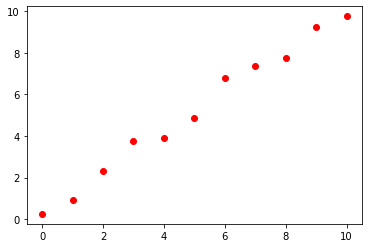

In [68]:
import matplotlib.pyplot as plt
times = np.array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])
distances = np.array([ 0.24835708,  0.93086785,  2.32384427,  3.76151493,  3.88292331,
        4.88293152,  6.78960641,  7.38371736,  7.76526281,  9.27128002,
        9.76829115])
# Create figure and axis objects using subplots()
fig, axis = plt.subplots()

# Plot line using the axis.plot() method
line = axis.plot(times , distances , linestyle=" ", marker="o", color="red")

# Use the plt.show() method to display the figure
plt.show()

## Plotting the Model on the Data

Continuing with the same measured data from the previous exercise, your goal is to use a predefined model() and measured data times and measured_distances to compute modeled distances, and then plot both measured and modeled data on the same axis.

In [69]:
def model(x, y, a0=0, a1=1):
    """
    Purpose: 
        For a given data set, input as two arrays, x and y, 
        compute the model value for all modeled values 'ym'
    Args:
        x (float, np.ndarray):
        y (float, np.ndarray): 
        a0 (float): default=0, coefficient for the Zeroth order term in the model, i.e. a0 + a1*x
        a1 (float): default=50, coefficient for the 1st order term in the model, i.e. a0 + a1*x
    Returns:
        ym (float, np.ndarray): model values corresponding to input x array, with the same length/size.
    """
    ym = a0 + (a1*x)
    return ym

In [70]:
measured_distances = np.array([ 0.24835708,  0.93086785,  2.32384427,  3.76151493,  3.88292331,
        4.88293152,  6.78960641,  7.38371736,  7.76526281,  9.27128002,
        9.76829115])

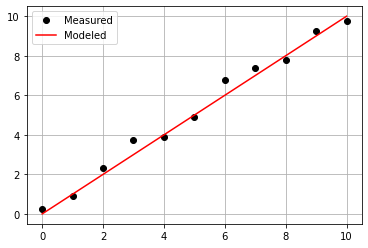

In [71]:
# Pass times and measured distances into model
model_distances = model(times, measured_distances)

# Create figure and axis objects and call axis.plot() twice to plot data and model distances versus times
fig, axis = plt.subplots()
axis.plot(times, measured_distances, linestyle=" ", marker="o", color="black", label="Measured")
axis.plot(times, model_distances, linestyle="-", marker=None, color="red", label="Modeled")

# Add grid lines and a legend to your plot, and then show to display
axis.grid(True)
axis.legend(loc="best")
plt.show()

## Visually Estimating the Slope & Intercept

Building linear models is an automated way of doing something we can roughly do "manually" with data visualization and a lot of trial-and-error. The visual method is not the most efficient or precise method, but it does illustrate the concepts very well, so let's try it!

Given some measured data, your goal is to guess values for slope and intercept, pass them into the model, and adjust your guess until the resulting model fits the data. Use the provided data xd, yd, and the provided function model() to create model predictions. Compare the predictions and data using the provided plot_data_and_model()

In [72]:
def model(a0=2, a1=1):
    """
    Purpose: 
        For a given data set, input as two arrays, x and y, 
        compute the model value for all modeled values 'ym'
    Args:
        trial_intercept (float): default=0, coefficient for the Zeroth order term in the model, 
                                i.e. a0 + a1*x
        trial_slope (float): default=50, coefficient for the 1st order term in the model, i.e. a0 + a1*x\n    Returns:\n        xm (float, np.ndarray): model values for independent variable\n        ym (float, np.ndarray): model values of depedent variable, with the same length/size as xm.
    """
    xm = np.linspace(-5, 15, 41)
    ym = a0 + (a1*xm)
    return xm, ym

In [73]:
def plot_data_and_model(xd, yd, xm, ym):
    """
    Purpose:
        Plot both the measured data and the model on the same figure.
        Measured data will be black point markers with no line
        Modeled data will be a solid red line with no point markers
    Args:
        xd (np.ndarray): numpy array of indendent variable, measured data
        yd (np.ndarray): numpy array of dendent variable, measured data
        xm (np.ndarray): numpy array of indendent variable, model data
        ym (np.ndarray): numpy array of dendent variable, model data
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    from matplotlib.ticker import MultipleLocator
    fig, axis = plt.subplots()
    axis.plot(xd, yd, color="black", linestyle=" ", marker="o", label="Measured")
    axis.plot(xm, ym, color="red", linestyle="-", marker=None, label="Modeled")
    axis.axvline(0, color='black')
    axis.axhline(0, color='black')
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_xlim([-11, 11])
    axis.set_ylim([-11, 11])
    axis.grid(True, which="both")
    axis.legend(loc=2)
    return fig

In [74]:
xd = np.array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ])
yd = np.array([ 4.24835708,  4.43086785,  5.32384427,  6.26151493,  5.88292331,
        6.38293152,  7.78960641,  7.88371736,  7.76526281,  8.77128002,
        8.76829115])

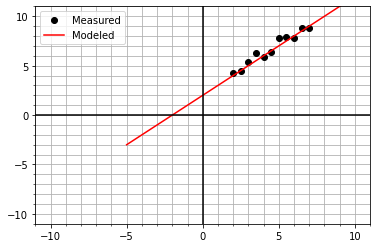

In [75]:
# Look at the plot data and guess initial trial values
trial_slope = (9 - 4) / (7 - 2)
trial_intercept = 9 - 7

# input thoses guesses into the model function to compute the model values.
xm, ym = model(trial_intercept, trial_slope)

# Compare your your model to the data with the plot function
fig = plot_data_and_model(xd, yd, xm, ym)
plt.show()

# Repeat the steps above until your slope and intercept guess makes the model line up with the data.
final_slope = (9 - 4) / (7 - 2)
final_intercept = 9 - 7

## C

## Mean, Deviation, & Standard Deviation

The mean describes the center of the data. The standard deviation describes the spread of the data. But to compare two variables, it is convenient to normalize both. In this exercise, you are provided with two arrays of data, which are highly correlated, and you will compute and visualize the normalized deviations of each array.

In [76]:
x = np.array([ 3.20141089,  3.57332076,  4.2284669 ,  4.27233051,  4.49370529,
        4.5713193 ,  4.74611933,  4.9143694 ,  5.06416613,  5.12046366,
        5.1332596 ,  5.1382451 ,  5.19463348,  5.30012277,  5.32111385,
        5.361098  ,  5.3622485 ,  5.42139975,  5.55601804,  5.56564872,
        5.57108737,  5.60910021,  5.74438063,  5.82636432,  5.85993128,
        5.90529103,  5.98816951,  6.00284592,  6.2829785 ,  6.28362732,
        6.33858905,  6.3861864 ,  6.41291216,  6.57380586,  6.68822271,
        6.73736858,  6.9071052 ,  6.92746243,  6.97873601,  6.99734545,
        7.0040539 ,  7.17582904,  7.26593626,  7.49073203,  7.49138963,
        7.65143654,  8.18678609,  8.20593008,  8.23814334,  8.39236527])
y = np.array([ 146.48264883,  167.75876162,  229.73232314,  205.23686657,
        224.99693822,  239.79378267,  246.65838372,  264.14477475,
        268.91257002,  267.25180588,  248.54953839,  265.25831322,
        263.03153004,  251.08035094,  280.93733241,  276.53088378,
        268.59007072,  268.62252076,  265.21874   ,  280.37743899,
        283.47297931,  271.72788298,  299.42217399,  279.79758387,
        270.70401032,  306.18168601,  295.17313188,  298.81898515,
        305.35499931,  297.3187572 ,  330.10944498,  312.07619563,
        338.08560914,  337.16702908,  331.10617501,  325.46645358,
        337.66440893,  333.64162871,  370.85149057,  351.59390525,
        362.27985309,  345.48425572,  365.1976818 ,  386.90415177,
        371.05186831,  393.39852867,  397.95134137,  395.98005292,
        415.89087335,  415.63691073])

In [77]:
def plot_cdfs(dx, dy, zx, xy):
    array_index = list(range(len(x)))
    fig, axes = plt.subplots(nrows=2, ncols=1)
    axes[0].plot(array_index, dx, color="blue")
    axes[0].plot(array_index, dy, color="red")
    axes[0].set_ylabel("Deviations of X and Y")
    axes[1].plot(array_index, zx, color="blue")
    axes[1].plot(array_index, zy, color="red")
    axes[1].set_ylabel("Normalized Deviations of X and Y")
    axes[1].set_xlabel("Array Index")
    plt.tight_layout

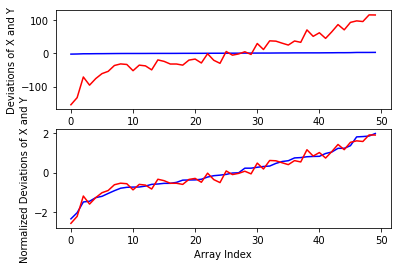

In [78]:
# Compute the deviations by subtracting the mean offset
dx = x - np.mean(x)
dy = y - np.mean(y)

# Normalize the data by dividing the deviations by the standard deviation
zx = dx / np.std(x)
zy = dy / np.std(y)

# Plot comparisons of the raw data and the normalized data
fig = plot_cdfs(dx, dy, zx, zy)

## Covariance vs Correlation

Covariance is a measure of whether two variables change ("vary") together. It is calculated by computing the products, point-by-point, of the deviations seen in the previous exercise, dx[n]*dy[n], and then finding the average of all those products.

Correlation is in essence the normalized covariance. In this exercise, you are provided with two arrays of data, which are highly correlated, and you will visualize and compute both the covariance and the correlation.

In [79]:
def plot_normalized_deviations(zx, zy):
    fig, axis = plt.subplots()
    lines = axis.plot(zx * zy, color="purple")
    axis.axhline(0, color="black", linestyle="--")
    axis.set_ylabel("Product of Normalized Deviations")
    axis.set_xlabel("Array Index")
    axis.set_title("Correlation = np.mean(zx*zy) = {:0.2f}".format(correlation))
    plt.show()
    return fig

Covariance:  69.67981827138166
Correlation:  0.9824333697735637


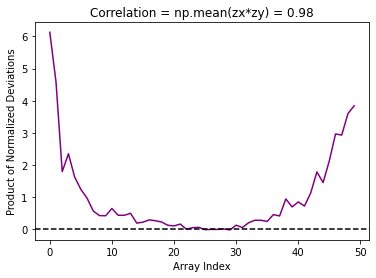

In [80]:
# Compute the covariance from the deviations.
dx = x - np.mean(x)
dy = y - np.mean(y)
covariance = np.mean(dx * dy)
print("Covariance: ", covariance)

# Compute the correlation from the normalized deviations.
zx = dx / np.std(x)
zy = dy / np.std(y)
correlation = np.mean(zx * zy)
print("Correlation: ", correlation)

# Plot the normalized deviations for visual inspection. 
fig = plot_normalized_deviations(zx, zy)

## Correlation Strength

Intuitively, we can look at the plots provided and "see" whether the two variables seem to "vary together".

* Data Set A: x and y change together and appear to have a strong relationship.
* Data Set B: there is a rough upward trend; x and y appear only loosely related.
* Data Set C: looks like random scatter; x an y do not appear to change together and are unrelated.

Recall that deviations differ from the mean, and we normalized by dividing the deviations by standard deviation. In this exercise you will compare the 3 data sets by computing correlation, and determining which data set has the most strongly correlated variables x and y. Use the provided data table data_sets, a dictionary of records, each having keys 'name', 'x', 'y', and 'correlation'.

In [81]:
data_sets = {'A': {'correlation': np.nan,
  'x': np.array([ 2.55041235,  2.60839969,  2.79619981,  2.84385271,  3.15184751,
          3.21906477,  3.23462037,  3.33976744,  3.47394544,  3.56125803,
          3.67786134,  3.7339611 ,  3.86496991,  4.10019474,  4.24786673,
          4.24920164,  4.29714059,  4.31952159,  4.41315702,  4.41783781,
          4.42072788,  4.42420154,  4.62362038,  4.63538281,  4.70730828,
          4.7073288 ,  4.71777962,  4.82716962,  4.85543965,  4.98312847,
          5.08441026,  5.13865324,  5.21421035,  5.24607654,  5.26107949,
          5.30245284,  5.39280917,  5.42952286,  5.46962252,  5.62089269,
          5.67820005,  5.80961067,  5.92308322,  5.95929341,  6.02818114,
          6.32140278,  6.83206096,  6.90378732,  6.97401602,  7.31534773]),
  'y': np.array([  5.18184568,   5.12052882,   5.42316911,   5.84062449,
           6.5614449 ,   6.67094956,   6.25943637,   6.60223178,
           7.03070673,   7.36640234,   7.23592912,   7.42150745,
           7.45335607,   7.90133782,   8.69886493,   8.83746328,
           8.57627865,   8.88992641,   8.91672304,   8.67439568,
           8.93180467,   9.23291221,   9.23828425,   9.66192654,
           8.75968029,   9.62013323,   9.45732102,   9.57958741,
           9.73381949,   9.46936471,  10.11390254,  10.36658462,
          10.79789421,  10.36258554,  10.32003559,  10.47946642,
          11.01446886,  10.9412335 ,  10.80680499,  11.37010224,
          11.3806695 ,  11.86138259,  11.67065318,  11.83667129,
          11.95833524,  12.27692683,  13.73815199,  13.87283846,
          13.9493104 ,  14.57204868])},
 'B': {'correlation': np.nan,
  'x': np.array([ 2.19664381,  2.406278  ,  2.47343147,  2.72871597,  3.06636806,
          3.51128038,  3.87855402,  4.09926408,  4.18003832,  4.20434562,
          4.29194259,  4.41336839,  4.50269971,  4.58240329,  4.59650649,
          4.60918513,  4.74669209,  4.77111432,  4.82900646,  4.84738553,
          5.00264796,  5.01962047,  5.02286149,  5.04517742,  5.09524948,
          5.15589119,  5.24177672,  5.26908573,  5.30974025,  5.36136493,
          5.42179707,  5.50681676,  5.58929395,  5.69179864,  5.84444261,
          5.94426748,  6.05209339,  6.07448552,  6.07964661,  6.10895368,
          6.19165516,  6.23993253,  6.30742282,  6.30947322,  6.32371148,
          6.43754466,  6.64768944,  6.65144774,  6.79088371,  7.98870064]),
  'y': np.array([  7.75732279,  -0.97068431,  -0.66103018,   5.05375913,
           3.93976632,   6.44408273,   9.17318937,   8.05647607,
          10.62302986,  14.59132646,   4.68693984,   8.54535728,
          10.23727485,   8.33081153,  13.32821592,  -0.38344428,
          17.61579867,   4.97170349,  10.50554646,  12.51365356,
           6.86355506,  11.88747988,  12.86263588,  12.18438671,
           6.48548172,  18.34315419,  11.39140361,   5.92753502,
          13.14739828,  10.8807806 ,  12.70116343,  -3.24043311,
          16.46301037,  11.99411949,  12.34700338,  10.16815219,
          15.17366173,  16.0886504 ,  13.24263662,  17.78585212,
          12.70267957,  10.88000673,   8.5034434 ,  10.28007359,
          15.91379868,  12.5473011 ,  11.91631483,  15.41604806,
           9.30581229,  13.92987605])},
 'C': {'correlation': np.nan,
  'x': np.array([ 1.50176362,  1.96665095,  2.78558362,  2.84041313,  3.11713161,
          3.21414912,  3.43264917,  3.64296175,  3.83020766,  3.90057957,
          3.9165745 ,  3.92280638,  3.99329185,  4.12515346,  4.15139231,
          4.2013725 ,  4.20281062,  4.27674969,  4.44502255,  4.45706091,
          4.46385921,  4.51137526,  4.68047579,  4.7829554 ,  4.8249141 ,
          4.88161379,  4.98521188,  5.00355739,  5.35372312,  5.35453415,
          5.42323631,  5.482733  ,  5.5161402 ,  5.71725733,  5.86027839,
          5.92171072,  6.13388149,  6.15932804,  6.22342001,  6.24668181,
          6.25506737,  6.46978631,  6.58242032,  6.86341504,  6.86423703,
          7.06429567,  7.73348261,  7.7574126 ,  7.79767917,  7.99045658]),
  'y': np.array([-17.70183793, -12.68730947,  33.47056284,  -7.0881775 ,
           6.7091949 ,  23.53735376,  21.11660059,  35.3641024 ,
          31.59072152,  24.91144186,  -4.53019043,  20.56341545,
          13.01493562, -12.96994045,  30.97956936,  21.31852956,
           9.13346253,   4.82402639, -10.28277321,  12.10650699,
          16.42274434,  -4.27572923,  27.95621636,  -7.98933795,
         -24.3197774 ,  26.39886103,   3.51656715,   7.99064142,
          -2.69282132, -14.98633586,  30.93027062,  -0.05643774,
          37.60752021,  24.35144564,   6.68442643,  -5.53101698,
           0.5483712 ,  -7.08171402,  45.84065377,  15.1244233 ,
          30.91342343,  -7.33806017,  16.06140272,  32.57262109,
           8.36830187,  30.62642269,  -1.88612137,  -6.30071951,
          21.66576814,   9.91409021])}}

Text(0.5, 1.0, 'Dataset C, Correlation = ?')

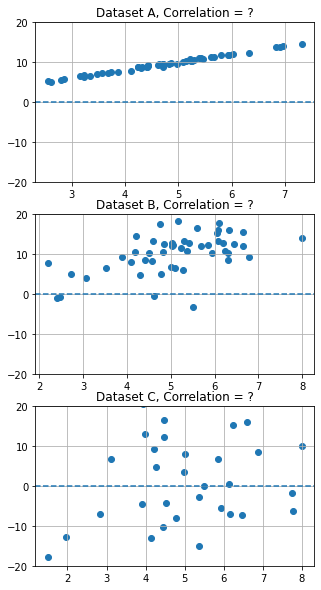

In [82]:
fig, axs = plt.subplots(3, 1, figsize=(5, 10))

axs[0].scatter(data_sets['A']['x'], data_sets['A']['y'])
axs[0].set_ylim([-20, 20])
axs[0].axhline(0, linestyle='--')
axs[0].grid(True)
axs[0].set_title('Dataset A, Correlation = ?')
axs[1].scatter(data_sets['B']['x'], data_sets['B']['y'])
axs[1].set_ylim([-20, 20])
axs[1].axhline(0, linestyle='--')
axs[1].grid(True)
axs[1].set_title('Dataset B, Correlation = ?')
axs[2].scatter(data_sets['C']['x'], data_sets['C']['y'])
axs[2].set_ylim([-20, 20])
axs[2].axhline(0, linestyle='--')
axs[2].grid(True)
axs[2].set_title('Dataset C, Correlation = ?')

In [83]:
# Complete the function that will compute correlation.
def correlation(x,y):
    x_dev = x - np.mean(x)
    y_dev = y - np.mean(y)
    x_norm = x_dev / np.std(x)
    y_norm = y_dev / np.std(y)
    return np.mean(x_norm * y_norm)

# Compute and store the correlation for each data set in the list.
for name, data in data_sets.items():
    data['correlation'] = correlation(data['x'], data['y'])
    print('data set {} has correlation {:.2f}'.format(name, data['correlation']))

# Assign the data set with the best correlation.
best_data = data_sets['A']

data set A has correlation 1.00
data set B has correlation 0.54
data set C has correlation 0.09


# Part 2

## A

## Model Components

Previously, you have been given a pre-defined model to work with. In this exercise, you will implement a model function that returns model values for y, computed from input x data, and any input coefficients for the "zero-th" order term a0, the "first-order" term a1, and a quadratic term a2 of a model (see below).

### y = a0 + a1x + a2 x2

Recall that "first order" is linear, so we'll set the defaults for this general linear model with a2=0, but later, we will change this for comparison

In [84]:
def plot_prediction(x, y):
    """
    Purpose:
        Create a plot of y versus x
    Args:
        x (np.array): array of values for the indepent variable, e.g. times
        y (np.array): array of values for the depedent variable, e.g. distances
    Returns:
        fig (matplotlib.figure): matplotlib figure object
    """
    fig, axis = plt.subplots()
    lines = axis.plot(x, y, color="red", marker='o')
    axis.axhline(0, color="black", linestyle="-")
    axis.axvline(0, color="black", linestyle="-")
    axis.set_ylabel("Y")
    axis.set_xlabel("X")
    axis.set_title("Plot of modeled Y for given X")
    axis.grid(True)
    plt.show()
    return fig

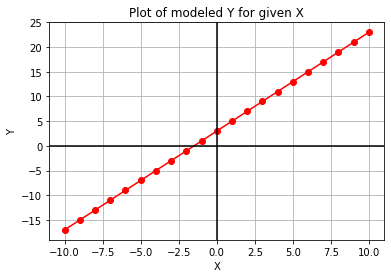

In [85]:
# Define the general model as a function
def model(x, a0=3, a1=2, a2=0):
    return a0 + (a1*x) + (a2*x*x)

# Generate array x, then predict y values for specific, non-default a0 and a1
x = np.linspace(-10, 10, 21)
y = model(x)

# Plot the results, y versus x
fig = plot_prediction(x, y)

## Model Parameters

Now that you've built a general model, let's "optimize" or "fit" it to a new (preloaded) measured data set, xd, yd, by finding the specific values for model parameters a0, a1 for which the model data and the measured data line up on a plot.

This is an iterative visualization strategy, where we start with a guess for model parameters, pass them into the model(), over-plot the resulting modeled data on the measured data, and visually check that the line passes through the points. If it doesn't, we change the model parameters and try again.

In [111]:
xd = np.array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])
yd = np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188])

In [112]:
def plot_data(x, y):
    """
    Purpose:
        Create a plot of y versus x
    Args:
        x (np.array): array of values for the indepent variable, e.g. times
        y (np.array): array of values for the depedent variable, e.g. distances
    Returns:
        fig (matplotlib.figure): matplotlib figure object
    """
    from matplotlib.ticker import MultipleLocator
    fig, axis = plt.subplots(figsize=(8,6))
    axis.plot(x, y, color="black", linestyle=" ", marker="o")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.set_ylim([-5*50, 15*50])
    axis.set_xlim([-5, 15])
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0*50))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0*50))
    axis.set_ylabel('Altitude (meters)')
    axis.set_xlabel('Step Distance (km)')
    axis.set_title("Hiking  Trip")
    return fig

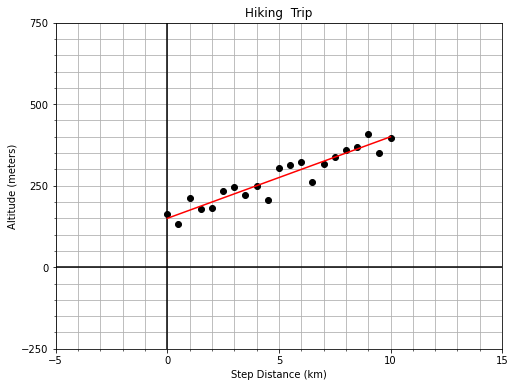

In [113]:
# Complete the plotting function definition
def plot_data_with_model(xd, yd, ym):
    fig = plot_data(xd, yd)  # plot measured data
    fig.axes[0].plot(xd, ym, color='red')  # over-plot modeled data
    plt.show()
    return fig

# Select new model parameters a0, a1, and generate modeled `ym` from them.
a0 = 150
a1 = 25
ym = model(xd, a0, a1)

# Plot the resulting model to see whether it fits the data
fig = plot_data_with_model(xd, yd, ym)

## B

## Linear Proportionality

The definition of temperature scales is related to the linear expansion of certain liquids, such as mercury and alcohol. Originally, these scales were literally rulers for measuring length of fluid in the narrow marked or "graduated" tube as a proxy for temperature. The alcohol starts in a bulb, and then expands linearly into the tube, in response to increasing temperature of the bulb or whatever surrounds it.

In this exercise, we will explore the conversion between the Fahrenheit and Celsius temperature scales as a demonstration of interpreting slope and intercept of a linear relationship within a physical context.

In [101]:
def plot_temperatures(temps_C, temps_F):
    fig, axis = plt.subplots(figsize=(16,4))
    axis.plot(temps_C, temps_F)
    axis.set_xlabel("Temperature (Celsius)")
    axis.set_ylabel("Temperature (Fahrenheit)")
    axis.grid()
    plt.show()
    return fig

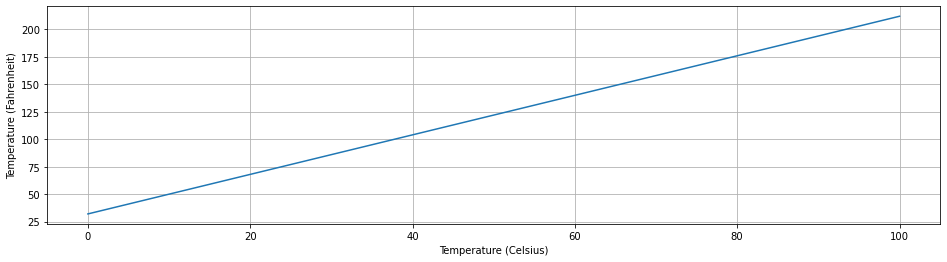

In [102]:
# Complete the function to convert C to F
def convert_scale(temps_C):
    (freeze_C, boil_C) = (0, 100)
    (freeze_F, boil_F) = (32, 212)
    change_in_C = boil_C - freeze_C
    change_in_F = boil_F - freeze_F
    slope = change_in_F / change_in_C
    intercept = freeze_F - freeze_C
    temps_F = intercept + (slope * temps_C)
    return temps_F

# Use the convert function to compute values of F and plot them
temps_C = np.linspace(0, 100, 101)
temps_F = convert_scale(temps_C)
fig = plot_temperatures(temps_C, temps_F)

## Slope and Rates-of-Change

In this exercise, you will model the motion of a car driving (roughly) constant velocity by computing the average velocity over the entire trip. The linear relationship modeled is between the time elapsed and the distance traveled.

In this case, the model parameter a1, or slope, is approximated or "estimated", as the mean velocity, or put another way, the "rate-of-change" of the distance ("rise") divided by the time ("run").

In [114]:
def plot_velocity_timeseries(times, velocities):
    fig, axis = plt.subplots()
    axis.plot(times, velocities, linestyle=" ", marker=".", color='black', label='Velocities')
    axis.axhline(np.mean(velocities), color='red', alpha=0.5, lw=4, label='Mean Velocity')
    axis.grid(True, which="both")
    axis.set_ylabel("Instantaneous Velocity (Kilometers / Hours)")
    axis.set_xlabel("Time (Hours)")
    axis.set_ylim([0, 100])
    fig.tight_layout()
    fig.legend(loc='upper center')
    plt.show()
    return fig

In [115]:
distances = np.array([   0.13536211,    4.11568697,    8.28931902,   12.41058595,
         16.73878397,   20.64153844,   25.14540098,   29.10323276,
         33.35991992,   37.47921914,   41.78850899,   45.66165494,
         49.9731319 ,   54.13466214,   58.42781412,   62.40834239,
         66.65229765,   70.76017847,   75.00351781,   79.2152346 ,
         83.24161507,   87.59539364,   91.74179923,   95.87520786,
        100.07507133])
times = np.array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ])

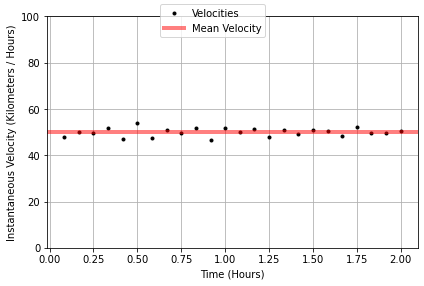

In [116]:
# Compute an array of velocities as the slope between each point
diff_distances = np.diff(distances)
diff_times = np.diff(times)
velocities = diff_distances / diff_times

# Chracterize the center and spread of the velocities
v_avg = np.mean(velocities)
v_max = np.max(velocities)
v_min = np.min(velocities)
v_range = v_max - v_min

# Plot the distribution of velocities
fig = plot_velocity_timeseries(times[1:], velocities)

## Intercept and Starting Points

In this exercise, you will see the intercept and slope parameters in the context of modeling measurements taken of the volume of a solution contained in a large glass jug. The solution is composed of water, grains, sugars, and yeast. The total mass of both the solution and the glass container was also recorded, but the empty container mass was not noted.

Your job is to use the preloaded pandas DataFrame df, with data columns volumes and masses, to build a linear model that relates the masses (y-data) to the volumes (x-data). The slope will be an estimate of the density (change in mass / change in volume) of the solution, and the intercept will be an estimate of the empty container weight (mass when volume=0).

In [120]:
import pandas as pd
df = pd.read_csv('Mass versus volume of solution.csv')

In [121]:
# Import ols from statsmodels, and fit a model to the data
from statsmodels.formula.api import ols
model_fit = ols(formula="masses ~ volumes", data=df)
model_fit = model_fit.fit()

# Extract the model parameter values, and assign them to a0, a1
a0 = model_fit.params['Intercept']
a1 = model_fit.params['volumes']

# Print model parameter values with meaningful names, and compare to summary()
print( "container_mass   = {:0.4f}".format(a0) )
print( "solution_density = {:0.4f}".format(a1) )
print( model_fit.summary() )

container_mass   = 5.4349
solution_density = 1.1029
                            OLS Regression Results                            
Dep. Variable:                 masses   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.328e+05
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          1.19e-156
Time:                        10:01:51   Log-Likelihood:                 102.39
No. Observations:                 101   AIC:                            -200.8
Df Residuals:                      99   BIC:                            -195.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


## C

## Residual Sum of the Squares

In a previous exercise, we saw that the altitude along a hiking trail was roughly fit by a linear model, and we introduced the concept of differences between the model and the data as a measure of model goodness.

In this exercise, you'll work with the same measured data, and quantifying how well a model fits it by computing the sum of the square of the "differences", also called "residuals".

In [122]:
load_data = (np.array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
          4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
          9. ,   9.5,  10. ]),
 np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
         181.98528167,  234.67907351,  246.48971034,  221.58691239,
         250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
         323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
         360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
         394.93384188]))

In [124]:
# Load the data
x_data, y_data = load_data

# Model the data with specified values for parameters a0, a1
y_model = model(x_data, a0=150, a1=25)

# Compute the RSS value for this parameterization of the model
rss = np.sum(np.square(y_data - y_model))
print("RSS = {}".format(rss))

RSS = 14444.484116328082


## Minimizing the Residuals

In this exercise, you will complete a function to visually compare model and data, and compute and print the RSS. You will call it more than once to see how RSS changes when you change values for a0 and a1. We'll see that the values for the parameters we found earlier are the ones needed to minimize the RSS.

In [127]:
def plot_data_with_model(xd, yd, ym, title):
    fig = plot_data(xd, yd)
    fig.axes[0].plot(xd, ym, color="red")
    fig.axes[0].set_title(title)
    plt.show()
    return fig

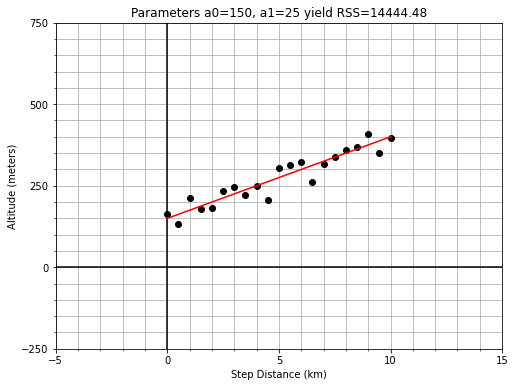

Parameters a0=150, a1=25 yield RSS=14444.48


In [128]:
# Complete function to load data, build model, compute RSS, and plot
def compute_rss_and_plot_fit(a0, a1):
    xd, yd = load_data
    ym = model(xd, a0, a1)
    residuals = ym - yd
    rss = np.sum(np.square(residuals))
    summary = "Parameters a0={}, a1={} yield RSS={:0.2f}".format(a0, a1, rss)
    fig = plot_data_with_model(xd, yd, ym, summary)
    return rss, summary

# Chose model parameter values and pass them into RSS function
rss, summary = compute_rss_and_plot_fit(a0=150, a1=25)
print(summary)

## Visualizing the RSS Minima

In this exercise you will compute and visualize how RSS varies for different values of model parameters. Start by holding the intercept constant, but vary the slope: and for each slope value, you'll compute the model values, and the resulting RSS. Once you have an array of RSS values, you will determine minimal RSS value, in code, and from that minimum, determine the slope that resulted in that minimal RSS.

Use pre-loaded data arrays x_data, y_data, and empty container rss_list to get started.

In [130]:
def compute_rss(yd, ym):
    rss = np.sum(np.square(yd-ym))
    return rss

In [135]:
def plot_rss_vs_a1(a1_array, rss_array):
    """
    Purpose:
        Plot RSS values (y-axis) versus a1 parameters values (x-axis)
        Also plot a point where the minimum RSS value occurs, and the 
        corresponding a1 value whose model resulted in that minimum RSS.
    Args:
        a1_array (np.array): an array of trial values for a1 (model slope)
        rss_array (np.array): an array of computed RSS values resulting from the a1_array
    Returns:
        fig (matplotlib.figure): figure object on which the data is plotted
    """
    fig, axis = plt.subplots(figsize=(12,4))
    min_rss = np.min(rss_array) 
    best_slope = a1_array[np.where(rss_array==min_rss)]
    axis.plot(a1_array, rss_array, marker="o", color='black')
    axis.plot(best_slope, min_rss, marker="o", markersize=12, linestyle=" ", color='red')
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.grid(True, which="major")
    axis.set_ylabel("RSS")
    axis.set_xlabel("Slope $a_1$")
    axis.set_ylim([0,100000])
    axis.set_title("Minimum RSS = {:.02f} \\n came from $a_1$={}".format(min_rss, best_slope[0]))
    plt.show()
    return fig

The minimum RSS = 14411.193018382088, came from a1 = [24.8]


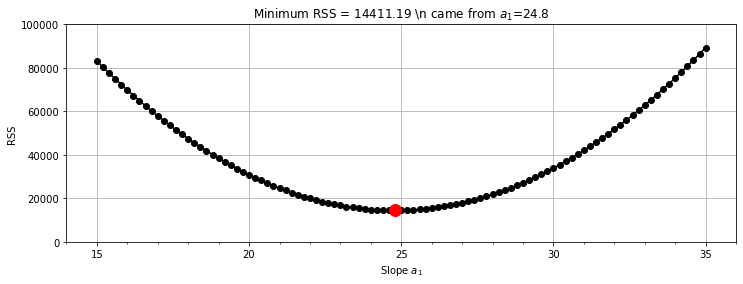

In [136]:
# Loop over all trial values in a1_array, computing rss for each
a1_array = np.linspace(15, 35, 101)
rss_list = []
for a1_trial in a1_array:
    y_model = model(x_data, a0=150, a1=a1_trial)
    rss_value = compute_rss(y_data, y_model)
    rss_list.append(rss_value)

# Find the minimum RSS and the a1 value from whence it came
rss_array = np.array(rss_list)
best_rss = np.min(rss_array) 
best_a1 = a1_array[np.where(rss_array==best_rss)]
print('The minimum RSS = {}, came from a1 = {}'.format(best_rss, best_a1))

# Plot your rss and a1 values to confirm answer
fig = plot_rss_vs_a1(a1_array, rss_array)

## D

## Least-Squares with `numpy`

The formulae below are the result of working through the calculus discussed in the introduction. In this exercise, we'll trust that the calculus correct, and implement these formulae in code using numpy.

<img src="https://latex.codecogs.com/svg.latex?a_{1}&space;=&space;\frac{covariance(x,&space;y)}{variance(x)}" title="a_{1} = \frac{covariance(x, y)}{variance(x)}" />
<img src="https://latex.codecogs.com/gif.latex?a_{0}&space;=&space;mean(y)&space;-&space;a_{1}mean(x)" title="a_{0} = mean(y) - a_{1}mean(x)" />

In [137]:
x = np.array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])
y = np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188])

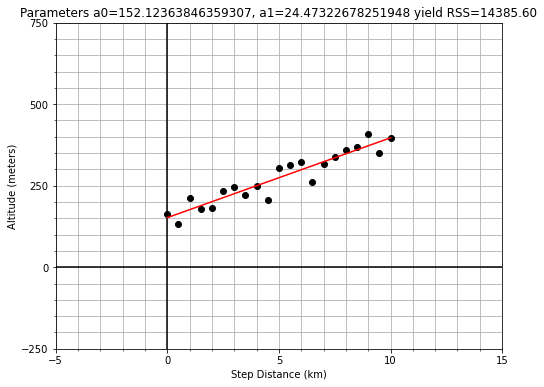

In [138]:
# prepare the means and deviations of the two variables
x_mean = np.mean(x)
y_mean = np.mean(y)
x_dev = x - x_mean
y_dev = y - y_mean

# Complete least-squares formulae to find the optimal a0, a1
a1 = np.sum(x_dev * y_dev) / np.sum( np.square(x_dev) )
a0 = y_mean - (a1 * x_mean)

# Use the those optimal model parameters a0, a1 to build a model
y_model = model(x, a0, a1)

# plot to verify that the resulting y_model best fits the data y
fig, rss = compute_rss_and_plot_fit(a0, a1)

## Optimization with Scipy

It is possible to write a numpy implementation of the analytic solution to find the minimal RSS value. But for more complex models, finding analytic formulae is not possible, and so we turn to other methods.

In this exercise you will use scipy.optimize to employ a more general approach to solve the same optimization problem.

In so doing, you will see additional return values from the method that tell answer us "how good is best". Here we will use the same measured data and parameters as seen in the last exercise for ease of comparison of the new scipy approach.

In [139]:
load_data = (np.array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
          4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
          9. ,   9.5,  10. ]),
 np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
         181.98528167,  234.67907351,  246.48971034,  221.58691239,
         250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
         323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
         360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
         394.93384188]))

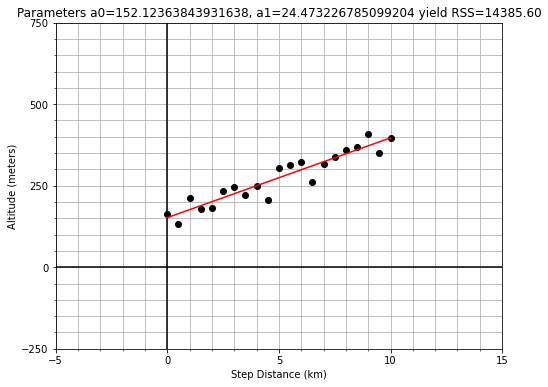

In [141]:
from scipy import optimize
# Define a model function needed as input to scipy
def model_func(x, a0, a1):
    return a0 + (a1*x)

# Load the measured data you want to model
x_data, y_data  = load_data

# call curve_fit, passing in the model function and data; then unpack the results
param_opt, param_cov = optimize.curve_fit(model_func, x_data, y_data)
a0 = param_opt[0]  # a0 is the intercept in y = a0 + a1*x
a1 = param_opt[1]  # a1 is the slope     in y = a0 + a1*x

# test that these parameters result in a model that fits the data
fig, rss = compute_rss_and_plot_fit(a0, a1)

## Least-Squares with `statsmodels`

Several python libraries provide convenient abstracted interfaces so that you need not always be so explicit in handling the machinery of optimization of the model.

As an example, in this exercise, you will use the statsmodels library in a more high-level, generalized work-flow for building a model using least-squares optimization (minimization of RSS).

To help get you started, we've pre-loaded the data from x_data, y_data = load_data() and stored it in a pandas DataFrame with column names x_column and y_column using df = pd.DataFrame(dict(x_column=x_data, y_column=y_data))

In [173]:
df = pd.read_csv('load_data.csv')

In [174]:
def plot_data_with_model(x, y, ym):
    fig = plot_data(x, y)
    fig.axes[0].plot(x, ym, color="red")
    return fig

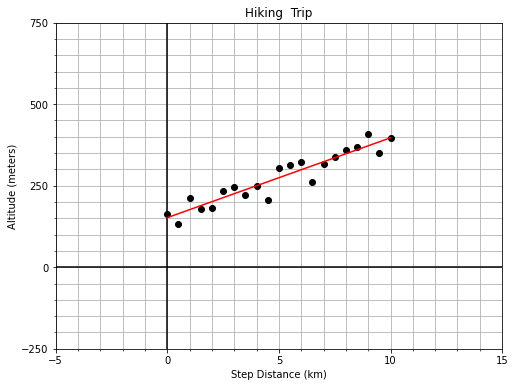

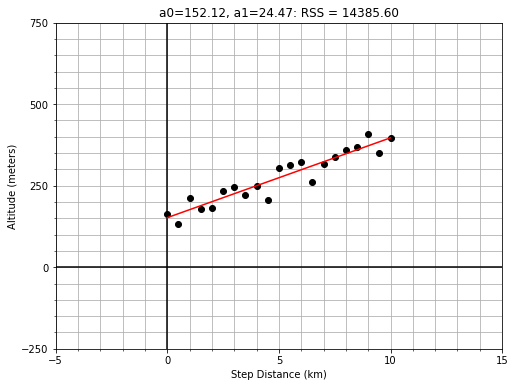

In [175]:
# Pass data and `formula` into ols(), use and `.fit()` the model to the data
model_fit = ols(formula="y_column ~ x_column", data=df).fit()

# Use .predict(df) to get y_model values, then over-plot y_data with y_model
y_model = model_fit.predict(df)
fig = plot_data_with_model(x_data, y_data, y_model)

# Extract the a0, a1 values from model_fit.params
a0 = model_fit.params['Intercept']
a1 = model_fit.params['x_column']

# Visually verify that these parameters a0, a1 give the minimum RSS
fig, rss = compute_rss_and_plot_fit(a0, a1)

# Part 3

## A

## Linear Model in Anthropology

If you found part of a skeleton, from an adult human that lived thousands of years ago, how could you estimate the height of the person that it came from? This exercise is in part inspired by the work of forensic anthropologist Mildred Trotter, who built a regression model for the calculation of stature estimates from human "long bones" or femurs that is commonly used today.

In this exercise, you'll use data from many living people, and the python library scikit-learn, to build a linear model relating the length of the femur (thigh bone) to the "stature" (overall height) of the person. Then, you'll apply your model to make a prediction about the height of your ancient ancestor.

In [182]:
legs = np.array([ 35. ,  36.5,  38. ,  39.5,  41. ,  42.5,  44. ,  45.5,  47. ,
        48.5,  50. ,  51.5,  53. ,  54.5,  56. ,  57.5,  59. ,  60.5,
        62. ,  63.5,  65. ])
heights = np.array([ 145.75166215,  154.81989548,  147.45149903,  154.53270424,
        166.17450311,  171.45325818,  149.44608871,  164.73275841,
        168.82025028,  171.32607675,  182.07638078,  188.37513159,
        188.08738789,  196.95181717,  192.85162151,  201.60765816,
        210.66135402,  202.06143758,  215.72224422,  207.04958807,
        215.8394592 ])

In [186]:
# import the sklearn class LinearRegression and initialize the model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)

# Prepare the measured data arrays and fit the model to them
legs = legs.reshape(len(legs),1)
heights = heights.reshape(len(heights),1)
model.fit(legs, heights)

# Use the fitted model to make a prediction for the found femur
fossil_leg = np.array([50.7])
fossil_height = model.predict(fossil_leg.reshape(-1,1))
print("Predicted fossil height = {:0.2f} cm".format(fossil_height[0,0]))

Predicted fossil height = 181.34 cm


## Linear Model in Oceanography

Time-series data provides a context in which the "slope" of the linear model represents a "rate-of-change".

In this exercise, you will use measurements of sea level change from 1970 to 2010, build a linear model of that changing sea level and use it to make a prediction about the future sea level rise.

In [187]:
def plot_data_and_forecast(years, levels, years_forecast, levels_forecast):
    """
    Purpose:
        Over-plot the forecast data with the measured data used to fit the model
    Args:
        years (np.array): independent ("x") variable of measured data set
        levels (np.array): dependent ("y") variable of measured data set
        years_forecast (np.array): independent ("x") variable of forecast/modeled data
        levels_forecast (np.array): dependent ("y") variable of forecast/modeled data
    Returns:
        fig (matplotlib.figure): matplotlib figure object containing the plot
    """
    fig, axis = plt.subplots(figsize=(8,4))
    axis.plot(years, levels, color="black", linestyle=" ", marker="o", label='Data')
    axis.plot(years_forecast, levels_forecast, marker=".", color="red", label='Forecast')
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.xaxis.set_major_locator(MultipleLocator(50.0))
    axis.xaxis.set_minor_locator(MultipleLocator(10.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_ylim([0, 20])
    axis.set_xlim([1965, 2105])
    axis.set_ylabel('Sea Level Change (inches)')
    axis.set_xlabel('Time (years)')
    axis.set_title("Global Average Sea Level Change")
    axis.legend()
    plt.show()
    return fig

In [188]:
years = np.array([[ 1970.],
       [ 1971.],
       [ 1972.],
       [ 1973.],
       [ 1974.],
       [ 1975.],
       [ 1976.],
       [ 1977.],
       [ 1978.],
       [ 1979.],
       [ 1980.],
       [ 1981.],
       [ 1982.],
       [ 1983.],
       [ 1984.],
       [ 1985.],
       [ 1986.],
       [ 1987.],
       [ 1988.],
       [ 1989.],
       [ 1990.],
       [ 1991.],
       [ 1992.],
       [ 1993.],
       [ 1994.],
       [ 1995.],
       [ 1996.],
       [ 1997.],
       [ 1998.],
       [ 1999.],
       [ 2000.],
       [ 2001.],
       [ 2002.],
       [ 2003.],
       [ 2004.],
       [ 2005.],
       [ 2006.],
       [ 2007.],
       [ 2008.],
       [ 2009.],
       [ 2010.],
       [ 2011.],
       [ 2012.],
       [ 2013.]])
levels = np.array([[ 4.67716535],
       [ 4.88188976],
       [ 5.24015748],
       [ 5.003937  ],
       [ 5.47244094],
       [ 5.40944881],
       [ 5.37007873],
       [ 5.3031496 ],
       [ 5.55511811],
       [ 5.36220472],
       [ 5.59842519],
       [ 6.08661417],
       [ 5.85826771],
       [ 6.18897637],
       [ 6.1535433 ],
       [ 5.74803149],
       [ 5.77165354],
       [ 5.79527558],
       [ 5.98031495],
       [ 6.15748031],
       [ 6.23228346],
       [ 6.33464566],
       [ 6.35826771],
       [ 6.29133858],
       [ 6.49999999],
       [ 6.61811023],
       [ 6.78740157],
       [ 7.06692913],
       [ 6.66535432],
       [ 7.01181102],
       [ 7.06299212],
       [ 7.28740157],
       [ 7.38188976],
       [ 7.75984251],
       [ 7.74015747],
       [ 7.74409448],
       [ 7.91732283],
       [ 7.99606298],
       [ 8.35039369],
       [ 8.58661416],
       [ 8.90157479],
       [ 8.96456692],
       [ 9.32677164],
       [ 8.98031495]])

Prediction: year = [[2100]], level = 16.66


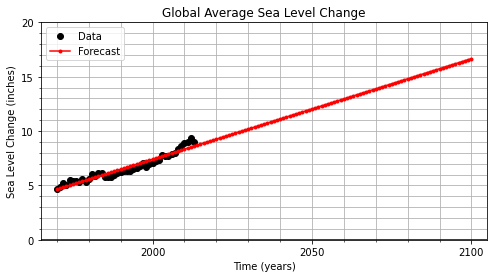

In [193]:
# Import LinearRegression class, build a model, fit to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(years, levels)

# Use model to make a prediction for one year, 2100
future_year = np.array([2100]).reshape(-1,1)
future_level = model.predict(future_year)
print("Prediction: year = {}, level = {:.02f}".format(future_year, future_level[0,0]))

# Use model to predict for many years, and over-plot with measured data
years_forecast = np.linspace(1970, 2100, 131).reshape(-1, 1)
levels_forecast = model.predict(years_forecast)
fig = plot_data_and_forecast(years, levels, years_forecast, levels_forecast)

## Linear Model in Cosmology

Less than 100 years ago, the universe appeared to be composed of a single static galaxy, containing perhaps a million stars. Today we have observations of hundreds of billions of galaxies, each with hundreds of billions of stars, all moving.

The beginnings of the modern physical science of cosmology came with the publication in 1929 by Edwin Hubble that included use of a linear model.

In this exercise, you will build a model whose slope will give Hubble's Constant, which describes the velocity of galaxies as a linear function of distance from Earth.

In [197]:
df = pd.read_csv('hubble_data.csv')

In [198]:
# Fit the model, based on the form of the formula
model_fit = ols(formula="velocities ~ distances", data=df).fit()

# Extract the model parameters and associated "errors" or uncertainties
a0 = model_fit.params['Intercept']
a1 = model_fit.params['distances']
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['distances']

# Print the results
print('For slope a1={:.02f}, the uncertainty in a1 is {:.02f}'.format(a1, e1))
print('For intercept a0={:.02f}, the uncertainty in a0 is {:.02f}'.format(a0, e0))

For slope a1=454.16, the uncertainty in a1 is 75.24
For intercept a0=-40.78, the uncertainty in a0 is 83.44


## B

## Interpolation: Inbetween Times

In this exercise, you will build a linear model by fitting monthly time-series data for the Dow Jones Industrial Average (DJIA) and then use that model to make predictions for daily data (in effect, an interpolation). Then you will compare that daily prediction to the real daily DJIA data.

A few notes on the data. "OHLC" stands for "Open-High-Low-Close", which is usually daily data, for example the opening and closing prices, and the highest and lowest prices, for a stock in a given day. "DayCount" is an integer number of days from start of the data collection.

In [199]:
df = pd.read_csv('hiking_data.csv')

       time   distance
0      0.00   0.132007
1      0.01   0.000000
2      0.02   0.000000
3      0.03   0.000000
4      0.04   0.468150
...     ...        ...
996    9.96  20.920429
997    9.97  19.951929
998    9.98  18.468326
999    9.99  20.168937
1000  10.00  21.002286

[1001 rows x 2 columns]


In [ ]:
# build and fit a model to the df_monthly data
model_fit = ols('Close ~ DayCount', data=df_monthly).fit()

# Use the model FIT to the MONTHLY data to make a predictions for both monthly and daily data
df_monthly['Model'] = model_fit.predict(df_monthly.DayCount)
df_daily['Model'] = model_fit.predict(df_daily.DayCount)

# Plot the monthly and daily data and model, compare the RSS values seen on the figures
fig_monthly = plot_model_with_data(df_monthly)
fig_daily = plot_model_with_data(df_daily)

## Extrapolation: Going Over the Edge

In this exercise, we consider the perils of extrapolation. Shown here is the profile of a hiking trail on a mountain. One portion of the trail, marked in black, looks linear, and was used to build a model. But we see that the best fit line, shown in red, does not fit outside the original "domain", as it extends into this new outside data, marked in blue.

If we want use the model to make predictions for the altitude, but still be accurate to within some tolerance, what are the smallest and largest values of independent variable x that we can allow ourselves to apply the model to?"

Here, use the preloaded x_data, y_data, y_model, and plot_data_model_tolerance() to complete your solution.

In [ ]:
# Compute the residuals, "data - model", and determine where [residuals < tolerance]
residuals = np.abs(y_data - y_model)
tolerance = 100
x_good = x_data[residuals < tolerance]

# Find the min and max of the "good" values, and plot y_data, y_model, and the tolerance range
print('Minimum good x value = {}'.format(np.min(x_good)))
print('Maximum good x value = {}'.format(np.max(x_good)))
fig = plot_data_model_tolerance(x_data, y_data, y_model, tolerance)

## C

## RMSE Step-by-step

In this exercise, you will quantify the over-all model "goodness-of-fit" of a pre-built model, by computing one of the most common quantitative measures of model quality, the RMSE, step-by-step.

Start with the pre-loaded data x_data and y_data, and use it with a predefined modeling function model_fit_and_predict()

In [200]:
x_data = np.array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])
y_data = np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188])

In [202]:
def model_fit_and_predict(x, y):
    a0=150
    a1=25
    ym = a0 + (a1*x)
    return ym

In [203]:
# Build the model and compute the residuals "model - data"
y_model = model_fit_and_predict(x_data, y_data)
residuals = y_model - y_data

# Compute the RSS, MSE, and RMSE and print the results
RSS = np.sum(np.square(residuals))
MSE = RSS/len(residuals)
RMSE = np.sqrt(MSE)
print('RMSE = {:0.2f}, MSE = {:0.2f}, RSS = {:0.2f}'.format(RMSE, MSE, RSS))

RMSE = 26.23, MSE = 687.83, RSS = 14444.48


## R-Squared

In this exercise you'll compute another measure of goodness, R-squared. R-squared is the ratio of the variance of the residuals divided by the variance of the data we are modeling, and in so doing, is a measure of how much of the variance in your data is "explained" by your model, as expressed in the spread of the residuals.

Here we have pre-loaded the data x_data,y_data and the model predictions y_model for the best fit model; you're goal is to compute the R-squared measure to quantify how much this linear model accounts for variation in the data.

In [204]:
# Compute the residuals and the deviations
residuals = y_model - y_data
deviations = np.mean(y_data) - y_data

# Compute the variance of the residuals and deviations
var_residuals = np.mean(np.square(residuals))
var_deviations = np.mean(np.square(deviations))

# Compute r_squared as 1 - the ratio of RSS/Variance
r_squared = 1 - (var_residuals / var_deviations)
print('R-squared is {:0.2f}'.format(r_squared))

R-squared is 0.89


## C

## Variation Around the Trend

The data need not be perfectly linear, and there may be some random variation or "spread" in the measurements, and that does translate into variation of the model parameters. This variation is in the parameter is quantified by "standard error", and interpreted as "uncertainty" in the estimate of the model parameter.

In this exercise, you will use ols from statsmodels to build a model and extract the standard error for each parameter of that model.

In [205]:
x_data = np.array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ])
y_data = np.array([   4.87303609,    2.33139743,    6.74881808,    9.28109413,
         19.26288955,   13.92871724,   30.23443529,   26.88304596,
         34.29045062,   36.75188887,   46.05299048,   39.6529112 ,
         49.03274839,   53.0145036 ,   61.73464166,   59.2003262 ,
         66.14938204,   68.19975808,   75.12664124,   80.91511231,
         80.0314758 ,   90.93417113,   94.37143883,   97.34081635,
        102.70256785])

In [206]:
# Store x_data and y_data, as times and distances, in df, and use ols() to fit a model to it.
df = pd.DataFrame(dict(times=x_data, distances=y_data))
model_fit = ols(formula="distances ~ times", data=df).fit()

# Extact the model parameters and their uncertainties
a0 = model_fit.params['Intercept']
e0 = model_fit.bse['Intercept']
a1 = model_fit.params['times']
e1 = model_fit.bse['times']

# Print the results with more meaningful names
print('Estimate    of the intercept = {:0.2f}'.format(a0))
print('Uncertainty of the intercept = {:0.2f}'.format(e0))
print('Estimate    of the slope = {:0.2f}'.format(a1))
print('Uncertainty of the slope = {:0.2f}'.format(e1))

Estimate    of the intercept = -0.81
Uncertainty of the intercept = 1.29
Estimate    of the slope = 50.78
Uncertainty of the slope = 1.11


## Variation in Two Parts

Given two data sets of distance-versus-time data, one with very small velocity and one with large velocity. Notice that both may have the same standard error of slope, but different R-squared for the model overall, depending on the size of the slope ("effect size") as compared to the standard error ("uncertainty").

If we plot both data sets as scatter plots on the same axes, the contrast is clear. Variation due to the slope is different than variation due to the random scatter about the trend line. In this exercise, your goal is to compute the standard error and R-squared for two data sets and compare.

In [212]:
distances1 = np.array([ 16.243454, -1.950897,  3.051616,  1.770314, 25.320743, -2.182054, 42.448118, 21.554598, 36.523724, 35.006296, 56.287746, 25.231926, 46.775828, 50.326123, 69.671028, 51.501087, 64.942385, 62.054749, 75.422137, 84.994819, 72.327142, 98.947237, 100.682574, 100.858277, 109.008559])
distances2 = np.array([16.243454,-5.284231,-3.615051,-8.229686,11.987410,-18.848720,22.448118,-1.778736,9.857058,5.006296,22.954413,-11.434740,6.775828,6.992790,23.004361,1.501087,11.609051,5.388082,15.422137,21.661485,5.660475,28.947237,27.349241,24.191610,29.008559,])
times = np.array([0.000000,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,0.833333,0.916667,1.000000,1.083333,1.166667,1.250000,1.333333,1.416667,1.500000,1.583333,1.666667,1.750000,1.833333,1.916667,2.000000])
df = pd.DataFrame(dict(distances1=distances1, distances2=distances2))

In [213]:
# Build and fit two models, for columns distances1 and distances2 in df
model_1 = ols(formula="distances1 ~ times", data=df).fit()
model_2 = ols(formula="distances2 ~ times", data=df).fit()

# Extract R-squared for each model, and the standard error for each slope
se_1 = model_1.bse['times']
se_2 = model_2.bse['times']
rsquared_1 = model_1.rsquared
rsquared_2 = model_2.rsquared

# Print the results
print('Model 1: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_1, rsquared_1))
print('Model 2: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_2, rsquared_2))

Model 1: SE = 3.694, R-squared = 0.898
Model 2: SE = 3.694, R-squared = 0.335


# Part 4

## A

## Sample Statistics versus Population

In this exercise you will work with a preloaded population. You will construct a sample by drawing points at random from the population. You will compute the mean standard deviation of the sample taken from that population to test whether the sample is representative of the population. Your goal is to see where the sample statistics are the same or very close to the population statistics.

In [214]:
population = np.array([ 104.96714153,   98.61735699,  106.47688538,  115.23029856,
         97.65846625,   97.65863043,  115.79212816,  107.67434729,
         95.30525614,  105.42560044,   95.36582307,   95.34270246,
        102.41962272,   80.86719755,   82.75082167,   94.37712471,
         89.8716888 ,  103.14247333,   90.91975924,   85.87696299,
        114.65648769,   97.742237  ,  100.67528205,   85.75251814,
         94.55617275,  101.1092259 ,   88.49006423,  103.75698018,
         93.9936131 ,   97.0830625 ,   93.98293388,  118.52278185,
         99.86502775,   89.42289071,  108.22544912,   87.7915635 ,
        102.08863595,   80.40329876,   86.71813951,  101.96861236,
        107.3846658 ,  101.71368281,   98.84351718,   96.98896304,
         85.2147801 ,   92.80155792,   95.39361229,  110.57122226,
        103.4361829 ,   82.36959845,  103.24083969,   96.1491772 ,
         93.23078   ,  106.11676289,  110.30999522,  109.31280119,
         91.60782477,   96.90787624,  103.31263431,  109.75545127,
         95.20825762,   98.14341023,   88.93665026,   88.03793376,
        108.12525822,  113.56240029,   99.27989878,  110.03532898,
        103.61636025,   93.54880245,  103.61395606,  115.38036566,
         99.64173961,  115.64643656,   73.80254896,  108.21902504,
        100.87047068,   97.0099265 ,  100.91760777,   80.12431085,
         97.80328112,  103.57112572,  114.77894045,   94.81729782,
         91.91506397,   94.98242956,  109.15402118,  103.2875111 ,
         94.70239796,  105.13267433,  100.97077549,  109.68644991,
         92.97946906,   96.72337853,   96.07891847,   85.36485052,
        102.96120277,  102.61055272,  100.05113457,   97.65412867,
         85.84629258,   95.79354677,   96.57285483,   91.97722731,
         98.38714288,  104.04050857,  118.86185901,  101.74577813,
        102.57550391,   99.25554084,   80.81228785,   99.73486125,
        100.6023021 ,  124.63242112,   98.07639035,  103.01547342,
         99.6528823 ,   88.31321962,  111.42822815,  107.51933033,
        107.91031947,   90.90612545,  114.02794311,   85.98148937,
        105.86857094,  121.90455626,   90.09463675,   94.3370227 ,
        100.99651365,   94.96524346,   84.49336569,  100.68562975,
         89.37696286,  104.73592431,   90.80575766,  115.49934405,
         92.16746708,   96.77938484,  108.13517217,   87.69135684,
        102.27459935,  113.07142754,   83.92516765,  101.84633859,
        102.59882794,  107.81822872,   87.63049289,   86.79543387,
        105.21941566,  102.96984673,  102.5049285 ,  103.46448209,
         93.19975278,  102.32253697,  102.93072473,   92.85648582,
        118.65774511,  104.73832921,   88.08696503,  106.56553609,
         90.2531833 ,  107.87084604,  111.58595579,   91.79317682,
        109.63376129,  104.12780927,  108.2206016 ,  118.96792983,
         97.54611884,   92.46263836,   91.1048557 ,   91.84189715,
         99.22898291,  103.41151975,  102.76690799,  108.27183249,
        100.13001892,  114.53534077,   97.35343167,  127.20169167,
        106.25667348,   91.42842444,   89.29107502,  104.82472415,
         97.76537215,  107.14000494,  104.73237625,   99.27171087,
         91.53206282,   84.85152775,   95.53485048,  108.56398794,
        102.14093744,   87.54261221,  101.73180926,  103.8531738 ,
         91.16142564,  101.53725106,  100.58208718,   88.57029702,
        103.5778736 ,  105.60784526,  110.83051243,  110.53802052,
         86.22330632,   90.6217496 ,  105.15035267,  105.13785951,
        105.15047686,  138.52731491,  105.70890511,  111.3556564 ,
        109.54001763,  106.51391251,   96.84730755,  107.5896922 ,
         92.27174785,   97.63181393,   95.14636452,  100.81874139,
        123.14658567,   81.32734807,  106.8626019 ,   83.87284129,
         95.28068134,  110.88950597,  100.64280019,   89.22255222,
         92.84696291,  106.79597749,   92.69633368,  102.1645859 ,
        100.4557184 ,   93.48399652,  121.43944089,  106.33919022,
         79.74857413,  101.86454315,   93.38213535,  108.52433335,
         92.07479262,   98.85263559,  105.04987279,  108.65755194,
         87.99703593,   96.65498764,   95.25054689,   93.46670767,
        117.6545424 ,  104.04981711,   87.39116046,  109.17861947,
        121.22156197,  110.32465261,   84.80630034,   95.15765927,
        112.66911149,   92.92330534,  104.43819428,  107.74634053,
         90.73069528,   99.40474644,   67.5873266 ,   89.75612359,
         97.47431849,   87.52216818,  116.32411304,   85.69858622,
         95.59955513,  101.30740577,  114.41273289,   85.64137849,
        111.63163752,  100.10233061,   90.18491349,  104.62103474,
        101.99059696,   93.99783123,  100.69802085,   96.14686403,
        101.13517345,  106.62130675,  115.86016816,   87.62184501,
        121.33033375,   80.479122  ,   98.48214905,  105.88317206,
        102.80991868,   93.7730048 ,   97.9187775 ,   95.06999065,
         94.10635243,  108.49602097,  103.57015486,   93.07090405,
        108.99599875,  103.07299521,  108.12862119,  106.29628842,
         91.71004989,   94.3981896 ,  107.47293605,  106.10370265,
         99.79098406,  101.17327383,  112.77664896,   94.08428611,
        105.47097381,   97.97807348])

In [215]:
# Compute the population statistics
print("Population mean {:.1f}, stdev {:.2f}".format( population.mean(), population.std() ))

# Set random seed for reproducibility
np.random.seed(42)

# Construct a sample by randomly sampling 31 points from the population
sample = np.random.choice(population, size=31)

# Compare sample statistics to the population statistics
print("    Sample mean {:.1f}, stdev {:.2f}".format( sample.mean(), sample.std() ))

Population mean 100.0, stdev 9.74
    Sample mean 102.1, stdev 9.34


## Variation in Sample Statistics

If we create one sample of size=1000 by drawing that many points from a population. Then compute a sample statistic, such as the mean, a single value that summarizes the sample itself.

If you repeat that sampling process num_samples=100 times, you get 100 samples. Computing the sample statistic, like the mean, for each of the different samples, will result in a distribution of values of the mean. The goal then is to compute the mean of the means and standard deviation of the means.

Here you will use the preloaded population, num_samples, and num_pts, and note that the means and deviations arrays have been initialized to zero to give you containers to use for the for loop.

In [219]:
num_samples = 100
num_pts = 1000

In [220]:
# Initialize two arrays of zeros to be used as containers
means = np.zeros(num_samples)
stdevs = np.zeros(num_samples)

# For each iteration, compute and store the sample mean and sample stdev
for ns in range(num_samples):
    sample = np.random.choice(population, num_pts)
    means[ns] = sample.mean()
    stdevs[ns] = sample.std()

# Compute and print the mean() and std() for the sample statistic distributions
print("Means:  center={:>6.2f}, spread={:>6.2f}".format(means.mean(), means.std()))
print("Stdevs: center={:>6.2f}, spread={:>6.2f}".format(stdevs.mean(), stdevs.std()))

Means:  center=100.01, spread=  0.32
Stdevs: center=  9.67, spread=  0.24


## Visualizing Variation of a Statistic

Previously, you have computed the variation of sample statistics. Now you'll visualize that variation.

We'll start with a preloaded population and a predefined function get_sample_statistics() to draw the samples, and return the sample statistics arrays.

Here we will use a predefined plot_hist() function that wraps the matplotlib method axis.hist(), which both bins and plots the array passed in. In this way you can see how the sample statistics have a distribution of values, not just a single value.

In [221]:
def get_sample_statistics(population, num_samples=100, num_pts=1000):
    means = np.zeros(num_samples)
    deviations = np.zeros(num_samples)
    for ns in range(num_samples):
        sample = np.random.choice(population, num_pts)
        means[ns] = sample.mean()
        deviations[ns] = sample.std()
        return means, deviations

In [233]:
def plot_hist(data, bins, data_name, color='blue'):
    fig, axis = plt.subplots(figsize=(8,4))
    axis.hist(data, bins=bins, rwidth=0.9, color=color)
    title = 'Distribution of the {}: \\ncenter={:0.2f}, spead={:0.2f}'.format(data_name, data.mean(), data.std())
    x_label = 'Values of {}'.format(data_name)
    y_label = 'Bin counts of {}'.format(data_name)
    axis.set_ylabel(y_label)
    axis.set_xlabel(x_label)
    axis.set_title(title)
    plt.show()
    return fig

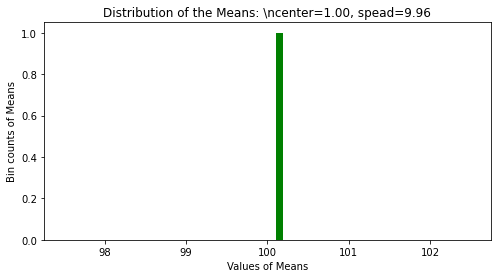

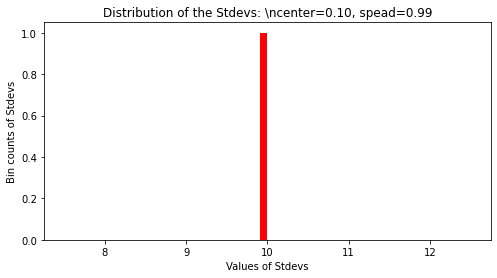

In [234]:
# Generate sample distribution and associated statistics
means, stdevs = get_sample_statistics(population, num_samples=100, num_pts=1000)

# Define the binning for the histograms
mean_bins = np.linspace(97.5, 102.5, 51)
std_bins = np.linspace(7.5, 12.5, 51)

# Plot the distribution of means, and the distribution of stdevs
fig = plot_hist(data=means, bins=mean_bins, data_name="Means", color='green')
fig = plot_hist(data=stdevs, bins=std_bins, data_name="Stdevs", color='red')

## B

## Estimation of Population Parameters

Imagine a constellation ("population") of satellites orbiting for a full year, and the distance traveled in each hour is measured in kilometers. There is variation in the distances measured from hour-to-hour, due to unknown complications of orbital dynamics. Assume we cannot measure all the data for the year, but we wish to build a population model for the variations in orbital distance per hour (speed) based on a sample of measurements.

In this exercise, you will assume that the population of hourly distances are best modeled by a gaussian, and further assume that the parameters of that population model can be estimated from the sample statistics. Start with the preloaded sample_distances that was taken from a population of cars.

In [235]:
sample_distances = np.array([ 27143.88628178,  27087.98325817,  27580.04229165,  27113.1083337 ,
        27057.40721048,  26693.19226411,  26916.87962035,  27229.72020211,
        26755.77703262,  26994.32512326,  26863.90989702,  26885.76359407,
        27055.16802439,  26846.50278894,  26761.62724163,  27011.92714   ,
        27006.0414866 ,  27112.55543553,  27075.29318558,  27241.03510749,
        26886.05773059,  26853.25717425,  27356.50242839,  27083.71944651,
        27048.1317373 ,  26833.17214224,  27187.1114273 ,  26792.09492182,
        27327.65334315,  26905.32791217,  26965.08045969,  26781.97735558,
        27001.76307178,  26457.73102378,  27104.47241451,  27039.42276518,
        26984.93044729,  27015.64782321,  26734.91971513,  26917.33608426,
        27018.00056773,  26687.14839143,  27339.65512105,  26999.48176249,
        27232.23332988,  27055.67780598,  26558.44932455,  26853.1677454 ,
        26801.88222348,  26861.18523779,  26801.07982206,  27313.85177827,
        27028.90702211,  27134.47888438,  27184.32863559,  26655.06969382,
        26766.95785922,  27246.58734932,  26859.90997974,  26843.13093501,
        27453.13275985,  26873.41574937,  26878.4825768 ,  26822.42307365,
        26994.9099121 ,  26946.60404244,  26877.97718899,  26823.59522223,
        26901.05746475,  27042.79485155,  26678.05762212,  26815.86185253,
        26705.87521488,  27025.03575828,  26601.45264973,  27063.85095746,
        26873.54531063,  26962.82916206,  27075.37369548,  27084.79512368,
        26864.61856166,  27223.18632238,  26557.40113102,  26995.79204744,
        26917.01806731,  26749.54338877,  26600.2621505 ,  26919.74101142,
        27092.700555  ,  26977.8727147 ,  26849.13471473,  26524.28234783,
        26903.92055912,  26957.90186854,  27053.1976854 ,  27113.30038626,
        26833.69061488,  26980.32286769,  27457.87472776,  26607.4298234 ,
        27120.50297762,  26813.97549293,  27119.1785466 ,  26990.11041907,
        26753.55181914,  26525.20469951,  26842.72974227,  26973.67981323,
        26644.18669416,  27335.23537165,  26974.77143351,  27114.95839037,
        26858.96264682,  26835.49786595,  26531.37432824,  27126.72630558,
        26913.79981063,  26860.88065597,  27238.26729004,  26903.87271231,
        27513.09247822,  26548.8345489 ,  26999.26166747,  27057.7189009 ,
        26855.09506965,  26846.60168945,  26998.49380647,  26681.04629384,
        27053.79099607,  26496.07750486,  27036.1456002 ,  27016.92252596,
        26481.37833241,  27463.50952723,  26941.62131814,  26709.51469047,
        26566.83038974,  27183.90514637,  26857.18592379,  26890.57821981,
        27297.38075903,  27182.21187189,  27007.75242303,  26745.98219617,
        26604.88487869,  27265.42925406,  26966.86884722,  26737.8827    ,
        26861.68486165,  27100.295441  ,  27187.91639576,  27244.33375738,
        26785.46575254,  26596.83571684,  26634.24093179,  26977.26170876,
        26837.52656605,  27161.00628236,  26824.60504805,  26818.95578474,
        26933.79406034,  26746.69702688,  26992.12439671,  26594.40884625,
        27136.65457708,  27006.47774178,  27348.6312121 ,  26640.05169387,
        26714.48926311,  26976.750765  ,  26891.78137871,  27415.10567461,
        26863.34205649,  26864.13041363,  26933.87284308,  27240.9018238 ,
        26780.34584953,  27101.21398455,  26536.27695868,  27205.70198053,
        26766.53883905,  26828.57836298,  26995.50842643,  26714.33520856,
        26850.33271654,  27351.41721953,  26804.22626971,  26654.90293713,
        27304.44206032,  26847.36626491,  26804.55720083,  26829.07844477,
        26764.00163473,  27052.12291217,  26567.20279511,  26960.61254516,
        27065.57672416,  26744.10077992,  27314.71742361,  26663.42154431,
        26970.9819719 ,  26694.67840398,  26996.04004449,  26801.79974578,
        27061.01623074,  26937.19018333,  26857.45686715,  26593.49519935,
        26716.65215727,  27010.58406499,  27054.09857263,  26944.52372485,
        26878.21290192,  26989.57495373,  27096.37064746,  26716.88817842,
        26836.57256623,  27033.67598741,  26863.87803964,  27047.20798789,
        27034.91369359,  26685.87451072,  27039.83885243,  26791.89970318,
        26849.33668429,  27026.34834406,  26695.23683922,  26904.80471305,
        26436.85015118,  26830.81472121,  26911.67043354,  27404.79981318,
        26957.87969301,  27033.96423562,  26957.63539671,  26771.38920367,
        27258.24706918,  26968.81217189,  27199.03755538,  26961.52942659,
        26739.94237613,  27134.65276966,  26630.07179143,  26754.10986303,
        26734.2688266 ,  26955.89986361,  26980.93876681,  26780.9502099 ,
        26881.43697313,  26861.55370871,  26938.04451192,  27424.71030759,
        27224.90782133,  27567.66884372,  26942.45666815,  26666.49862448,
        26811.51215308,  26862.3358439 ,  26990.77460817,  26724.01040161,
        26716.03660602,  27089.57059653,  27089.43869505,  26738.7977659 ,
        26639.01975494,  26732.8054403 ,  27148.6025703 ,  26772.1406178 ,
        26823.98368548,  26944.55993598,  26899.06286655,  27274.75301706,
        26732.66097594,  27078.97928512,  27156.28365114,  26674.92376282,
        26591.16650517,  26901.28578514,  26854.2124564 ,  26637.76152564,
        27067.74816302,  26977.5439568 ,  26938.91884692,  27056.15166122,
        26905.21037053,  26887.87603461,  26618.12393823,  26842.1454847 ,
        27243.69949251,  27019.77978195,  27024.08660277,  26942.38510255,
        26855.35443262,  26486.76635941,  26514.29446274,  26886.15161863,
        26585.50047227,  26654.4768983 ,  26991.29015812,  27157.85397661,
        26933.96043703,  26890.65691518,  27238.72323288,  26805.130186  ,
        27125.58144028,  27327.70213603,  27171.75239724,  27093.72863873,
        26587.66972079,  26617.52797802,  26821.20198502,  26857.73533964,
        26635.38737764,  26661.90040372,  26829.5779198 ,  26741.62947342,
        27190.30556829,  26579.22864091,  27497.96834736,  27081.02355063,
        26769.52914657,  26985.74574184,  27595.80878556,  26487.11507164,
        27292.42142024,  26733.38001826,  26648.9204039 ,  27429.34320411,
        26843.95841763,  26892.15101573,  26822.53694383,  26475.39327269,
        26981.99259762,  26764.28248029,  27077.40025535,  26873.83834394,
        27194.15938715,  26953.27264372,  26964.84608336,  27080.18180957,
        26683.31744167,  26502.83895785,  26844.16395718,  27134.59783351,
        26990.62775284,  26922.07725332,  27190.05269203,  27065.33499104,
        27268.61508165,  26512.11430426,  26612.70415815,  26942.6117626 ,
        26785.98958143,  26879.59951891,  27074.25111081,  26638.0334235 ,
        26858.27340454,  27265.22585654,  26731.03040891,  26706.0906174 ,
        26881.98394737,  27076.9711286 ,  27072.06023771,  27172.94087273,
        26860.60951111,  26637.69630775,  26921.5832547 ,  26868.06131472,
        26600.09476209,  26660.55416077,  26615.43446626,  26834.83778753,
        27068.60120026,  26916.29208527,  26988.51212715,  26825.589366  ,
        27010.21997456,  26767.49717399,  26582.69461741,  26654.01298353,
        26878.09411344,  26842.16941808,  26769.71400851,  26793.55753181,
        26780.7725181 ,  26832.16520869,  26520.33080082,  26878.99396777,
        26626.28412691,  26836.54178272,  26747.54469582,  27325.33127661,
        27000.43140943,  26591.54085344,  27050.44515082,  26819.78852642,
        26768.79271964,  26623.20005054,  26499.24012889,  27034.55732796,
        26972.30548523,  27076.97833476,  27145.97653883,  27370.45045816,
        26788.54262976,  27185.12908371,  27105.10953604,  26633.87050673,
        26497.62446903,  26629.59429991,  27303.09765554,  27512.90634296,
        26979.4130203 ,  27288.31979692,  26775.90921763,  27246.3093449 ,
        26702.97967346,  27127.80327595,  26887.79015222,  26845.61680541,
        27325.07216057,  26912.04092278,  26698.64746013,  27069.89578735,
        26896.89216195,  26825.16825668,  26719.23253875,  27089.1351968 ,
        26907.17017392,  26615.46233873,  26647.44351774,  26882.2284668 ,
        26873.25430701,  27131.32632721,  26561.99089323,  26896.45048256,
        26779.47437051,  26866.97946212,  26580.68558289,  26866.31573419,
        26942.87693368,  26575.09935991,  26895.31801405,  26927.33675451,
        27097.5658296 ,  27128.16478439,  26405.45893621,  26994.71552069,
        27063.31273634,  26748.21332282,  26808.8932871 ,  26724.7750947 ,
        26886.51488927,  26505.51673261,  26998.04607751,  26816.22792519,
        26849.55072425,  26826.30312419,  27380.98648648,  27001.70154691,
        26945.59491929,  26892.01594966,  27008.94931909,  27216.56367404,
        26780.61753675,  27085.16847858,  27309.98648719,  27024.33210759,
        26696.51722235,  26885.77145915,  27091.30918844,  27288.44923661,
        26843.78490903,  26995.37811275,  27138.50850968,  27075.52853479,
        26788.01558595,  26686.5137108 ,  26907.76987956,  27043.41094828,
        27002.33688256,  27000.58628711,  26923.24546555,  26992.01623444,
        26839.18921918,  26876.01983098,  26824.33127226,  26670.56916053,
        27171.51413067,  26223.68323013,  27181.98404   ,  26803.87711263,
        27103.321864  ,  27095.93537004,  26770.49982931,  27057.20228503,
        27221.60761577,  27094.98258615,  27115.18560631,  26842.77894778,
        27323.4894849 ,  26881.86334618,  26837.51410218,  27130.37924233,
        26660.94358069,  26731.11198984,  26905.96625456,  26789.17451613,
        26934.47552903,  26695.9977087 ,  26951.91390559,  26930.80109208,
        26650.40867341,  27314.64800395,  26801.46760827,  27087.49867632,
        26630.66491592,  26918.4092305 ,  26953.25107897,  26717.30404149,
        26949.66946678,  26754.97063429,  26870.10207066,  26807.38876625,
        27107.55234701,  26601.59319672,  26821.24022814,  26685.63552257,
        27044.86820473,  27416.09728796,  26677.99084544,  26854.67530358,
        26786.93680732,  27010.23095439,  27232.56444479,  26887.24710797,
        26680.41523995,  26834.47744991,  27062.41793769,  26763.82670317,
        26935.17919968,  27100.28799049,  26698.32757744,  27198.96478924,
        26650.21345545,  26887.53157538,  26814.57686748,  26605.44529358,
        27215.91089759,  26685.02505006,  26807.00356023,  27183.35159978,
        27299.01025863,  26540.3273963 ,  27014.04664468,  27182.21812316,
        26767.58852115,  27009.07760766,  26723.04531565,  27017.79895826,
        26768.65088691,  26777.76464446,  26315.61040777,  27133.86367531,
        26918.66726152,  26853.81704745,  27347.05391   ,  26766.18432387,
        26960.80182685,  26988.449127  ,  26876.66140718,  26939.05893723,
        26982.01789116,  26919.20819375,  26747.81346849,  26717.85402756,
        26739.96859867,  27046.28760018,  26679.84821861,  26675.41876112,
        26896.86351377,  26834.36394749,  27025.01206036,  26832.62404834,
        26796.37376438,  26722.27745533,  26604.57505423,  26874.84134077,
        26709.89006538,  26647.86223725,  27365.60478048,  27250.48206328,
        26943.0014568 ,  26681.2406666 ,  26908.14576762,  26768.46801898,
        26704.72233385,  27395.07225842,  26555.49997708,  26920.70572279,
        26787.9513203 ,  26621.50935879,  27023.69869608,  26983.26169904,
        27051.78206884,  26924.32570734,  27221.81159283,  27041.46242069,
        26893.2471373 ,  26620.10418654,  26803.4755538 ,  27110.75619235,
        26971.28591253,  27004.02059281,  26482.00284554,  26667.06080455,
        26796.77272328,  27053.93552085,  26917.11701927,  26742.88375437,
        26597.94705253,  26947.42274881,  26702.75921747,  26960.44887525,
        27066.83062975,  26638.57233818,  26636.88207672,  27326.19853941,
        26900.83561322,  26931.97729053,  26599.46245532,  27348.70514627,
        26950.12066067,  26695.35062517,  26729.06808538,  26998.34292279,
        27019.78429031,  26763.23333842,  27147.21522235,  26754.26076967,
        26655.98520353,  27086.3651111 ,  26652.40607143,  27091.7757577 ,
        27062.96184973,  27105.95015082,  26792.60176359,  27127.00319873,
        27050.079599  ,  26845.32238507,  27226.1787699 ,  26931.21354275,
        26680.03663918,  26945.87861519,  27201.82207787,  26941.14577377,
        26893.08110167,  26805.7467604 ,  27194.65948651,  26793.96677552,
        27206.19599613,  27224.62796493,  26875.27332831,  27283.97611498,
        26983.48649331,  27219.68903172,  27052.57102147,  26933.15409584,
        27139.31217806,  26976.22048026,  26774.99891765,  26942.74073873,
        27038.3178845 ,  27087.09341814,  26995.69255902,  26946.14042527,
        26903.47898471,  26733.12804219,  27300.39468856,  27033.12914345,
        27234.96606573,  27323.80585794,  27321.96344636,  26843.46999031,
        26674.17193316,  26972.83513715,  27146.64170615,  26489.85474017,
        27210.57478495,  27165.28016939,  27195.45813929,  26727.86490468,
        27104.78719821,  27051.34953546,  26836.93814066,  26592.54776213,
        26703.80227206,  26855.44832291,  26593.15487319,  26671.55142006,
        27236.79514512,  27169.13090286,  27250.99331408,  26833.65624651,
        26943.85545535,  26832.80716137,  26777.88560215,  26914.76627881,
        27097.62559952,  26963.72096872,  26797.53748958,  26941.24868294,
        26658.10570875,  26719.42705881,  27128.30406468,  27038.41144606,
        26989.98023337,  26780.44553277,  26643.26778624,  27122.50113836,
        26820.2468365 ,  26743.371561  ,  26625.22120759,  26910.22885212,
        26676.67434759,  26931.08841229,  27028.30751521,  26715.73606702,
        27097.83048853,  26752.17630407,  26671.09756155,  26755.26600278,
        26370.7931108 ,  26928.53647969,  27075.80042784,  26578.35985294,
        27002.0644265 ,  27019.44718263,  26924.43204291,  27396.64607862,
        27166.88130204,  26738.05290813,  26911.29195765,  26870.85296559,
        26996.29539281,  27051.67225526,  26675.14343869,  26936.77477091,
        26994.14449431,  26636.99318269,  26754.42383871,  26852.07254784,
        27023.25751189,  27078.57722094,  26665.21185785,  27378.73907689,
        26990.43019433,  27042.00311502,  26535.25252992,  27217.66345914,
        26864.36032814,  26728.99675236,  26810.25495155,  27081.33425362,
        26610.70127851,  26750.27968439,  26660.33556415,  26502.09070115,
        26759.74644598,  26331.88707073,  26953.62290489,  27225.54555162,
        26803.85604939,  27015.80260236,  27063.97236074,  27385.62714809,
        27314.66456811,  26605.24572727,  27196.06336614,  26540.36402604,
        26714.60999015,  27070.9127378 ,  26624.93717501,  26768.40846424,
        26654.76203627,  26499.09780301,  26631.22707081,  26920.58225453,
        26877.40880054,  27082.2237341 ,  26827.86981599,  27183.80817945,
        27254.65759647,  26986.3498665 ,  26891.20102975,  26772.17730581,
        27022.56291652,  27222.27181425,  27032.95585834,  26425.61520155,
        26990.75731642,  27025.2380441 ,  27350.73641571,  26586.64903611,
        26649.97317418,  27111.79872903,  26925.84914513,  26846.22885122,
        27101.85249399,  26902.73954691,  26984.05823343,  27023.62942578,
        27034.21271529,  27017.04554648,  26768.6557724 ,  26518.5160293 ,
        26836.093973  ,  27304.38452298,  27475.42373782,  26828.68336861,
        26861.25909624,  26845.25731839,  26656.6082006 ,  27407.50248621,
        27059.52042785,  26616.03753249,  26557.44125806,  26943.8869675 ,
        26898.74692024,  26994.91799687,  27083.65141568,  27085.82309686,
        26841.77912625,  27103.62403982,  27343.12373789,  26845.49505206,
        26532.02269793,  27032.98876105,  27053.56903534,  27411.25022777,
        27029.58842804,  26929.58851687,  26818.69960195,  27306.97990886,
        26495.64048647,  26792.38926062,  26833.75249299,  26909.81195161,
        27208.8970663 ,  26952.93021651,  27031.57025867,  26887.10128666,
        26771.66893823,  26523.07005484,  27362.29681554,  26927.53837938,
        26917.88028539,  26900.10269084,  27240.5227911 ,  27081.44638233,
        26677.93446405,  26917.97260646,  26836.60271979,  26461.22083287,
        27281.22945966,  27273.74150261,  26976.44476805,  26875.84043766,
        27106.3293943 ,  26799.52335095,  27007.24644262,  26665.16966301,
        27304.18394391,  27274.59688309,  26698.09233131,  26791.34443134,
        26933.52542265,  27092.15719432,  27459.08034851,  26978.15558848,
        26720.64676711,  27305.78954085,  26858.61814665,  26297.59172422,
        26943.93494132,  26793.18115764,  26675.93582648,  27329.56087595,
        26623.85064432,  26954.93895181,  27006.99634429,  26972.19643487,
        26548.91205334,  26700.5882683 ,  27218.44546661,  26653.55229226,
        26677.28514474,  26748.3959728 ,  26915.79737455,  27158.97192811,
        27290.58173574,  27086.98581331,  27006.43260782,  27106.01510998,
        26701.22838215,  26578.52101416,  26722.69176413,  27027.26101764,
        26762.08980586,  27096.09446463,  26943.22569795,  26505.59147123,
        26863.34213189,  26494.20132514,  26753.72611516,  26778.60980042,
        27008.33743502,  26985.91717751,  26615.82439677,  26866.19639427,
        27206.61338108,  26607.41840873,  26832.85939927,  26838.13637565,
        26850.27608958,  26713.03256229,  27093.70907553,  26728.60490451,
        26721.61336247,  26856.95405826,  26780.65391093,  27152.90060359,
        27065.71310498,  26868.56348521,  26870.46747994,  27160.40631194,
        26603.45129763,  27164.29835919,  27050.25504941,  27038.57219125,
        27114.21399491,  27015.82602835,  26782.83405673,  27119.42172252,
        27207.79904991,  27087.54947541,  26697.06522995,  27025.00358675,
        27463.94277955,  27439.92924195,  26758.2418425 ,  27170.83196079,
        27004.1265311 ,  26973.39457052,  26824.44913799,  26887.24803323,
        26540.11143709,  26977.01335687,  27026.48820243,  26876.57197134,
        26961.04725683,  26774.41004752,  27028.82952681,  26884.38731073,
        26917.86490144,  27221.46739035,  26567.3547064 ,  27437.83066131,
        27007.37053409,  26934.79679098,  26828.67647402,  26918.02157083,
        27102.91594912,  26926.21346822,  26703.24071232,  26752.40561732,
        26910.72499058,  27073.01916917,  26714.79735407,  27113.196917  ,
        26925.71162521,  27427.67784218,  27051.8207997 ,  26884.4680432 ,
        26856.70934044,  27114.99783882,  26937.11394529,  26952.30554279,
        26733.23494685,  27091.61448119,  27192.92226796,  27068.805274  ,
        26347.87498413,  27106.86164021,  26970.13665055,  26279.50028187,
        26497.08684322,  27254.38245243,  26942.48399784,  26898.40060351])

In [236]:
def gaussian_model(x, mu, sigma):
    return 1/(np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

In [240]:
def plot_data_and_model(data, model, opt_sort=False):
    data_bins = np.linspace(np.min(data), np.max(data), 21)
    data_opts = dict(rwidth=0.8, color='black', alpha=0.25)
    model_opts = dict(linewidth=4, color='red', alpha=0.5, linestyle=' ', marker="." )
    if opt_sort:
        # Note: Critical thing students get wrong a LOT!\n
        # By default, we turn off linestyle, which connects-the-dots in order\n
        # This is bad here, because the data and model are not sorted in order of increasing distance\n
        # Sorting only the data or only the model, by size, will break everything,\n
        # since the model and data are connected point-by-point, they both must be sorted together\n
        # Here we sort by data (distance)\n
        sort_indices = np.argsort(data)
        data = data[sort_indices]
        model = model[sort_indices]
        model_opts = dict(linewidth=4, color='red', alpha=0.5, linestyle='-', marker="." )
        fig, axis = plt.subplots(figsize=(12,8))
        count, bins, patches = axis.hist(data, data_bins, density=True, cumulative=False, label='data', **data_opts)
        line = axis.plot(data, model, label='model', **model_opts)
        axis.grid()
        axis.set_ylabel("Population vs Sample")
        axis.set_xlabel("Distance")
        axis.legend()
        # title = axis.set_title(\'Guassian model, mu = {:0.1f}, sigma = {:0.1f}\'.format(mu, sigma))\n 
        title = axis.set_title('Data and Model')
        fig.tight_layout()
        plt.show()
        return fig

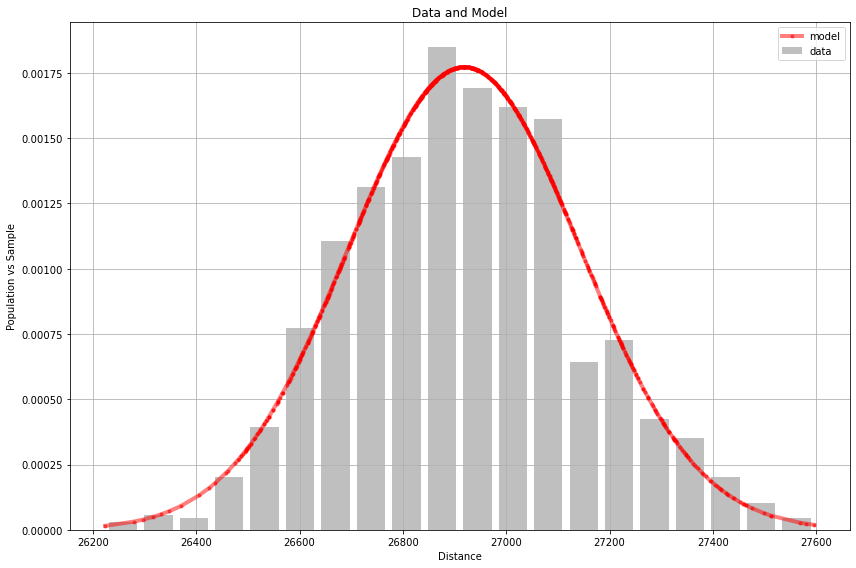

In [241]:
# Compute the mean and standard deviation of the sample_distances
sample_mean = np.mean(sample_distances)
sample_stdev = np.std(sample_distances)

# Use the sample mean and stdev as estimates of the population model parameters mu and sigma
population_model = gaussian_model(sample_distances, mu=sample_mean, sigma=sample_stdev)

# Plot the model and data to see how they compare
fig = plot_data_and_model(sample_distances, population_model, opt_sort=True)

## Maximizing Likelihood, Part 1

Previously, we chose the sample mean as an estimate of the population model paramter mu. But how do we know that the sample mean is the best estimator? This is tricky, so let's do it in two parts.

In Part 1, you will use a computational approach to compute the log-likelihood of a given estimate. Then, in Part 2, we will see that when you compute the log-likelihood for many possible guess values of the estimate, one guess will result in the maximum likelihood.

In [242]:
# Compute sample mean and stdev, for use as model parameter value guesses
mu_guess = np.mean(sample_distances)
sigma_guess = np.std(sample_distances)

# For each sample distance, compute the probability modeled by the parameter guesses
probs = np.zeros(len(sample_distances))
for n, distance in enumerate(sample_distances):
    probs[n] = gaussian_model(distance, mu=mu_guess, sigma=sigma_guess)

# Compute and print the log-likelihood as the sum() of the log() of the probabilities
loglikelihood = np.sum(np.log(probs))
print('For guesses mu={:0.2f} and sigma={:0.2f}, the loglikelihood={:0.2f}'.format(mu_guess, sigma_guess, loglikelihood))

For guesses mu=26918.39 and sigma=224.99, the loglikelihood=-6834.98


## Maximizing Likelihood, Part 2

In Part 1, you computed a single log-likelihood for a single mu. In this Part 2, you will apply the predefined function compute_loglikelihood() to compute an array of log-likelihood values, one for each element in an array of possible mu values.

The goal then is to determine which single mu guess leads to the single maximum value of the loglikelihood array.

To get started, use the preloaded data sample_distances, sample_mean, sample_stdev and a helper function compute_loglikelihood().

In [247]:
def compute_loglikelihood(samples, mu, sigma=250):
    probs = np.zeros(len(samples))
    for n, sample in enumerate(samples):
        probs[n] = gaussian_model(sample, mu, sigma)
        loglikelihood = np.sum(np.log(probs))
        return loglikelihood

In [250]:
def plot_loglikelihoods(mu_guesses, loglikelihoods):
    max_loglikelihood = np.max(loglikelihoods)
    max_index = np.where(loglikelihoods==max_loglikelihood)
    max_guess = mu_guesses[max_index][0]
    fig, axis = plt.subplots(figsize=(10,6))
    axis.plot(mu_guesses, loglikelihoods)
    axis.plot(max_guess, max_loglikelihood, marker="o", color="red")
    axis.grid()
    axis.set_ylabel('Log Likelihoods')
    axis.set_xlabel('Guesses for Mu')
    axis.set_title('Max Log Likelihood = {:0.1f}\n was found at Mu = {:0.1f}'.format(max_loglikelihood, max_guess))
    fig.tight_layout()
    plt.show()
    return fig

Maximum loglikelihood found for best mu guess=[26468.41823677 26477.41772032 26486.41720386 26495.41668741
 26504.41617096 26513.4156545  26522.41513805 26531.41462159
 26540.41410514 26549.41358868 26558.41307223 26567.41255578
 26576.41203932 26585.41152287 26594.41100641 26603.41048996
 26612.4099735  26621.40945705 26630.4089406  26639.40842414
 26648.40790769 26657.40739123 26666.40687478 26675.40635832
 26684.40584187 26693.40532542 26702.40480896 26711.40429251
 26720.40377605 26729.4032596  26738.40274314 26747.40222669
 26756.40171024 26765.40119378 26774.40067733 26783.40016087
 26792.39964442 26801.39912796 26810.39861151 26819.39809506
 26828.3975786  26837.39706215 26846.39654569 26855.39602924
 26864.39551278 26873.39499633 26882.39447988 26891.39396342
 26900.39344697 26909.39293051 26918.39241406 26927.3918976
 26936.39138115 26945.3908647  26954.39034824 26963.38983179
 26972.38931533 26981.38879888 26990.38828242 26999.38776597
 27008.38724952 27017.38673306 27026.386

<ipython-input-247-1d0d7c941aaa>:5: RuntimeWarning: divide by zero encountered in log
  loglikelihood = np.sum(np.log(probs))


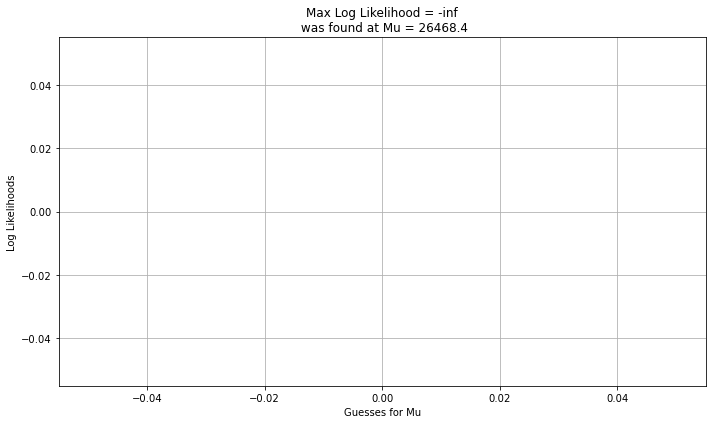

In [251]:
# Create an array of mu guesses, centered on sample_mean, spread out +/- by sample_stdev
low_guess = sample_mean - 2*sample_stdev
high_guess = sample_mean + 2*sample_stdev
mu_guesses = np.linspace(low_guess, high_guess, 101)

# Compute the loglikelihood for each model created from each guess value
loglikelihoods = np.zeros(len(mu_guesses))
for n, mu_guess in enumerate(mu_guesses):
    loglikelihoods[n] = compute_loglikelihood(sample_distances, mu=mu_guess, sigma=sample_stdev)

# Find the best guess by using logical indexing, the print and plot the result
best_mu = mu_guesses[loglikelihoods==np.max(loglikelihoods)]
print('Maximum loglikelihood found for best mu guess={}'.format(best_mu))
fig = plot_loglikelihoods(mu_guesses, loglikelihoods)

## B

## Bootstrap and Standard Error

Imagine a National Park where park rangers hike each day as part of maintaining the park trails. They don't always take the same path, but they do record their final distance and time. We'd like to build a statistical model of the variations in daily distance traveled from a limited sample of data from one ranger.

Your goal is to use bootstrap resampling, computing one mean for each resample, to create a distribution of means, and then compute standard error as a way to quantify the "uncertainty" in the sample statistic as an estimator for the population statistic.

Use the preloaded sample_data array of 500 independent measurements of distance traveled. For now, we this is a simulated data set to simplify this lesson. Later, we'll see more realistic data.

In [257]:
sample_data = np.array([ -2.56528602e-01,   1.33537708e+00,   3.10605971e+00,
        -3.88306749e-01,  -3.68273914e-01,   3.27842563e+00,
         1.67486946e+00,  -7.78948772e-01,   1.26512009e+00,
        -7.26835386e-01,  -7.11459507e-01,   7.23924543e-01,
        -3.56656049e+00,  -3.16983567e+00,  -8.24575058e-01,
        -1.70566224e+00,   9.68494665e-01,  -1.45604815e+00,
        -2.44460740e+00,   3.33129754e+00,  -3.15526010e-02,
         5.75056409e-01,  -2.38949637e+00,  -6.08765449e-01,
         7.21845179e-01,  -1.78198715e+00,   1.29139604e+00,
        -6.41277380e-01,  -3.38749959e-03,  -6.03413224e-01,
         4.32455637e+00,   6.13005551e-01,  -1.45542186e+00,
         2.32508982e+00,  -1.74168730e+00,   1.13772719e+00,
        -3.17934025e+00,  -1.89637210e+00,   1.17372247e+00,
         2.27693316e+00,   1.16273656e+00,   6.08703435e-01,
         2.57792609e-01,  -2.07704398e+00,  -5.39688417e-01,
        -1.27754192e-03,   3.05424445e+00,   1.64723658e+00,
        -2.54608031e+00,   1.64816794e+00,   2.49835439e-01,
        -3.13844001e-01,   2.28335258e+00,   3.14199904e+00,
         2.96256024e+00,  -5.58435046e-01,   5.21575248e-01,
         1.82252686e+00,   3.13109025e+00,   2.41651524e-01,
         8.48682047e-01,  -9.72669948e-01,  -1.13241325e+00,
         2.90505164e+00,   4.01248006e+00,   1.17597976e+00,
         3.34706580e+00,   2.08327205e+00,   8.97604908e-02,
         2.12279121e+00,   4.49607313e+00,   1.36834792e+00,
         4.58928731e+00,  -3.75949021e+00,   3.14380501e+00,
         1.69409414e+00,   9.41985299e-01,   1.74352155e+00,
        -2.39513783e+00,   1.16065622e+00,   2.33422514e+00,
         4.59578809e+00,   6.23459563e-01,   6.30127942e-02,
         6.96485913e-01,   3.55080424e+00,   2.39750222e+00,
         7.00479592e-01,   2.80653487e+00,   1.99415510e+00,
         3.75728998e+00,   4.35893812e-01,   1.20467571e+00,
         1.09578369e+00,  -1.02702990e+00,   2.51224055e+00,
         2.46211054e+00,   1.97022691e+00,   1.51082573e+00,
        -8.30741484e-01,   1.17870935e+00,   1.35457097e+00,
         4.55445462e-01,   1.75742858e+00,   2.90810171e+00,
         5.89237180e+00,   2.48915563e+00,   2.67510078e+00,
         2.03110817e+00,  -1.63754243e+00,   2.16697225e+00,
         2.36046042e+00,   7.18648422e+00,   1.89527807e+00,
         2.90309468e+00,   2.25057646e+00,   2.64392476e-03,
         4.64564563e+00,   3.88386607e+00,   3.98206389e+00,
         6.01225090e-01,   5.24558862e+00,  -3.43702126e-01,
         3.65371419e+00,   6.88091125e+00,   5.38927350e-01,
         1.40740454e+00,   2.75930273e+00,   1.57304869e+00,
        -5.01326862e-01,   2.75712595e+00,   5.15392573e-01,
         3.60718486e+00,   8.41151532e-01,   5.79986881e+00,
         1.15349342e+00,   2.09587697e+00,   4.38703443e+00,
         3.18271367e-01,   3.25491987e+00,   5.43428551e+00,
        -3.74966469e-01,   3.22926772e+00,   3.39976559e+00,
         4.46364574e+00,   4.46098578e-01,   2.99086774e-01,
         4.00388313e+00,   3.57396935e+00,   3.50098570e+00,
         3.71289642e+00,   1.67995056e+00,   3.52450739e+00,
         3.66614495e+00,   1.67129716e+00,   6.85154902e+00,
         4.08766584e+00,   7.77393006e-01,   4.49310722e+00,
         1.25063666e+00,   4.79416921e+00,   5.55719116e+00,
         1.61863536e+00,   5.20675226e+00,   4.12556185e+00,
         4.96412032e+00,   7.13358597e+00,   2.86922377e+00,
         1.87252767e+00,   1.62097114e+00,   1.78837943e+00,
         3.28579658e+00,   4.14230395e+00,   4.03338160e+00,
         5.15436650e+00,   3.54600378e+00,   6.44706815e+00,
         3.03068633e+00,   9.02033833e+00,   4.85133470e+00,
         1.90568489e+00,   1.49821500e+00,   4.62494483e+00,
         3.23307443e+00,   5.12800099e+00,   4.66647525e+00,
         3.59434217e+00,   2.06641256e+00,   7.50305551e-01,
         2.90697010e+00,   5.53279759e+00,   4.26818749e+00,
         1.36852244e+00,   4.22636185e+00,   4.67063476e+00,
         2.15228513e+00,   4.24745021e+00,   4.07641744e+00,
         1.69405940e+00,   4.71557472e+00,   5.14156905e+00,
         6.20610249e+00,   6.16760410e+00,   1.32466126e+00,
         2.22434992e+00,   5.15007053e+00,   5.16757190e+00,
         5.19009537e+00,   1.18854630e+01,   5.34178102e+00,
         6.49113128e+00,   6.14800353e+00,   5.56278250e+00,
         3.64946151e+00,   5.81793844e+00,   2.77434957e+00,
         3.86636279e+00,   3.38927290e+00,   4.54374828e+00,
         9.02931713e+00,   6.85469615e-01,   5.81252038e+00,
         1.23456826e+00,   3.53613627e+00,   6.67790119e+00,
         4.64856004e+00,   2.38451044e+00,   3.12939258e+00,
         5.93919550e+00,   3.13926674e+00,   5.05291718e+00,
         4.73114368e+00,   3.35679930e+00,   8.96788818e+00,
         5.96783804e+00,   6.69714827e-01,   5.11290863e+00,
         3.43642707e+00,   6.48486667e+00,   3.21495852e+00,
         4.59052712e+00,   5.84997456e+00,   6.59151039e+00,
         2.47940719e+00,   4.23099753e+00,   3.97010938e+00,
         3.63334153e+00,   8.49090848e+00,   5.78996342e+00,
         2.47823209e+00,   6.85572389e+00,   9.28431239e+00,
         7.12493052e+00,   2.04126007e+00,   4.13153185e+00,
         7.65382230e+00,   3.72466107e+00,   6.04763886e+00,
         6.72926811e+00,   3.34613906e+00,   5.10094929e+00,
        -1.24253468e+00,   3.21122472e+00,   4.77486370e+00,
         2.80443364e+00,   8.58482261e+00,   2.47971724e+00,
         4.47991103e+00,   5.64148115e+00,   8.28254658e+00,
         2.54827570e+00,   7.76632750e+00,   5.48046612e+00,
         3.51698270e+00,   6.42420695e+00,   5.91811939e+00,
         4.33956625e+00,   5.69960417e+00,   4.80937281e+00,
         5.82703469e+00,   6.94426135e+00,   8.81203363e+00,
         3.18436900e+00,   9.94606675e+00,   1.79582440e+00,
         5.41642981e+00,   6.91663441e+00,   6.32198374e+00,
         4.53460096e+00,   5.38375550e+00,   4.83399813e+00,
         4.66127049e+00,   7.55920419e+00,   6.59403097e+00,
         4.51418081e+00,   7.71919975e+00,   6.55459904e+00,
         7.58572424e+00,   7.23925768e+00,   4.34200998e+00,
         4.89963792e+00,   7.53458721e+00,   7.28074053e+00,
         6.03819681e+00,   6.33465477e+00,   8.67532979e+00,
         4.95685722e+00,   7.25419476e+00,   5.77561470e+00,
         5.76463759e+00,   8.41755370e+00,   7.89083270e+00,
         7.88701927e+00,   8.89095761e+00,   6.34200768e+00,
         7.68390594e+00,   5.71946649e+00,   7.00833270e+00,
         6.11971389e+00,   6.59399193e+00,   7.61031405e+00,
         4.80355863e+00,   1.06447746e+01,   4.46796524e+00,
         4.07162277e+00,   8.83622175e+00,   8.12332539e+00,
         7.80823963e+00,   7.83669102e+00,   6.57550645e+00,
         4.82549126e+00,   6.79160912e+00,   5.30567658e+00,
         8.63023947e+00,   6.40588524e+00,   5.06900561e+00,
         6.09722832e+00,   7.58586291e+00,   5.65255089e+00,
         5.15555921e+00,   7.30737442e+00,   7.32993314e+00,
         5.84611365e+00,   5.93792339e+00,   7.36409987e+00,
         4.02383132e+00,   4.12507245e+00,   5.52311156e+00,
         6.55310570e+00,   7.62181513e+00,   9.97071243e+00,
         8.75531925e+00,   6.74012294e+00,   7.04196758e+00,
         5.09494127e+00,   7.08297373e+00,   6.56268272e+00,
         7.80543712e+00,   5.52553811e+00,   8.23869303e+00,
         1.02854778e+01,   7.02247970e+00,   8.06342344e+00,
         8.66028798e+00,   6.49755906e+00,   7.76818496e+00,
         7.36518480e+00,   7.55535220e+00,   5.83398043e+00,
         7.44902035e+00,   8.41599658e+00,   1.03422872e+01,
         9.37854165e+00,   1.17863649e+01,   5.96530487e+00,
         9.26464127e+00,   7.90668401e+00,   1.19396059e+01,
         5.96340343e+00,   5.92055632e+00,   6.42121471e+00,
         3.39220855e+00,   6.60848996e+00,   6.16173468e+00,
         8.00078757e+00,   8.40351195e+00,   1.14923417e+01,
         9.66084768e+00,   6.62619269e+00,   6.00317066e+00,
         8.80383834e+00,   5.19953359e+00,   1.15229175e+01,
         1.02388802e+01,   6.96164870e+00,   4.49373094e+00,
         1.06477447e+01,   7.73092031e+00,   1.04556326e+01,
         4.81114468e+00,   6.82124995e+00,   8.05048740e+00,
         8.15396119e+00,   7.17986906e+00,   9.34569986e+00,
         5.98475914e+00,   7.85524103e+00,   8.40059126e+00,
         9.20887767e+00,   9.62322976e+00,   5.97071582e+00,
         5.17177166e+00,   1.08153536e+01,   8.94462802e+00,
         6.80302693e+00,   1.14223040e+01,   8.57134927e+00,
         1.07185944e+01,   8.51503696e+00,   1.25214958e+01,
         1.19306817e+01,   7.94207170e+00,   1.04031419e+01,
         9.77075190e+00,   1.12372631e+01,   6.59015308e+00,
         9.91210292e+00,   1.06768490e+01,   5.06252103e+00,
         6.23348297e+00,   4.54153564e+00,   8.10118633e+00,
         1.00950845e+01,   1.16847141e+01,   8.84818956e+00,
         1.19772311e+01,   5.97979708e+00,   5.35323512e+00,
         8.66890460e+00,   9.56813090e+00,   8.75461050e+00,
         4.70511580e+00,   8.68175992e+00,   6.27106100e+00,
         1.02393451e+01,   9.65319649e+00,   7.06024043e+00,
         7.93226617e+00,   6.86157296e+00,   8.87464181e+00,
         1.09302846e+01,   7.06854791e+00,   1.00680930e+01,
         8.01948476e+00,   7.51425434e+00,   8.90593928e+00,
         7.06951536e+00,   8.05270139e+00,   6.78424421e+00,
         1.31294503e+01,   9.29052710e+00,   7.84054898e+00,
         9.68795982e+00,   9.05534390e+00,   8.85806080e+00,
         1.05483334e+01,   1.08550154e+01,   8.29899770e+00,
         8.22836352e+00,   8.84989661e+00,   4.81615767e+00,
         6.40961788e+00,   1.21937485e+01,   1.27699354e+01,
         9.00192792e+00,   1.06731139e+01,   1.01625003e+01,
         1.57177616e+01,   1.18191498e+01,   9.34416482e+00,
         7.70891912e+00,   6.42710736e+00,   1.00669273e+01,
         8.16729851e+00,   6.85549258e+00,   8.42685423e+00,
         7.57690399e+00,   1.31342833e+01,   1.15432795e+01,
         9.78405472e+00,   1.27798883e+01,   9.99473662e+00,
         8.13743160e+00,   1.29262482e+01,   1.09778201e+01,
         7.84550769e+00,   9.55932264e+00,   8.20876349e+00,
         7.21440054e+00])
resample_size = 500
num_resamples = 100
bootstrap_means = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [258]:
def plot_data_hist(y):
    fig, axis = plt.subplots(figsize=(10,6))
    data_opts = dict(rwidth=0.8, color='blue', alpha=0.5)
    bin_range = np.max(y) - np.min(y)
    bin_edges = np.linspace(np.min(y), np.max(y), 21)
    plt.hist(y, bins=bin_edges, **data_opts)
    axis.set_xlim(np.min(y) - 0.5*bin_range, np.max(y) + 0.5*bin_range)
    axis.grid("on")
    axis.set_ylabel("Resample Counts per Bin")
    axis.set_xlabel("Resample Means")
    axis.set_title("Resample Count = {}, \nMean = {:0.2f}, Std Error = {:0.2f}".format(len(y), np.mean(y), np.std(y)))
    fig.tight_layout()
    plt.show()
    return fig

Bootstrap Distribution: center=5.0, spread=0.2


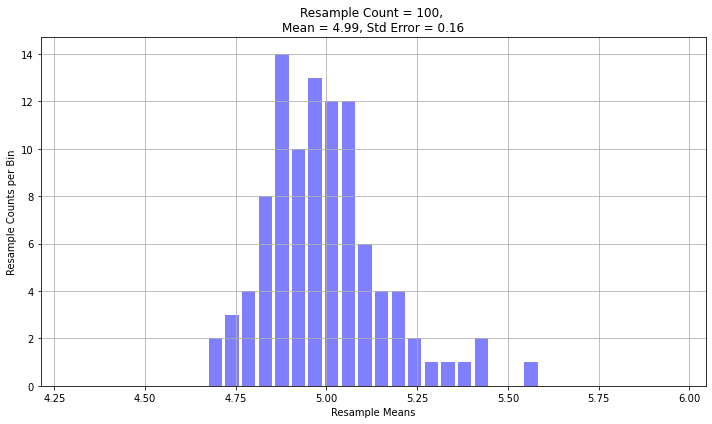

In [259]:
# Use the sample_data as a model for the population
population_model = sample_data

# Resample the population_model 100 times, computing the mean each sample
for nr in range(num_resamples):
    bootstrap_sample = np.random.choice(population_model, size=resample_size, replace=True)
    bootstrap_means[nr] = np.mean(bootstrap_sample)

# Compute and print the mean, stdev of the resample distribution of means
distribution_mean = np.mean(bootstrap_means)
standard_error = np.std(bootstrap_means)
print('Bootstrap Distribution: center={:0.1f}, spread={:0.1f}'.format(distribution_mean, standard_error))

# Plot the bootstrap resample distribution of means
fig = plot_data_hist(bootstrap_means)

## Estimating Speed and Confidence

Let's continue looking at the National Park hiking data. Notice that some distances are negative because they walked in the opposite direction from the trail head; the data are messy so let's just focus on the overall trend.

In this exercise, you goal is to use boot-strap resampling to find the distribution of speed values for a linear model, and then from that distribution, compute the best estimate for the speed and the 90th percent confidence interval of that estimate. The speed here is the slope parameter from the linear regression model to fit distance as a function of time.

To get you started, we've preloaded distance and time data, together with a pre-defined least_squares() function to compute the speed value for each resample.

In [265]:
num_resamples = 1000
resample_speeds = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
distances = np.array([0.993428306022,-0.256528602342,1.3353770762,3.10605971282,-0.388306749447,-0.368273913898,3.27842563101,1.67486945831,-0.77894877187,1.26512008717,-0.726835385625,-0.711459507141,0.723924543132,-3.56656048932,-3.16983566503,-0.824575058482,-1.70566224067,0.968494665191,-1.45604815104,-2.44460740267,3.33129753784,-0.0315526009731,0.575056409376,-2.38949637243,-0.60876544905,0.72184517942,-1.78198715484,1.29139603669,-0.641277379838,-0.00338749958655,-0.603413224459,4.32455636902,0.613005550524,-1.45542185791,2.32508982421,-1.74168729994,1.13772719001,-3.17934024776,-1.8963720978,1.17372247174,2.27693315999,1.16273656238,0.608703435224,0.257792608821,-2.07704398073,-0.539688416789,-0.00127754191957,3.05424445244,1.64723657914,-2.54608031073,1.64816793879,0.249835439167,-0.313844000612,2.28335257768,3.14199904499,2.96256023823,-0.558435046445,0.521575248298,1.82252686281,3.13109025424,0.241651524309,0.848682046672,-0.972669948012,-1.13241324816,2.90505164479,4.01248005714,1.17597975684,3.34706579578,2.0832720501,0.0897604907898,2.12279121102,4.49607313293,1.36834792178,4.58928731163,-3.75949020818,3.14380500875,1.69409413648,0.941985299068,1.74352155307,-2.3951378292,1.16065622432,2.33422514302,4.59578808948,0.623459563453,0.0630127942136,0.696485912831,3.5508042354,2.39750221932,0.700479592466,2.80653486623,1.9941550987,3.75728998107,0.435893812245,1.2046757068,1.09578369374,-1.02702989626,2.51224055413,2.46211054436,1.97022691328,1.51082573325,-0.830741484101,1.17870935447,1.35457096695,0.455445461557,1.75742857667,2.90810171363,5.89237180242,2.48915562566,2.67510078145,2.03110816847,-1.6375424306,2.1669722491,2.36046041988,7.18648422497,1.89527807044,2.90309468467,2.25057646059,0.00264392476094,4.64564562903,3.88386606537,3.98206389409,0.601225090411,5.24558862187,-0.343702125585,3.6537141876,6.88091125162,0.538927349739,1.40740454079,2.75930273018,1.57304869177,-0.501326862132,2.75712594961,0.515392572548,3.60718486127,0.841151531532,5.79986881004,1.15349341533,2.09587696759,4.38703443474,0.318271367132,3.25491986921,5.43428550856,-0.374966469122,3.22926771706,3.3997655885,4.46364574355,0.446098578244,0.299086773831,4.00388313123,3.57396934647,3.50098570069,3.71289641899,1.67995055684,3.52450739432,3.6661449466,1.67129716395,6.85154902229,4.08766584182,0.777393005595,4.49310721727,1.25063665955,4.79416920748,5.55719115801,1.6186353633,5.20675225849,4.12556185387,4.96412031999,7.13358596531,2.86922376799,1.87252767129,1.62097114075,1.78837943007,3.28579658117,4.14230394963,4.03338159866,5.15436649807,3.54600378376,6.44706815431,3.03068633352,9.02033833318,4.85133469553,1.90568488717,1.49821500388,4.62494483049,3.23307442935,5.12800098818,4.66647524915,3.59434217469,2.06641256386,0.750305550628,2.90697009587,5.53279758865,4.26818748826,1.36852244258,4.2263618517,4.67063475946,2.1522851276,4.24745021189,4.07641743689,1.69405940434,4.7155747207,5.14156905274,6.20610248635,6.16760410407,1.32466126409,2.22434992017,5.15007053442,5.16757190182,5.19009537261,11.8854629813,5.34178102139,6.49113128036,6.14800352699,5.56278250261,3.64946151072,5.81793844099,2.77434957092,3.86636278652,3.38927290434,4.54374827877,9.02931713335,0.685469614817,5.81252038075,1.23456825762,3.53613626842,6.67790119393,4.64856003819,2.38451044414,3.12939258148,5.93919549787,3.13926673657,5.05291717916,4.73114367981,3.35679930479,8.96788817865,5.96783804464,0.669714826685,5.11290862954,3.43642707046,6.48486666959,3.21495852313,4.59052711707,5.84997455796,6.59151038834,2.47940718589,4.23099752832,3.97010937768,3.63334153485,8.49090848056,5.78996342192,2.47823209133,6.85572389411,9.28431239403,7.1249305211,2.04126006809,4.13153185427,7.65382229837,3.72466106876,6.04763885629,6.72926810686,3.34613905684,5.10094928788,-1.24253468014,3.21122471733,4.77486369721,2.80443363607,8.58482260786,2.47971724408,4.47991102661,5.64148115457,8.28254657813,2.54827569764,7.76632750431,5.48046612204,3.5169826979,6.42420694853,5.91811939115,4.33956624568,5.69960416998,4.80937280628,5.8270346905,6.94426134904,8.81203363229,3.18436900235,9.94606674931,1.79582440095,5.41642980993,6.91663441297,6.32198373547,4.53460096036,5.38375549929,4.83399813068,4.66127048611,7.55920419404,6.59403097193,4.51418080948,7.71919975087,6.55459904175,7.58572423768,7.23925768385,4.34200997816,4.89963791961,7.53458721025,7.28074053087,6.03819681207,6.33465476662,8.67532979158,4.95685722233,7.25419476234,5.77561469513,5.76463759355,8.41755370397,7.89083269798,7.887019272,8.89095761431,6.34200768327,7.68390594259,5.71946648681,7.00833270498,6.11971389126,6.59399192999,7.61031405087,4.80355863353,10.6447745514,4.467965237,4.07162277442,8.836221747,8.12332538793,7.8082396341,7.83669101853,6.57550645431,4.82549125703,6.79160911639,5.30567657698,8.63023946684,6.405885237,5.06900560641,6.09722831669,7.58586290855,5.65255089439,5.15555920887,7.30737442298,7.32993314222,5.84611364926,5.93792338876,7.36409987472,4.02383131701,4.12507245125,5.5231115575,6.55310569658,7.6218151312,9.9707124339,8.7553192464,6.74012294007,7.04196758419,5.09494127072,7.08297372802,6.56268272216,7.80543712068,5.5255381129,8.23869302848,10.285477826,7.02247970309,8.0634234442,8.66028798342,6.49755905623,7.76818496362,7.36518480156,7.5553521971,5.83398043229,7.44902034852,8.41599658249,10.3422872156,9.37854165217,11.786364915,5.96530487422,9.26464127344,7.90668401148,11.9396058664,5.96340342929,5.92055631564,6.42121470911,3.39220855138,6.60848995664,6.16173467689,8.00078757295,8.40351195155,11.4923416784,9.66084767637,6.62619268868,6.0031706573,8.80383834301,5.19953358596,11.5229175317,10.2388802414,6.96164869579,4.49373094182,10.6477447483,7.73092030949,10.4556326239,4.81114468241,6.82124995409,8.05048739944,8.15396118753,7.17986905704,9.34569986469,5.98475914123,7.85524102996,8.40059126342,9.20887766812,9.62322975618,5.97071581632,5.17177165853,10.8153536438,8.94462802396,6.80302692689,11.422303951,8.57134926859,10.7185943681,8.51503696282,12.5214958498,11.9306816849,7.94207170304,10.4031419019,9.77075189917,11.2372631151,6.59015307884,9.91210292,10.6768489737,5.06252102715,6.23348297467,4.54153564448,8.10118633111,10.0950845116,11.6847141042,8.84818956084,11.9772310911,5.97979708357,5.35323512129,8.66890460221,9.56813089788,8.75461050381,4.70511579992,8.68175992097,6.27106099899,10.2393450977,9.65319649219,7.06024042735,7.93226616533,6.86157295622,8.87464180545,10.930284641,7.06854790733,10.068093031,8.01948476326,7.51425433548,8.90593928009,7.06951535516,8.05270138931,6.78424421482,13.1294502658,9.29052710394,7.84054898401,9.68795982147,9.05534390062,8.85806080093,10.5483334001,10.8550154201,8.29899770478,8.22836351871,8.8498966057,4.81615767053,6.4096178756,12.1937485349,12.769935427,9.00192792089,10.6731139261,10.1625003091,15.7177616169,11.8191498229,9.34416481704,7.7089191188,6.42710735948,10.0669272717,8.16729850943,6.8554925808,8.42685423151,7.57690399277,13.1342832701,11.5432795139,9.78405471737,12.7798882778,9.9947366153,8.13743159734,12.9262481545,10.9778200874,7.84550769135,9.55932264383,8.20876349323,7.21440053807,11.8523550951,13.8388332809,7.24286485236,11.1859384734,8.77871486176,9.12574923247,8.93521215152,8.41201846064,10.2570432559,8.51809976718,10.7409136516,10.1195237811,9.76210390627,8.44487267592,9.12645733886,11.8107824517,11.3218343752,8.3848895104,10.5586646109,11.8827742467,7.06118943776,11.5067203848,9.11475248211,11.6011973372,8.95348168691,6.89023579867,7.26491512423,10.6361698933,11.0794450034,8.77136674979,11.8771849176,7.29695987546,10.5078404027,8.23796760048,9.3763277844,10.7947973426,8.99917326943,9.97088891154,12.7725856184,9.62621626095,12.4713842241,8.56058629068,11.8996083558,13.7431372413,5.93671099975,9.30620948906,12.0741442544,10.5339092279,11.7022917467,9.77202962657,11.1731795749,10.7086455292,13.3755641233,11.5688416866,11.7552053242,10.2762460678,10.1447875519,10.2748836244,11.9489042848,10.3380310384,11.7795497138,15.3708015973,12.9822494069,10.6079529357,13.6824278443,10.483849254,7.24375092964,9.32382737817,7.61841615795,10.6769730319,11.4368367584,14.7728746246,12.0938547475,11.0217989424,13.1388111624,7.07772938198,11.9912291162,13.0817303878,8.60282750844,13.8675080864,12.276992815,10.7894241722,12.9055637322,16.2013857156,12.0437325101,12.1964411726,10.8012782009,10.0403112611,13.4206716331,10.0678323482,11.9431324744,10.8646851065,12.7979596515,12.5273242106,13.9550798885,10.8799672023,11.3802501294,9.98247256844,11.0714134798,12.7346009861,13.5139772333,10.1756693516,13.7792118402,14.7712757176,12.9068698064,15.8535916251,10.5724216018,9.65069059338,8.60255950219,15.172088623,13.5087313127,12.1088306582,12.7999372526,10.0090219054,17.1715039592,12.558442364,12.5387895892,13.7915332478,13.3220184635,12.8277680486,10.8190510891,13.3629367143,16.204048993,15.1508400923,15.6663732533,11.4775686471,10.5407903595,12.2884261598,12.6714498246,14.7683830369,9.21507074057,15.6791006389,12.3239842028,11.8062378601,10.6557912495,9.39028665627,14.3663411679,12.8866359344,10.1800782005,10.1898424559,12.1284306014,16.1580430506,12.3208172973,9.85371409376,12.3885138718,12.3545528605,7.52622671412,12.831410267,12.4981309396,14.3724127296,16.6979121899,15.2731300591,12.5022226189,10.8469481825,18.2267196065,13.218436868,13.1478585838,13.0917498258,13.5561695215,12.8912791762,12.0526759862,12.1262821175,13.1744934596,12.1731504577,11.8543084346,13.5128604554,12.8100455652,16.3479859772,8.05806038321,15.5630137038,15.892170385,9.27321953518,12.7546248118,12.717118268,10.6649766106,11.9443666248,11.2988483091,17.0445408868,15.4313567863,16.12311019,15.0433441281,11.3618964576,12.5909594674,14.6387491225,11.2357443822,15.1259968603,13.2393492037,12.9903583849,15.1819199364,14.668526623,13.0780676684,16.1386596067,11.6778733448,15.0918712139,15.0662025159,13.2809071214,14.5722660445,11.4377728472,15.8080540384,13.6101957271,12.954553959,16.1180184517,12.6313126189,11.2430774073,10.966741653,15.3120199027,11.559141295,17.649588364,9.99614118423,17.5729127366,14.6220349344,14.0265737763,13.1501618264,15.0582722287,14.2047305952,16.506603764,14.5484552973,14.6406035229,13.6327755756,14.2661087526,15.0156035378,10.9996632147,11.7436291558,15.946528188,14.8217308763,14.1320333273,14.5568678661,15.2351634107,13.4804806394,13.0233905492,14.9916905102,12.6632544448,15.4565055114,11.2548327915,16.7383112747,15.6451949648,15.2320594686,16.7053819679,18.0909488889,16.80874013,11.1182515373,12.2608460665,13.5903628446,14.9121821004,15.9153180409,13.4485123737,15.293533529,13.4292341353,13.736964394,12.1666778063,13.1535335078,12.3166307888,13.088253494,17.1672835932,13.1812022223,20.3647641297,16.1066358018,15.5096722474,13.4432844396,16.5806197588,14.0487243475,15.4640196293,20.3601690765,15.0678802006,17.5785466526,13.8936471497,15.250023019,18.8816012713,14.1060658844,19.004897116,16.8155038709,14.2950664482,16.7048154781,17.4051088993,16.7236199244,12.3595505602,14.0657256484,15.0449627289,15.4111331418,16.8213441951,15.9554020019,12.9493112826,16.400395702,16.8811714906,16.7995808959,17.8615614511,17.3878443091,16.6583601585,15.6196685771,12.458078133,16.6592364383,16.2353753743,16.3831576744,13.3065028484,13.7178869192,18.0063057067,15.8408896923,17.3030013947,16.0166367523,16.039512279,17.876567612,14.9879105436,16.2322415539,15.1354494226,15.2110075451,15.4816557531,16.5642675433,15.1825027567,18.6715122511,14.3907853956,15.8262567117,15.3405378835,19.1339557687,16.653109553,18.3436890789,13.3288792539,16.8541005317,18.1192615912,16.5245679786,18.5109607501,15.3654230998,19.2386948804,21.0377962472,15.7343228791,15.5889949572,19.4067689542,19.6791442915,15.4942799457,15.7196263658,16.0164307823,13.9110989779,14.782696107,14.6317184665,15.1244048698,16.6106302252,17.1684294651,19.8210009856,14.7432919185,18.728644797,16.3520223115,16.7010725807,18.1696389843,14.5945559569,17.6248194924,17.2129044164,17.884902528,17.4983372878,21.8506002798,15.6845200315,15.91800609,15.7537189472,15.9090457617,15.7652257454,19.4380330622,19.921008496,15.9585074125,15.4552888538,18.0828311128,16.0555539114,18.4458636355,17.6058460417,14.18851177,20.3350104027,20.8517553462,16.054422619,16.5245968801,17.8917307814,18.00891358,18.6770885453,21.4004090775,17.046105545,15.8234055109,14.681361544,15.9981399201,17.4137460543,21.089115727,16.4847774019,17.9875759033,17.5271542079,19.9567865469,22.6538648517,16.5582624542,16.661121115,19.7483217541,19.0437829793,21.3934146515,18.8878563707,17.0214158184,18.9413096614,19.9974071612,19.4409643624,18.8345480622,19.9733493792,20.1985911809,20.6443179821,19.1974197752,17.5857638394,18.2334273729,20.373017933,16.346128658,18.7373466177,17.2333223753,18.0974896459,20.6169037252,18.462198136,18.1928730963,15.400287718,19.6325071321,19.4509683623,22.5065094466,17.5844435301,18.6583006553,18.7387673674,21.4149065595,18.0894089352,18.8580430515,19.5357930194,18.7132182463,17.4671327709,18.7681799858,20.5472634997,16.3669694012,18.7059393483,17.0597583701,20.8700932578,15.4536261904,17.4021563055,19.2944237501,21.6910480585,18.4484994779,17.4896009466,22.3823141389,15.7439721992,14.2623880868,19.5600289001,17.6958915513,16.6775343657,20.1567128946,19.2476014275,17.6518427385,16.2393912027,20.5649146566,20.1404023559,18.6616482724,22.5732739921,16.7598304673,15.8689496582,17.5561838602,18.8688279673,19.4666788986,18.5175278843,19.724110793,16.5369211516,21.9475292081,18.9156976432,21.3345916632,19.8054506928,20.0535064383,20.2995345605,20.07541712,20.4854455197,21.8783050603,19.6330423394,20.6780075152,19.1005286114,22.1802344309,17.9672153959,22.9418808658,19.2796840987,16.5184497958,19.6562088298,18.0578966851,21.121287098,18.1547520414,18.5876331336,15.7209185381,18.6153873615,14.6922413467,16.392194353,21.1008293123,21.1716003173,20.4709151236,17.7060477137,19.5645772877,19.6727949218,17.3832706216,22.7267966035,21.4947245812,19.3180716523,19.833771678,20.2167656159,15.7365302632,19.345645235,18.496031504,17.8767599802,19.3377994142,23.5153730537,21.2216857225,18.8176420204,21.1251655627,22.7987108732])
times = np.array([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.1,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.2,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.3,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.4,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.5,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.6,1.61,1.62,1.63,1.64,1.65,1.66,1.67,1.68,1.69,1.7,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78,1.79,1.8,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89,1.9,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2.0,2.01,2.02,2.03,2.04,2.05,2.06,2.07,2.08,2.09,2.1,2.11,2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.2,2.21,2.22,2.23,2.24,2.25,2.26,2.27,2.28,2.29,2.3,2.31,2.32,2.33,2.34,2.35,2.36,2.37,2.38,2.39,2.4,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.5,2.51,2.52,2.53,2.54,2.55,2.56,2.57,2.58,2.59,2.6,2.61,2.62,2.63,2.64,2.65,2.66,2.67,2.68,2.69,2.7,2.71,2.72,2.73,2.74,2.75,2.76,2.77,2.78,2.79,2.8,2.81,2.82,2.83,2.84,2.85,2.86,2.87,2.88,2.89,2.9,2.91,2.92,2.93,2.94,2.95,2.96,2.97,2.98,2.99,3.0,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.1,3.11,3.12,3.13,3.14,3.15,3.16,3.17,3.18,3.19,3.2,3.21,3.22,3.23,3.24,3.25,3.26,3.27,3.28,3.29,3.3,3.31,3.32,3.33,3.34,3.35,3.36,3.37,3.38,3.39,3.4,3.41,3.42,3.43,3.44,3.45,3.46,3.47,3.48,3.49,3.5,3.51,3.52,3.53,3.54,3.55,3.56,3.57,3.58,3.59,3.6,3.61,3.62,3.63,3.64,3.65,3.66,3.67,3.68,3.69,3.7,3.71,3.72,3.73,3.74,3.75,3.76,3.77,3.78,3.79,3.8,3.81,3.82,3.83,3.84,3.85,3.86,3.87,3.88,3.89,3.9,3.91,3.92,3.93,3.94,3.95,3.96,3.97,3.98,3.99,4.0,4.01,4.02,4.03,4.04,4.05,4.06,4.07,4.08,4.09,4.1,4.11,4.12,4.13,4.14,4.15,4.16,4.17,4.18,4.19,4.2,4.21,4.22,4.23,4.24,4.25,4.26,4.27,4.28,4.29,4.3,4.31,4.32,4.33,4.34,4.35,4.36,4.37,4.38,4.39,4.4,4.41,4.42,4.43,4.44,4.45,4.46,4.47,4.48,4.49,4.5,4.51,4.52,4.53,4.54,4.55,4.56,4.57,4.58,4.59,4.6,4.61,4.62,4.63,4.64,4.65,4.66,4.67,4.68,4.69,4.7,4.71,4.72,4.73,4.74,4.75,4.76,4.77,4.78,4.79,4.8,4.81,4.82,4.83,4.84,4.85,4.86,4.87,4.88,4.89,4.9,4.91,4.92,4.93,4.94,4.95,4.96,4.97,4.98,4.99,5.0,5.01,5.02,5.03,5.04,5.05,5.06,5.07,5.08,5.09,5.1,5.11,5.12,5.13,5.14,5.15,5.16,5.17,5.18,5.19,5.2,5.21,5.22,5.23,5.24,5.25,5.26,5.27,5.28,5.29,5.3,5.31,5.32,5.33,5.34,5.35,5.36,5.37,5.38,5.39,5.4,5.41,5.42,5.43,5.44,5.45,5.46,5.47,5.48,5.49,5.5,5.51,5.52,5.53,5.54,5.55,5.56,5.57,5.58,5.59,5.6,5.61,5.62,5.63,5.64,5.65,5.66,5.67,5.68,5.69,5.7,5.71,5.72,5.73,5.74,5.75,5.76,5.77,5.78,5.79,5.8,5.81,5.82,5.83,5.84,5.85,5.86,5.87,5.88,5.89,5.9,5.91,5.92,5.93,5.94,5.95,5.96,5.97,5.98,5.99,6.0,6.01,6.02,6.03,6.04,6.05,6.06,6.07,6.08,6.09,6.1,6.11,6.12,6.13,6.14,6.15,6.16,6.17,6.18,6.19,6.2,6.21,6.22,6.23,6.24,6.25,6.26,6.27,6.28,6.29,6.3,6.31,6.32,6.33,6.34,6.35,6.36,6.37,6.38,6.39,6.4,6.41,6.42,6.43,6.44,6.45,6.46,6.47,6.48,6.49,6.5,6.51,6.52,6.53,6.54,6.55,6.56,6.57,6.58,6.59,6.6,6.61,6.62,6.63,6.64,6.65,6.66,6.67,6.68,6.69,6.7,6.71,6.72,6.73,6.74,6.75,6.76,6.77,6.78,6.79,6.8,6.81,6.82,6.83,6.84,6.85,6.86,6.87,6.88,6.89,6.9,6.91,6.92,6.93,6.94,6.95,6.96,6.97,6.98,6.99,7.0,7.01,7.02,7.03,7.04,7.05,7.06,7.07,7.08,7.09,7.1,7.11,7.12,7.13,7.14,7.15,7.16,7.17,7.18,7.19,7.2,7.21,7.22,7.23,7.24,7.25,7.26,7.27,7.28,7.29,7.3,7.31,7.32,7.33,7.34,7.35,7.36,7.37,7.38,7.39,7.4,7.41,7.42,7.43,7.44,7.45,7.46,7.47,7.48,7.49,7.5,7.51,7.52,7.53,7.54,7.55,7.56,7.57,7.58,7.59,7.6,7.61,7.62,7.63,7.64,7.65,7.66,7.67,7.68,7.69,7.7,7.71,7.72,7.73,7.74,7.75,7.76,7.77,7.78,7.79,7.8,7.81,7.82,7.83,7.84,7.85,7.86,7.87,7.88,7.89,7.9,7.91,7.92,7.93,7.94,7.95,7.96,7.97,7.98,7.99,8.0,8.01,8.02,8.03,8.04,8.05,8.06,8.07,8.08,8.09,8.1,8.11,8.12,8.13,8.14,8.15,8.16,8.17,8.18,8.19,8.2,8.21,8.22,8.23,8.24,8.25,8.26,8.27,8.28,8.29,8.3,8.31,8.32,8.33,8.34,8.35,8.36,8.37,8.38,8.39,8.4,8.41,8.42,8.43,8.44,8.45,8.46,8.47,8.48,8.49,8.5,8.51,8.52,8.53,8.54,8.55,8.56,8.57,8.58,8.59,8.6,8.61,8.62,8.63,8.64,8.65,8.66,8.67,8.68,8.69,8.7,8.71,8.72,8.73,8.74,8.75,8.76,8.77,8.78,8.79,8.8,8.81,8.82,8.83,8.84,8.85,8.86,8.87,8.88,8.89,8.9,8.91,8.92,8.93,8.94,8.95,8.96,8.97,8.98,8.99,9.0,9.01,9.02,9.03,9.04,9.05,9.06,9.07,9.08,9.09,9.1,9.11,9.12,9.13,9.14,9.15,9.16,9.17,9.18,9.19,9.2,9.21,9.22,9.23,9.24,9.25,9.26,9.27,9.28,9.29,9.3,9.31,9.32,9.33,9.34,9.35,9.36,9.37,9.38,9.39,9.4,9.41,9.42,9.43,9.44,9.45,9.46,9.47,9.48,9.49,9.5,9.51,9.52,9.53,9.54,9.55,9.56,9.57,9.58,9.59,9.6,9.61,9.62,9.63,9.64,9.65,9.66,9.67,9.68,9.69,9.7,9.71,9.72,9.73,9.74,9.75,9.76,9.77,9.78,9.79,9.8,9.81,9.82,9.83,9.84,9.85,9.86,9.87,9.88,9.89,9.9,9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0])


In [266]:
def least_squares(x, y):
    x_mean = np.sum(x)/len(x)
    y_mean = np.sum(y)/len(y)
    x_dev = x - x_mean
    y_dev = y - y_mean
    a1 = np.sum(x_dev * y_dev) / np.sum( np.square(x_dev) )
    a0 = y_mean - (a1 * x_mean)
    return a0, a1

In [267]:
# Resample each preloaded population, and compute speed distribution
population_inds = np.arange(0, 99, dtype=int)
for nr in range(num_resamples):
    sample_inds = np.random.choice(population_inds, size=100, replace=True)
    sample_inds.sort()
    sample_distances = distances[sample_inds]
    sample_times = times[sample_inds]
    a0, a1 = least_squares(sample_times, sample_distances)
    resample_speeds[nr] = a1

# Compute effect size and confidence interval, and print
speed_estimate = np.mean(resample_speeds)
ci_90 = np.percentile(resample_speeds, [5, 95])
print('Speed Estimate = {:0.2f}, 90% Confidence Interval: {:0.2f}, {:0.2f} '.format(speed_estimate, ci_90[0], ci_90[1]))

Speed Estimate = 2.34, 90% Confidence Interval: 1.37, 3.35 


## Visualize the Bootstrap

Continuing where we left off earlier in this lesson, let's visualize the bootstrap distribution of speeds estimated using bootstrap resampling, where we computed a least-squares fit to the slope for every sample to test the variation or uncertainty in our slope estimation.

To get you started, we've preloaded a function compute_resample_speeds(distances, times) to do the computation of generate the speed sample distribution.

In [269]:
def compute_resample_speeds(distances, times):
    num_resamples = 1000
    population_inds = np.arange(0, 99, dtype=int)
    resample_speeds = np.zeros(num_resamples)
    for nr in range(num_resamples):
        sample_inds = np.random.choice(population_inds, size=100, replace=True)
        sample_inds.sort()
        sample_distances = distances[sample_inds]
        sample_times = times[sample_inds]
        a0, a1 = least_squares(sample_times, sample_distances)
        resample_speeds[nr] = a1
        return resample_speeds

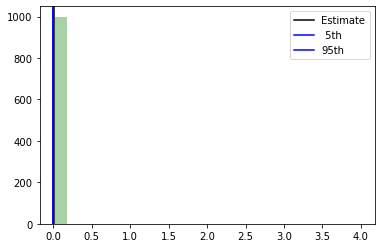

In [270]:
# Create the bootstrap distribution of speeds
resample_speeds = compute_resample_speeds(distances, times)
speed_estimate = np.mean(resample_speeds)
percentiles = np.percentile(resample_speeds, [5, 95])

# Plot the histogram with the estimate and confidence interval
fig, axis = plt.subplots()
hist_bin_edges = np.linspace(0.0, 4.0, 21)
axis.hist(resample_speeds, bins=hist_bin_edges, color='green', alpha=0.35, rwidth=0.8)
axis.axvline(speed_estimate, label='Estimate', color='black')
axis.axvline(percentiles[0], label=' 5th', color='blue')
axis.axvline(percentiles[1], label='95th', color='blue')
axis.legend()
plt.show()

## C

## Test Statistics and Effect Size

How can we explore linear relationships with bootstrap resampling? Back to the trail! For each hike plotted as one point, we can see that there is a linear relationship between total distance traveled and time elapsed. It we treat the distance traveled as an "effect" of time elapsed, then we can explore the underlying connection between linear regression and statistical inference.

In this exercise, you will separate the data into two populations, or "categories": early times and late times. Then you will look at the differences between the total distance traveled within each population. This difference will serve as a "test statistic", and it's distribution will test the effect of separating distances by times.

In [3]:
sample_distances = np.array([0.132007268184,0.0,0.0,0.0,0.468149506458,0.0,0.240797544588,0.298593952696,0.344722376531,0.414829360566,0.213652925322,0.0,0.196486473313,0.0812094637505,0.471811569519,0.532429906151,0.368369069053,0.63557727631,0.501264954618,0.580701223465,0.590521626201,0.72011590985,0.429261682745,0.476214388162,1.04390818719,0.817358085125,0.776116055506,0.74426809624,0.200599624975,0.295442568246,0.527540711375,0.314270030479,1.04169913099,1.01455874227,1.01981066841,1.04313786693,1.14656016157,0.96764842244,1.32751842227,0.905999031315,0.620575873397,0.890818480082,1.12878608385,1.35477291587,1.14377565463,1.26593328531,1.55354537406,0.798076434542,1.19635708801,0.839173157241,1.58248295269,1.06937602653,0.706933385482,1.04836712125,1.51625892021,0.941412758834,0.962393107723,1.05270657296,1.27800353439,0.411567527608,1.1453119312,1.42047983678,1.32144383651,1.20321728786,1.55264411337,0.919537937501,1.11757959708,0.808310547921,0.728239614408,1.68129606908,1.06421308272,1.04578230484,1.90826905188,1.92402357505,1.2052067193,0.974251921866,1.58074436671,2.06602955923,2.28950243804,2.17476037052,2.3794964586,2.03999083629,1.46192610656,1.78741736783,2.52549266507,2.10278310216,2.1185335237,1.17866148413,1.89366631477,1.99333117279,1.87132333264,2.61456092754,2.91492687207,1.90001966592,2.69938444049,1.494016995,1.95920430774,1.77433781341,1.48989139986,1.72094246062,2.5789463702,1.95671698166,1.40687599006,1.39525490367,1.686074232,2.02563764673,2.18346659154,2.38965830937,1.30497555369,2.16599496822,1.67221723328,1.72825263596,3.29586622095,2.37103744809,2.86540437314,2.16332948136,3.15286083004,2.13788765987,2.34282257956,1.6221618468,1.21257966937,3.26868389233,2.33827001568,2.13773690242,1.8316102966,3.52000226211,3.04090738899,2.44105643656,1.78372291389,3.84775871235,2.20776018771,2.08690046268,2.60445574682,2.49700903312,1.76884258952,3.44046424895,2.05322405356,2.79099321698,3.38617744784,3.32815652466,2.84178784567,3.16148387564,2.29752329026,2.9506451201,2.47138248582,3.18080878889,2.53160128763,2.57349310506,3.04384698802,3.71270213558,2.84094624598,2.53410650616,2.23766299761,3.16429020033,3.25393095418,2.88897122767,4.23710758118,3.52226649499,1.59018844267,3.30414840474,3.68027426289,3.03516221663,3.809644619,4.74390902962,2.7660862477,3.09931662937,1.97091745287,3.0446964029,2.34095016284,3.31619806465,3.7708291559,3.87908990746,3.54630711224,2.41929404648,2.69665874713,3.89206345504,4.82290928111,3.07214318535,3.80082305673,2.55457254922,2.08722990886,3.43229805603,2.70369686686,3.5654494018,3.49924090611,3.93014076648,4.7782192219,3.06341814189,4.68760039517,3.66696296587,4.04560669598,3.92381691837,3.6772164723,5.68730090873,2.1014498633,3.91813286818,3.4144833821,4.88544233249,3.88296273962,5.82391751629,4.5946252199,5.39893491497,3.1039644974,3.92804160825,3.38105970248,3.53346851805,2.35434134878,2.73720810218,2.8304768441,3.40301985877,2.89970936352,3.67180215003,3.61350812471,4.84003528187,3.853304222,3.47580609586,5.3780326817,3.20145379387,5.35757063279,5.6213313346,3.4901343779,2.77560724349,4.75152867617,4.21146912101,3.15417132454,2.27401148142,6.08680669592,4.53123885722,4.96132687942,2.36939802651,5.35714978139,4.04497809066,5.77052619092,3.53516278246,5.84884046644,4.30593302544,5.93748094474,3.71402590815,5.49605305223,6.35160058248,3.98649875376,4.84367571992,5.03046519674,1.92910786036,4.61276879666,4.08643538582,4.48835472637,7.15409398077,4.7315009627,8.15417987006,4.67977506246,0.750747145555,3.86437203232,4.39423577185,5.27629761801,5.8936431351,3.25148590585,6.74622459107,5.66698404249,6.38405595113,4.89974807317,7.1336305529,5.90564265553,6.81164792468,6.28452904794,4.36170302488,5.8312838065,3.55394744957,5.59282083899,6.14924726416,5.97241068577,4.86339237481,5.95021693919,5.00743299224,5.00510523481,4.86632255349,6.42270906356,6.79974157743,6.35593676748,6.17894474125,6.90248119057,6.56695492907,6.25431348548,4.99704430182,5.86205323979,3.07426008549,5.75457473674,3.18911000512,4.53026546304,5.2860528467,6.0746481419,6.08788430562,5.67191905742,5.39710925545,6.2090641183,5.01307705889,5.58278902734,4.33306948558,7.45625421993,5.73914854715,6.74746580029,7.34314139798,3.57023247357,6.95421412713,9.12869107592,6.94036175258,7.48729841102,4.8546853213,5.48394723005,6.92487328835,5.71341563563,8.72802559407,4.59892543603,7.13478044536,5.58040580506,2.65780254491,5.91534605101,9.7548331813,7.1019234369,6.47302470775,8.20788976152,5.29663377938,9.64744463578,8.10064867397,5.10259517918,4.96522948277,7.59026665076,4.25755456427,6.15236929022,9.43006161737,6.29798358275,4.3540757842,10.7556590032,5.49513656932,5.79886353821,5.61948953381,5.46472150823,8.88929435512,6.52445961947,8.34181233907,7.74085221724,7.94141991305,7.93647650805,5.0219151658,6.70432934123,7.51731377308,7.28670422351,6.39736027727,6.84270849364,7.12710236888,7.10175323454,7.70835959927,6.85118783507,6.40601995252,7.84291941645,4.71877193816,7.59662997612,5.51884759505,8.42553961353,6.82071088234,6.39878042903,2.56152742869,7.02567317054,7.95950475258,4.6378992123,5.80676332742,4.15807883598,5.89371642372,4.85200998822,7.9497836106,9.19731877674,9.7760425334,7.56105302484,6.10148707371,5.50712251599,7.76995057603,8.0513783602,5.84982829611,7.29871778372,10.1690181269,5.70152957395,5.52460892674,7.2943297228,3.6865685975,7.79106873087,8.0409704899,9.29531248728,9.42815281332,5.09475752199,7.18660293862,9.69735656583,9.36171203756,7.11567703434,10.826015248,6.43492800657,9.7353261091,9.79030586907,8.41727789347,8.60984384765,8.69680106266,6.42949992813,6.55818968852,7.31598708266,4.54639537929,10.9175196888,6.63790278178,10.3071563522,6.29769354223,8.88969664471,7.95166634688,8.21049400862,4.2980951921,7.06675751373,8.17797389038,6.38857510095,9.29890720682,10.2427970955,12.2789627748,6.66920829327,4.18407809331,6.89754057068,6.90076668491,5.01544252529,7.68196214814,10.1684006005,9.80613482808,6.25899720136,9.58495334974,10.2271591676,8.14537164308,7.68250686586,9.84638288189,10.5066371292,12.3401955764,9.53704940712,7.24011713571,7.78209017191,6.85261792187,8.15809217191,7.86727976129,6.17179337358,11.5905935297,9.01727584641,8.9388838492,8.62387994398,6.72298649273,7.62531825348,8.72899088455,8.69832390837,9.60906748294,8.42220779343,8.67642504751,9.03542351225,7.80459038147,8.17528778263,8.94468522218,10.30957207,8.06240473882,9.6339816403,10.865269923,10.6734908891,6.93320144507,8.09351226004,7.95271466533,11.3980526727,11.2246412512,8.31161511705,7.69313208042,11.3157895657,11.7373967721,6.5671906167,6.32887694236,10.3419774488,11.0774483048,7.32019030932,8.49115211307,7.53031074308,10.5037714341,9.51088252546,10.2573091989,10.5707275943,9.94598145259,13.0285207105,10.7823601321,11.9217644474,9.02412145405,14.2910992269,9.82628798174,10.700156353,9.55639088761,12.3590743549,9.91264351647,6.20259893299,13.7918233492,12.8549023649,10.0174703447,10.9896606264,9.24467549388,10.2538391397,8.81302778553,9.71095431542,7.22381800398,12.9863868927,12.9969299076,7.73692666288,9.76227940352,12.1304730164,8.78848713,8.02524611963,11.7151372519,10.4580452417,8.28056702843,8.88167498798,9.33869962297,11.2947653462,7.87623207763,12.9830232174,11.2025117698,10.2541631462,11.4795569158,9.25518749959,11.5762319534,9.35040253595,11.1660006244,10.2871318396,11.0126533564,10.8265639239,8.45722628822,9.58290910254,9.7173233927,9.43935458571,9.51973254272,9.72047090927,10.3630396408,9.02033575025,10.6177808586,9.68811093161,12.0648906542,7.218092976,9.06908207281,13.6176993906,12.4556083016,12.3480770191,11.2568675859,14.3023373889,8.625997792,9.85183845243,13.2386601714,10.6973886893,11.44865914,7.52073719352,12.9700091764,7.82788425494,11.9742110895,9.45299412523,9.68678744359,12.9482074613,11.5030007815,15.1623549152,14.1072748337,11.8014645848,12.5624887851,9.8531196652,13.4687479939,11.8975542112,9.26426721184,10.024379313,5.28793785698,12.3314395813,12.5654844836,13.6774617627,10.6092802479,12.1297119824,9.6351882834,10.4157210207,12.0578139583,11.8994207724,11.9991362364,12.6429251565,14.140874679,9.26238990643,10.2824914043,13.9551696511,11.0456356334,16.2303712636,9.07397158925,14.7179681399,11.0006047218,11.8491240966,13.5270180532,11.8899880335,11.8999135426,11.9971891185,10.2789214223,9.62568268224,11.7884400458,10.8806279528,13.9936729983,15.183501944,8.28003378199,9.38175409701,10.857427703,13.130688801,12.5792450461,12.903152494,9.57929881435,12.5918194106,12.9608583754,16.9886108113,11.132234725,10.8289394402,12.3639870477,10.6111289555,10.5130914585,15.216578817,13.9293655224,11.8864060521,15.1778868465,10.0924723023,10.6298342832,13.640781305,10.6432324058,14.6559174574,11.1913131354,9.712600895,8.43449587274,12.1259576882,11.3059564289,16.7850661831,17.4565559807,14.7729135918,15.2471470129,11.6407778711,9.98812482624,10.1786113038,14.8605241256,11.5554595652,13.4550986836,16.6452233322,9.58273563996,14.794218038,12.3813765175,12.687590446,15.7496093722,10.6837882561,11.5984740622,12.1456236672,14.0181141166,11.1884767558,16.7923697016,14.9195403602,15.5128134841,13.9701112051,10.3503175865,12.3362058304,12.1997749814,13.131340385,13.1187341834,16.1794453633,15.4161349628,10.122730885,12.1426740207,14.2285172333,12.3224766903,14.7058701757,12.1005552745,15.4272979516,10.0100847351,14.6663167011,17.7425714879,15.2697801008,13.0513447081,11.8462577166,17.4044130811,14.83165601,10.2865032325,11.025685931,16.4663071482,15.0818713172,15.1241927656,11.3477970673,13.8283381831,14.6652663822,12.6393861026,12.5128085637,15.256577636,10.1335625548,13.911322678,11.2357108444,15.4241746216,17.3707364026,16.6417726109,17.7240980828,9.41607453295,16.535158778,12.2195385387,16.6754727417,13.4621879883,15.1596667398,13.7204299351,11.3758055062,15.8832437886,14.897637184,10.5809221574,14.158695666,16.4119469835,14.0807660882,17.9683851063,15.9288977738,19.6009075058,14.731607457,14.3114276518,11.9599200594,14.6410466217,10.8978585733,13.3852341692,11.4905857642,14.0806024823,12.1969495604,13.9655795556,14.7192112849,14.9588989354,15.256520718,13.5211169187,10.6845360612,15.064583338,13.2316273984,17.3499617741,13.0011246795,14.6108512235,12.7660332388,11.0585233607,14.2966884728,12.1133164406,13.9522526378,16.0754093096,14.781093012,16.5402474585,14.1492779568,11.1828557685,16.4441509565,12.5311805559,10.7491854595,18.5309091433,17.5082290166,14.8213430199,12.8646594813,10.160386246,17.0571094919,11.6615017706,16.8661230914,15.9349441434,14.3703681937,14.9618954989,16.6126509646,15.6253493051,17.1216893098,15.2037340275,15.9550348139,10.717672753,15.6805055898,13.1143635189,16.4552695836,15.315331437,16.8949579975,13.8422444171,15.5999426591,17.4018475065,13.9637124453,12.7165372929,13.757075661,18.3738563452,16.571024158,13.1688903015,18.7872553807,17.4849183174,16.0951813065,13.2281937906,14.1064576348,13.845200697,14.0254626565,15.6681520819,17.4440214674,14.0456811574,14.412457705,19.3609507778,14.3632045595,14.0989345846,13.9724793652,15.4995146511,12.9265650954,14.7405212979,17.7446246401,17.2153695745,14.2293265416,17.3315140371,15.8516542667,16.4634856851,19.8396529227,14.9225801962,15.4066973474,13.6278129747,16.8676397834,13.7203448697,18.4064982254,13.1365389786,16.1990098551,17.5843047096,16.6098588133,16.0914569197,15.0677222896,11.0692164912,17.7936214885,13.7561787659,16.3411151838,14.7517457095,16.9186267453,15.3193689714,14.3074337619,14.5735454883,16.6755376408,16.9739223678,17.8078217044,12.6124132007,10.8184632269,18.648546281,18.3858434686,18.4832041302,18.7136420005,15.5351687114,17.3166994903,16.9185609797,14.6813724956,22.2240558844,13.0132640648,15.2962633974,16.2780992421,15.5957754872,14.9208978758,16.4077720377,18.0737616458,15.0120592486,16.9121758418,19.902611,16.4624085365,19.9475493213,16.3053757955,19.1191947481,16.7325603453,12.9034104382,13.1561655106,18.517514641,15.6938281134,17.1363748746,13.5167899694,17.5955995388,16.1908534606,15.9584473246,13.6191211323,16.480330399,18.1802296079,16.5126714007,13.724908141,16.5142158461,15.4914286453,18.7931567267,18.852318071,15.3529025112,17.0794499901,20.1131553416,16.339317033,18.5833000612,18.5051166924,14.7193029223,16.9470087581,19.1202830888,21.6910775365,19.0530779231,17.696319304,17.1262495169,18.8016306059,18.3548674098,16.2180996602,19.134289994,19.9251554057,18.3604284245,15.4487414628,18.4122260104,18.0317612098,18.4660687683,20.654875794,20.6605623934,18.1580004138,16.362482143,24.0688645553,19.4748336311,17.0222712718,19.9578869469,18.8622856228,16.3579271733,15.1310106123,17.5496433067,17.284001649,18.2953635258,18.8412530926,18.1243558312,16.6886398437,21.6748608414,19.8765574503,19.1570181925,20.0254967134,21.1578167503,17.7706666678,18.7852415452,20.8970223079,14.194634697,19.0705571684,16.4848854476,19.5457899355,16.9469987766,18.1452472102,19.1326781466,19.3439026735,15.6161913664,20.748831984,16.0831244682,18.1680770073,16.95616584,16.8918458739,21.070436901,14.5920631053,20.4639556844,17.961836429,17.4335671749,20.794781804,18.9016150137,17.796213063,22.134031397,16.5086706133,17.3292435663,17.2420036294,18.0721183749,20.2196606228,18.7667086204,15.100509036,17.1187850821,18.6371959487,20.5517297558,19.3257546476,21.0149399086,16.0673916288,17.3596535076,16.0341885876,21.4822318838,18.8815732007,20.3195194456,19.8622653016,19.8704542569,18.0447763764,17.1367869862,21.6947671839,17.8217216048,18.3207964764,19.6191764475,19.6874490038,21.5999987678,21.3227165321,17.7741085371,19.8006153959,21.9929887781,20.0807783769,19.1645836239,20.9348528965,20.6423554663,19.0351511146,19.6538819362,15.8196292322,18.2641569511,19.4808538633,19.1159691452,22.4392398406,23.4118402294,20.3900331381,21.5086181201,19.933643848,20.5690094438,21.2377166118,19.0585543734,24.2353642438,18.6901462942,18.5958982141,21.8510564206,19.915088173,19.0953950892,21.9075180677,17.7821234457,20.9204286753,19.9519293339,18.4683262134,20.1689366932,21.0022860216])
sample_times = np.array([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.1,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.2,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.3,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.4,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.5,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.6,1.61,1.62,1.63,1.64,1.65,1.66,1.67,1.68,1.69,1.7,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78,1.79,1.8,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89,1.9,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2.0,2.01,2.02,2.03,2.04,2.05,2.06,2.07,2.08,2.09,2.1,2.11,2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.2,2.21,2.22,2.23,2.24,2.25,2.26,2.27,2.28,2.29,2.3,2.31,2.32,2.33,2.34,2.35,2.36,2.37,2.38,2.39,2.4,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.5,2.51,2.52,2.53,2.54,2.55,2.56,2.57,2.58,2.59,2.6,2.61,2.62,2.63,2.64,2.65,2.66,2.67,2.68,2.69,2.7,2.71,2.72,2.73,2.74,2.75,2.76,2.77,2.78,2.79,2.8,2.81,2.82,2.83,2.84,2.85,2.86,2.87,2.88,2.89,2.9,2.91,2.92,2.93,2.94,2.95,2.96,2.97,2.98,2.99,3.0,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.1,3.11,3.12,3.13,3.14,3.15,3.16,3.17,3.18,3.19,3.2,3.21,3.22,3.23,3.24,3.25,3.26,3.27,3.28,3.29,3.3,3.31,3.32,3.33,3.34,3.35,3.36,3.37,3.38,3.39,3.4,3.41,3.42,3.43,3.44,3.45,3.46,3.47,3.48,3.49,3.5,3.51,3.52,3.53,3.54,3.55,3.56,3.57,3.58,3.59,3.6,3.61,3.62,3.63,3.64,3.65,3.66,3.67,3.68,3.69,3.7,3.71,3.72,3.73,3.74,3.75,3.76,3.77,3.78,3.79,3.8,3.81,3.82,3.83,3.84,3.85,3.86,3.87,3.88,3.89,3.9,3.91,3.92,3.93,3.94,3.95,3.96,3.97,3.98,3.99,4.0,4.01,4.02,4.03,4.04,4.05,4.06,4.07,4.08,4.09,4.1,4.11,4.12,4.13,4.14,4.15,4.16,4.17,4.18,4.19,4.2,4.21,4.22,4.23,4.24,4.25,4.26,4.27,4.28,4.29,4.3,4.31,4.32,4.33,4.34,4.35,4.36,4.37,4.38,4.39,4.4,4.41,4.42,4.43,4.44,4.45,4.46,4.47,4.48,4.49,4.5,4.51,4.52,4.53,4.54,4.55,4.56,4.57,4.58,4.59,4.6,4.61,4.62,4.63,4.64,4.65,4.66,4.67,4.68,4.69,4.7,4.71,4.72,4.73,4.74,4.75,4.76,4.77,4.78,4.79,4.8,4.81,4.82,4.83,4.84,4.85,4.86,4.87,4.88,4.89,4.9,4.91,4.92,4.93,4.94,4.95,4.96,4.97,4.98,4.99,5.0,5.01,5.02,5.03,5.04,5.05,5.06,5.07,5.08,5.09,5.1,5.11,5.12,5.13,5.14,5.15,5.16,5.17,5.18,5.19,5.2,5.21,5.22,5.23,5.24,5.25,5.26,5.27,5.28,5.29,5.3,5.31,5.32,5.33,5.34,5.35,5.36,5.37,5.38,5.39,5.4,5.41,5.42,5.43,5.44,5.45,5.46,5.47,5.48,5.49,5.5,5.51,5.52,5.53,5.54,5.55,5.56,5.57,5.58,5.59,5.6,5.61,5.62,5.63,5.64,5.65,5.66,5.67,5.68,5.69,5.7,5.71,5.72,5.73,5.74,5.75,5.76,5.77,5.78,5.79,5.8,5.81,5.82,5.83,5.84,5.85,5.86,5.87,5.88,5.89,5.9,5.91,5.92,5.93,5.94,5.95,5.96,5.97,5.98,5.99,6.0,6.01,6.02,6.03,6.04,6.05,6.06,6.07,6.08,6.09,6.1,6.11,6.12,6.13,6.14,6.15,6.16,6.17,6.18,6.19,6.2,6.21,6.22,6.23,6.24,6.25,6.26,6.27,6.28,6.29,6.3,6.31,6.32,6.33,6.34,6.35,6.36,6.37,6.38,6.39,6.4,6.41,6.42,6.43,6.44,6.45,6.46,6.47,6.48,6.49,6.5,6.51,6.52,6.53,6.54,6.55,6.56,6.57,6.58,6.59,6.6,6.61,6.62,6.63,6.64,6.65,6.66,6.67,6.68,6.69,6.7,6.71,6.72,6.73,6.74,6.75,6.76,6.77,6.78,6.79,6.8,6.81,6.82,6.83,6.84,6.85,6.86,6.87,6.88,6.89,6.9,6.91,6.92,6.93,6.94,6.95,6.96,6.97,6.98,6.99,7.0,7.01,7.02,7.03,7.04,7.05,7.06,7.07,7.08,7.09,7.1,7.11,7.12,7.13,7.14,7.15,7.16,7.17,7.18,7.19,7.2,7.21,7.22,7.23,7.24,7.25,7.26,7.27,7.28,7.29,7.3,7.31,7.32,7.33,7.34,7.35,7.36,7.37,7.38,7.39,7.4,7.41,7.42,7.43,7.44,7.45,7.46,7.47,7.48,7.49,7.5,7.51,7.52,7.53,7.54,7.55,7.56,7.57,7.58,7.59,7.6,7.61,7.62,7.63,7.64,7.65,7.66,7.67,7.68,7.69,7.7,7.71,7.72,7.73,7.74,7.75,7.76,7.77,7.78,7.79,7.8,7.81,7.82,7.83,7.84,7.85,7.86,7.87,7.88,7.89,7.9,7.91,7.92,7.93,7.94,7.95,7.96,7.97,7.98,7.99,8.0,8.01,8.02,8.03,8.04,8.05,8.06,8.07,8.08,8.09,8.1,8.11,8.12,8.13,8.14,8.15,8.16,8.17,8.18,8.19,8.2,8.21,8.22,8.23,8.24,8.25,8.26,8.27,8.28,8.29,8.3,8.31,8.32,8.33,8.34,8.35,8.36,8.37,8.38,8.39,8.4,8.41,8.42,8.43,8.44,8.45,8.46,8.47,8.48,8.49,8.5,8.51,8.52,8.53,8.54,8.55,8.56,8.57,8.58,8.59,8.6,8.61,8.62,8.63,8.64,8.65,8.66,8.67,8.68,8.69,8.7,8.71,8.72,8.73,8.74,8.75,8.76,8.77,8.78,8.79,8.8,8.81,8.82,8.83,8.84,8.85,8.86,8.87,8.88,8.89,8.9,8.91,8.92,8.93,8.94,8.95,8.96,8.97,8.98,8.99,9.0,9.01,9.02,9.03,9.04,9.05,9.06,9.07,9.08,9.09,9.1,9.11,9.12,9.13,9.14,9.15,9.16,9.17,9.18,9.19,9.2,9.21,9.22,9.23,9.24,9.25,9.26,9.27,9.28,9.29,9.3,9.31,9.32,9.33,9.34,9.35,9.36,9.37,9.38,9.39,9.4,9.41,9.42,9.43,9.44,9.45,9.46,9.47,9.48,9.49,9.5,9.51,9.52,9.53,9.54,9.55,9.56,9.57,9.58,9.59,9.6,9.61,9.62,9.63,9.64,9.65,9.66,9.67,9.68,9.69,9.7,9.71,9.72,9.73,9.74,9.75,9.76,9.77,9.78,9.79,9.8,9.81,9.82,9.83,9.84,9.85,9.86,9.87,9.88,9.89,9.9,9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0])

In [4]:
def plot_test_statistic(test_statistic):
    """
    Purpose: 
        Plot the test statistic array as a histogram
    Args:
        test_statistic (np.array): an array of test statistic values, e.g. resample2 - resample1
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    t_mean = np.mean(test_statistic)
    t_std = np.std(test_statistic)
    t_min = np.min(test_statistic)
    t_max = np.max(test_statistic)
    bin_edges = np.linspace(t_min, t_max, 21)
    data_opts = dict(rwidth=0.8, color='blue', alpha=0.5)
    fig, axis = plt.subplots(figsize=(12,4))
    plt.hist(test_statistic, bins=bin_edges, **data_opts)
    axis.grid()
    axis.set_ylabel("Bin Counts")
    axis.set_xlabel("Distance Differences, late - early")
    title_form = "Test Statistic Distribution, \nMean = {:0.2f}, Std Error = {:0.2f}"
    axis.set_title(title_form.format(t_mean, t_std))
    plt.show()
    return fig

Test Statistic: mean=9.47, stdev=4.81


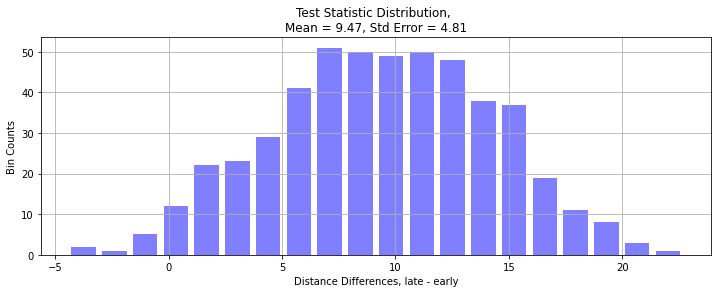

In [5]:
# Create two poulations, sample_distances for early and late sample_times.
# Then resample with replacement, taking 500 random draws from each population.
group_duration_short = sample_distances[sample_times < 5]
group_duration_long = sample_distances[sample_times > 5]
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)

# Difference the resamples to compute a test statistic distribution, then compute its mean and stdev
test_statistic = resample_long - resample_short
effect_size = np.mean(test_statistic)
standard_error = np.std(test_statistic)

# Print and plot the results
print('Test Statistic: mean={:0.2f}, stdev={:0.2f}'.format(effect_size, standard_error))
fig = plot_test_statistic(test_statistic)

## Null Hypothesis

In this exercise, we formulate the null hypothesis as

short and long time durations have no effect on total distance traveled.
We interpret the "zero effect size" to mean that if we shuffled samples between short and long times, so that two new samples each have a mix of short and long duration trips, and then compute the test statistic, on average it will be zero.

In this exercise, your goal is to perform the shuffling and resampling. Start with the predefined group_duration_short and group_duration_long which are the un-shuffled time duration groups.

In [8]:
group_duration_long = np.array([  7.223818  ,  12.98638689,  12.99692991,   7.73692666,
         9.7622794 ,  12.13047302,   8.78848713,   8.02524612,
        11.71513725,  10.45804524,   8.28056703,   8.88167499,
         9.33869962,  11.29476535,   7.87623208,  12.98302322,
        11.20251177,  10.25416315,  11.47955692,   9.2551875 ,
        11.57623195,   9.35040254,  11.16600062,  10.28713184,
        11.01265336,  10.82656392,   8.45722629,   9.5829091 ,
         9.71732339,   9.43935459,   9.51973254,   9.72047091,
        10.36303964,   9.02033575,  10.61778086,   9.68811093,
        12.06489065,   7.21809298,   9.06908207,  13.61769939,
        12.4556083 ,  12.34807702,  11.25686759,  14.30233739,
         8.62599779,   9.85183845,  13.23866017,  10.69738869,
        11.44865914,   7.52073719,  12.97000918,   7.82788425,
        11.97421109,   9.45299413,   9.68678744,  12.94820746,
        11.50300078,  15.16235492,  14.10727483,  11.80146458,
        12.56248879,   9.85311967,  13.46874799,  11.89755421,
         9.26426721,  10.02437931,   5.28793786,  12.33143958,
        12.56548448,  13.67746176,  10.60928025,  12.12971198,
         9.63518828,  10.41572102,  12.05781396,  11.89942077,
        11.99913624,  12.64292516,  14.14087468,   9.26238991,
        10.2824914 ,  13.95516965,  11.04563563,  16.23037126,
         9.07397159,  14.71796814,  11.00060472,  11.8491241 ,
        13.52701805,  11.88998803,  11.89991354,  11.99718912,
        10.27892142,   9.62568268,  11.78844005,  10.88062795,
        13.993673  ,  15.18350194,   8.28003378,   9.3817541 ,
        10.8574277 ,  13.1306888 ,  12.57924505,  12.90315249,
         9.57929881,  12.59181941,  12.96085838,  16.98861081,
        11.13223473,  10.82893944,  12.36398705,  10.61112896,
        10.51309146,  15.21657882,  13.92936552,  11.88640605,
        15.17788685,  10.0924723 ,  10.62983428,  13.6407813 ,
        10.64323241,  14.65591746,  11.19131314,   9.7126009 ,
         8.43449587,  12.12595769,  11.30595643,  16.78506618,
        17.45655598,  14.77291359,  15.24714701,  11.64077787,
         9.98812483,  10.1786113 ,  14.86052413,  11.55545957,
        13.45509868,  16.64522333,   9.58273564,  14.79421804,
        12.38137652,  12.68759045,  15.74960937,  10.68378826,
        11.59847406,  12.14562367,  14.01811412,  11.18847676,
        16.7923697 ,  14.91954036,  15.51281348,  13.97011121,
        10.35031759,  12.33620583,  12.19977498,  13.13134038,
        13.11873418,  16.17944536,  15.41613496,  10.12273088,
        12.14267402,  14.22851723,  12.32247669,  14.70587018,
        12.10055527,  15.42729795,  10.01008474,  14.6663167 ,
        17.74257149,  15.2697801 ,  13.05134471,  11.84625772,
        17.40441308,  14.83165601,  10.28650323,  11.02568593,
        16.46630715,  15.08187132,  15.12419277,  11.34779707,
        13.82833818,  14.66526638,  12.6393861 ,  12.51280856,
        15.25657764,  10.13356255,  13.91132268,  11.23571084,
        15.42417462,  17.3707364 ,  16.64177261,  17.72409808,
         9.41607453,  16.53515878,  12.21953854,  16.67547274,
        13.46218799,  15.15966674,  13.72042994,  11.37580551,
        15.88324379,  14.89763718,  10.58092216,  14.15869567,
        16.41194698,  14.08076609,  17.96838511,  15.92889777,
        19.60090751,  14.73160746,  14.31142765,  11.95992006,
        14.64104662,  10.89785857,  13.38523417,  11.49058576,
        14.08060248,  12.19694956,  13.96557956,  14.71921128,
        14.95889894,  15.25652072,  13.52111692,  10.68453606,
        15.06458334,  13.2316274 ,  17.34996177,  13.00112468,
        14.61085122,  12.76603324,  11.05852336,  14.29668847,
        12.11331644,  13.95225264,  16.07540931,  14.78109301,
        16.54024746,  14.14927796,  11.18285577,  16.44415096,
        12.53118056,  10.74918546,  18.53090914,  17.50822902,
        14.82134302,  12.86465948,  10.16038625,  17.05710949,
        11.66150177,  16.86612309,  15.93494414,  14.37036819,
        14.9618955 ,  16.61265096,  15.62534931,  17.12168931,
        15.20373403,  15.95503481,  10.71767275,  15.68050559,
        13.11436352,  16.45526958,  15.31533144,  16.894958  ,
        13.84224442,  15.59994266,  17.40184751,  13.96371245,
        12.71653729,  13.75707566,  18.37385635,  16.57102416,
        13.1688903 ,  18.78725538,  17.48491832,  16.09518131,
        13.22819379,  14.10645763,  13.8452007 ,  14.02546266,
        15.66815208,  17.44402147,  14.04568116,  14.41245771,
        19.36095078,  14.36320456,  14.09893458,  13.97247937,
        15.49951465,  12.9265651 ,  14.7405213 ,  17.74462464,
        17.21536957,  14.22932654,  17.33151404,  15.85165427,
        16.46348569,  19.83965292,  14.9225802 ,  15.40669735,
        13.62781297,  16.86763978,  13.72034487,  18.40649823,
        13.13653898,  16.19900986,  17.58430471,  16.60985881,
        16.09145692,  15.06772229,  11.06921649,  17.79362149,
        13.75617877,  16.34111518,  14.75174571,  16.91862675,
        15.31936897,  14.30743376,  14.57354549,  16.67553764,
        16.97392237,  17.8078217 ,  12.6124132 ,  10.81846323,
        18.64854628,  18.38584347,  18.48320413,  18.713642  ,
        15.53516871,  17.31669949,  16.91856098,  14.6813725 ,
        22.22405588,  13.01326406,  15.2962634 ,  16.27809924,
        15.59577549,  14.92089788,  16.40777204,  18.07376165,
        15.01205925,  16.91217584,  19.902611  ,  16.46240854,
        19.94754932,  16.3053758 ,  19.11919475,  16.73256035,
        12.90341044,  13.15616551,  18.51751464,  15.69382811,
        17.13637487,  13.51678997,  17.59559954,  16.19085346,
        15.95844732,  13.61912113,  16.4803304 ,  18.18022961,
        16.5126714 ,  13.72490814,  16.51421585,  15.49142865,
        18.79315673,  18.85231807,  15.35290251,  17.07944999,
        20.11315534,  16.33931703,  18.58330006,  18.50511669,
        14.71930292,  16.94700876,  19.12028309,  21.69107754,
        19.05307792,  17.6963193 ,  17.12624952,  18.80163061,
        18.35486741,  16.21809966,  19.13428999,  19.92515541,
        18.36042842,  15.44874146,  18.41222601,  18.03176121,
        18.46606877,  20.65487579,  20.66056239,  18.15800041,
        16.36248214,  24.06886456,  19.47483363,  17.02227127,
        19.95788695,  18.86228562,  16.35792717,  15.13101061,
        17.54964331,  17.28400165,  18.29536353,  18.84125309,
        18.12435583,  16.68863984,  21.67486084,  19.87655745,
        19.15701819,  20.02549671,  21.15781675,  17.77066667,
        18.78524155,  20.89702231,  14.1946347 ,  19.07055717,
        16.48488545,  19.54578994,  16.94699878,  18.14524721,
        19.13267815,  19.34390267,  15.61619137,  20.74883198,
        16.08312447,  18.16807701,  16.95616584,  16.89184587,
        21.0704369 ,  14.59206311,  20.46395568,  17.96183643,
        17.43356717,  20.7947818 ,  18.90161501,  17.79621306,
        22.1340314 ,  16.50867061,  17.32924357,  17.24200363,
        18.07211837,  20.21966062,  18.76670862,  15.10050904,
        17.11878508,  18.63719595,  20.55172976,  19.32575465,
        21.01493991,  16.06739163,  17.35965351,  16.03418859,
        21.48223188,  18.8815732 ,  20.31951945,  19.8622653 ,
        19.87045426,  18.04477638,  17.13678699,  21.69476718,
        17.8217216 ,  18.32079648,  19.61917645,  19.687449  ,
        21.59999877,  21.32271653,  17.77410854,  19.8006154 ,
        21.99298878,  20.08077838,  19.16458362,  20.9348529 ,
        20.64235547,  19.03515111,  19.65388194,  15.81962923,
        18.26415695,  19.48085386,  19.11596915,  22.43923984,
        23.41184023,  20.39003314,  21.50861812,  19.93364385,
        20.56900944,  21.23771661,  19.05855437,  24.23536424,
        18.69014629,  18.59589821,  21.85105642,  19.91508817,
        19.09539509,  21.90751807,  17.78212345,  20.92042868,
        19.95192933,  18.46832621,  20.16893669,  21.00228602])
group_duration_short = np.array([  0.13200727,   0.        ,   0.        ,   0.        ,
         0.46814951,   0.        ,   0.24079754,   0.29859395,
         0.34472238,   0.41482936,   0.21365293,   0.        ,
         0.19648647,   0.08120946,   0.47181157,   0.53242991,
         0.36836907,   0.63557728,   0.50126495,   0.58070122,
         0.59052163,   0.72011591,   0.42926168,   0.47621439,
         1.04390819,   0.81735809,   0.77611606,   0.7442681 ,
         0.20059962,   0.29544257,   0.52754071,   0.31427003,
         1.04169913,   1.01455874,   1.01981067,   1.04313787,
         1.14656016,   0.96764842,   1.32751842,   0.90599903,
         0.62057587,   0.89081848,   1.12878608,   1.35477292,
         1.14377565,   1.26593329,   1.55354537,   0.79807643,
         1.19635709,   0.83917316,   1.58248295,   1.06937603,
         0.70693339,   1.04836712,   1.51625892,   0.94141276,
         0.96239311,   1.05270657,   1.27800353,   0.41156753,
         1.14531193,   1.42047984,   1.32144384,   1.20321729,
         1.55264411,   0.91953794,   1.1175796 ,   0.80831055,
         0.72823961,   1.68129607,   1.06421308,   1.0457823 ,
         1.90826905,   1.92402358,   1.20520672,   0.97425192,
         1.58074437,   2.06602956,   2.28950244,   2.17476037,
         2.37949646,   2.03999084,   1.46192611,   1.78741737,
         2.52549267,   2.1027831 ,   2.11853352,   1.17866148,
         1.89366631,   1.99333117,   1.87132333,   2.61456093,
         2.91492687,   1.90001967,   2.69938444,   1.494017  ,
         1.95920431,   1.77433781,   1.4898914 ,   1.72094246,
         2.57894637,   1.95671698,   1.40687599,   1.3952549 ,
         1.68607423,   2.02563765,   2.18346659,   2.38965831,
         1.30497555,   2.16599497,   1.67221723,   1.72825264,
         3.29586622,   2.37103745,   2.86540437,   2.16332948,
         3.15286083,   2.13788766,   2.34282258,   1.62216185,
         1.21257967,   3.26868389,   2.33827002,   2.1377369 ,
         1.8316103 ,   3.52000226,   3.04090739,   2.44105644,
         1.78372291,   3.84775871,   2.20776019,   2.08690046,
         2.60445575,   2.49700903,   1.76884259,   3.44046425,
         2.05322405,   2.79099322,   3.38617745,   3.32815652,
         2.84178785,   3.16148388,   2.29752329,   2.95064512,
         2.47138249,   3.18080879,   2.53160129,   2.57349311,
         3.04384699,   3.71270214,   2.84094625,   2.53410651,
         2.237663  ,   3.1642902 ,   3.25393095,   2.88897123,
         4.23710758,   3.52226649,   1.59018844,   3.3041484 ,
         3.68027426,   3.03516222,   3.80964462,   4.74390903,
         2.76608625,   3.09931663,   1.97091745,   3.0446964 ,
         2.34095016,   3.31619806,   3.77082916,   3.87908991,
         3.54630711,   2.41929405,   2.69665875,   3.89206346,
         4.82290928,   3.07214319,   3.80082306,   2.55457255,
         2.08722991,   3.43229806,   2.70369687,   3.5654494 ,
         3.49924091,   3.93014077,   4.77821922,   3.06341814,
         4.6876004 ,   3.66696297,   4.0456067 ,   3.92381692,
         3.67721647,   5.68730091,   2.10144986,   3.91813287,
         3.41448338,   4.88544233,   3.88296274,   5.82391752,
         4.59462522,   5.39893491,   3.1039645 ,   3.92804161,
         3.3810597 ,   3.53346852,   2.35434135,   2.7372081 ,
         2.83047684,   3.40301986,   2.89970936,   3.67180215,
         3.61350812,   4.84003528,   3.85330422,   3.4758061 ,
         5.37803268,   3.20145379,   5.35757063,   5.62133133,
         3.49013438,   2.77560724,   4.75152868,   4.21146912,
         3.15417132,   2.27401148,   6.0868067 ,   4.53123886,
         4.96132688,   2.36939803,   5.35714978,   4.04497809,
         5.77052619,   3.53516278,   5.84884047,   4.30593303,
         5.93748094,   3.71402591,   5.49605305,   6.35160058,
         3.98649875,   4.84367572,   5.0304652 ,   1.92910786,
         4.6127688 ,   4.08643539,   4.48835473,   7.15409398,
         4.73150096,   8.15417987,   4.67977506,   0.75074715,
         3.86437203,   4.39423577,   5.27629762,   5.89364314,
         3.25148591,   6.74622459,   5.66698404,   6.38405595,
         4.89974807,   7.13363055,   5.90564266,   6.81164792,
         6.28452905,   4.36170302,   5.83128381,   3.55394745,
         5.59282084,   6.14924726,   5.97241069,   4.86339237,
         5.95021694,   5.00743299,   5.00510523,   4.86632255,
         6.42270906,   6.79974158,   6.35593677,   6.17894474,
         6.90248119,   6.56695493,   6.25431349,   4.9970443 ,
         5.86205324,   3.07426009,   5.75457474,   3.18911001,
         4.53026546,   5.28605285,   6.07464814,   6.08788431,
         5.67191906,   5.39710926,   6.20906412,   5.01307706,
         5.58278903,   4.33306949,   7.45625422,   5.73914855,
         6.7474658 ,   7.3431414 ,   3.57023247,   6.95421413,
         9.12869108,   6.94036175,   7.48729841,   4.85468532,
         5.48394723,   6.92487329,   5.71341564,   8.72802559,
         4.59892544,   7.13478045,   5.58040581,   2.65780254,
         5.91534605,   9.75483318,   7.10192344,   6.47302471,
         8.20788976,   5.29663378,   9.64744464,   8.10064867,
         5.10259518,   4.96522948,   7.59026665,   4.25755456,
         6.15236929,   9.43006162,   6.29798358,   4.35407578,
        10.755659  ,   5.49513657,   5.79886354,   5.61948953,
         5.46472151,   8.88929436,   6.52445962,   8.34181234,
         7.74085222,   7.94141991,   7.93647651,   5.02191517,
         6.70432934,   7.51731377,   7.28670422,   6.39736028,
         6.84270849,   7.12710237,   7.10175323,   7.7083596 ,
         6.85118784,   6.40601995,   7.84291942,   4.71877194,
         7.59662998,   5.5188476 ,   8.42553961,   6.82071088,
         6.39878043,   2.56152743,   7.02567317,   7.95950475,
         4.63789921,   5.80676333,   4.15807884,   5.89371642,
         4.85200999,   7.94978361,   9.19731878,   9.77604253,
         7.56105302,   6.10148707,   5.50712252,   7.76995058,
         8.05137836,   5.8498283 ,   7.29871778,  10.16901813,
         5.70152957,   5.52460893,   7.29432972,   3.6865686 ,
         7.79106873,   8.04097049,   9.29531249,   9.42815281,
         5.09475752,   7.18660294,   9.69735657,   9.36171204,
         7.11567703,  10.82601525,   6.43492801,   9.73532611,
         9.79030587,   8.41727789,   8.60984385,   8.69680106,
         6.42949993,   6.55818969,   7.31598708,   4.54639538,
        10.91751969,   6.63790278,  10.30715635,   6.29769354,
         8.88969664,   7.95166635,   8.21049401,   4.29809519,
         7.06675751,   8.17797389,   6.3885751 ,   9.29890721,
        10.2427971 ,  12.27896277,   6.66920829,   4.18407809,
         6.89754057,   6.90076668,   5.01544253,   7.68196215,
        10.1684006 ,   9.80613483,   6.2589972 ,   9.58495335,
        10.22715917,   8.14537164,   7.68250687,   9.84638288,
        10.50663713,  12.34019558,   9.53704941,   7.24011714,
         7.78209017,   6.85261792,   8.15809217,   7.86727976,
         6.17179337,  11.59059353,   9.01727585,   8.93888385,
         8.62387994,   6.72298649,   7.62531825,   8.72899088,
         8.69832391,   9.60906748,   8.42220779,   8.67642505,
         9.03542351,   7.80459038,   8.17528778,   8.94468522,
        10.30957207,   8.06240474,   9.63398164,  10.86526992,
        10.67349089,   6.93320145,   8.09351226,   7.95271467,
        11.39805267,  11.22464125,   8.31161512,   7.69313208,
        11.31578957,  11.73739677,   6.56719062,   6.32887694,
        10.34197745,  11.0774483 ,   7.32019031,   8.49115211,
         7.53031074,  10.50377143,   9.51088253,  10.2573092 ,
        10.57072759,   9.94598145,  13.02852071,  10.78236013,
        11.92176445,   9.02412145,  14.29109923,   9.82628798,
        10.70015635,   9.55639089,  12.35907435,   9.91264352,
         6.20259893,  13.79182335,  12.85490236,  10.01747034,
        10.98966063,   9.24467549,  10.25383914,   8.81302779])

In [12]:
# Shuffle the time-ordered distances, then slice the result into two populations.
shuffle_bucket = np.concatenate((group_duration_short, group_duration_long))
np.random.shuffle(shuffle_bucket)
slice_index = len(shuffle_bucket)//2
shuffled_half1 = shuffle_bucket[0:slice_index]
shuffled_half2 = shuffle_bucket[slice_index:]

# Create new samples from each shuffled population, and compute the test statistic
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic = resample_half2 - resample_half1

# Compute and print the effect size
effect_size = np.mean(test_statistic)
print('Test Statistic, after shuffling, mean = {}'.format(effect_size))

Test Statistic, after shuffling, mean = 0.9948287795999999


## Visualizing Test Statistics

In this exercise, you will approach the null hypothesis by comparing the distribution of a test statistic arrived at from two different ways.

First, you will examine two "populations", grouped by early and late times, and computing the test statistic distribution. Second, shuffle the two populations, so the data is no longer time ordered, and each has a mix of early and late times, and then recompute the test statistic distribution.

To get you started, we've pre-loaded the two time duration groups, group_duration_short and group_duration_long, and two functions, shuffle_and_split() and plot_test_statistic().

In [13]:
group_duration_long = np.array([  7.223818  ,  12.98638689,  12.99692991,   7.73692666,
         9.7622794 ,  12.13047302,   8.78848713,   8.02524612,
        11.71513725,  10.45804524,   8.28056703,   8.88167499,
         9.33869962,  11.29476535,   7.87623208,  12.98302322,
        11.20251177,  10.25416315,  11.47955692,   9.2551875 ,
        11.57623195,   9.35040254,  11.16600062,  10.28713184,
        11.01265336,  10.82656392,   8.45722629,   9.5829091 ,
         9.71732339,   9.43935459,   9.51973254,   9.72047091,
        10.36303964,   9.02033575,  10.61778086,   9.68811093,
        12.06489065,   7.21809298,   9.06908207,  13.61769939,
        12.4556083 ,  12.34807702,  11.25686759,  14.30233739,
         8.62599779,   9.85183845,  13.23866017,  10.69738869,
        11.44865914,   7.52073719,  12.97000918,   7.82788425,
        11.97421109,   9.45299413,   9.68678744,  12.94820746,
        11.50300078,  15.16235492,  14.10727483,  11.80146458,
        12.56248879,   9.85311967,  13.46874799,  11.89755421,
         9.26426721,  10.02437931,   5.28793786,  12.33143958,
        12.56548448,  13.67746176,  10.60928025,  12.12971198,
         9.63518828,  10.41572102,  12.05781396,  11.89942077,
        11.99913624,  12.64292516,  14.14087468,   9.26238991,
        10.2824914 ,  13.95516965,  11.04563563,  16.23037126,
         9.07397159,  14.71796814,  11.00060472,  11.8491241 ,
        13.52701805,  11.88998803,  11.89991354,  11.99718912,
        10.27892142,   9.62568268,  11.78844005,  10.88062795,
        13.993673  ,  15.18350194,   8.28003378,   9.3817541 ,
        10.8574277 ,  13.1306888 ,  12.57924505,  12.90315249,
         9.57929881,  12.59181941,  12.96085838,  16.98861081,
        11.13223473,  10.82893944,  12.36398705,  10.61112896,
        10.51309146,  15.21657882,  13.92936552,  11.88640605,
        15.17788685,  10.0924723 ,  10.62983428,  13.6407813 ,
        10.64323241,  14.65591746,  11.19131314,   9.7126009 ,
         8.43449587,  12.12595769,  11.30595643,  16.78506618,
        17.45655598,  14.77291359,  15.24714701,  11.64077787,
         9.98812483,  10.1786113 ,  14.86052413,  11.55545957,
        13.45509868,  16.64522333,   9.58273564,  14.79421804,
        12.38137652,  12.68759045,  15.74960937,  10.68378826,
        11.59847406,  12.14562367,  14.01811412,  11.18847676,
        16.7923697 ,  14.91954036,  15.51281348,  13.97011121,
        10.35031759,  12.33620583,  12.19977498,  13.13134038,
        13.11873418,  16.17944536,  15.41613496,  10.12273088,
        12.14267402,  14.22851723,  12.32247669,  14.70587018,
        12.10055527,  15.42729795,  10.01008474,  14.6663167 ,
        17.74257149,  15.2697801 ,  13.05134471,  11.84625772,
        17.40441308,  14.83165601,  10.28650323,  11.02568593,
        16.46630715,  15.08187132,  15.12419277,  11.34779707,
        13.82833818,  14.66526638,  12.6393861 ,  12.51280856,
        15.25657764,  10.13356255,  13.91132268,  11.23571084,
        15.42417462,  17.3707364 ,  16.64177261,  17.72409808,
         9.41607453,  16.53515878,  12.21953854,  16.67547274,
        13.46218799,  15.15966674,  13.72042994,  11.37580551,
        15.88324379,  14.89763718,  10.58092216,  14.15869567,
        16.41194698,  14.08076609,  17.96838511,  15.92889777,
        19.60090751,  14.73160746,  14.31142765,  11.95992006,
        14.64104662,  10.89785857,  13.38523417,  11.49058576,
        14.08060248,  12.19694956,  13.96557956,  14.71921128,
        14.95889894,  15.25652072,  13.52111692,  10.68453606,
        15.06458334,  13.2316274 ,  17.34996177,  13.00112468,
        14.61085122,  12.76603324,  11.05852336,  14.29668847,
        12.11331644,  13.95225264,  16.07540931,  14.78109301,
        16.54024746,  14.14927796,  11.18285577,  16.44415096,
        12.53118056,  10.74918546,  18.53090914,  17.50822902,
        14.82134302,  12.86465948,  10.16038625,  17.05710949,
        11.66150177,  16.86612309,  15.93494414,  14.37036819,
        14.9618955 ,  16.61265096,  15.62534931,  17.12168931,
        15.20373403,  15.95503481,  10.71767275,  15.68050559,
        13.11436352,  16.45526958,  15.31533144,  16.894958  ,
        13.84224442,  15.59994266,  17.40184751,  13.96371245,
        12.71653729,  13.75707566,  18.37385635,  16.57102416,
        13.1688903 ,  18.78725538,  17.48491832,  16.09518131,
        13.22819379,  14.10645763,  13.8452007 ,  14.02546266,
        15.66815208,  17.44402147,  14.04568116,  14.41245771,
        19.36095078,  14.36320456,  14.09893458,  13.97247937,
        15.49951465,  12.9265651 ,  14.7405213 ,  17.74462464,
        17.21536957,  14.22932654,  17.33151404,  15.85165427,
        16.46348569,  19.83965292,  14.9225802 ,  15.40669735,
        13.62781297,  16.86763978,  13.72034487,  18.40649823,
        13.13653898,  16.19900986,  17.58430471,  16.60985881,
        16.09145692,  15.06772229,  11.06921649,  17.79362149,
        13.75617877,  16.34111518,  14.75174571,  16.91862675,
        15.31936897,  14.30743376,  14.57354549,  16.67553764,
        16.97392237,  17.8078217 ,  12.6124132 ,  10.81846323,
        18.64854628,  18.38584347,  18.48320413,  18.713642  ,
        15.53516871,  17.31669949,  16.91856098,  14.6813725 ,
        22.22405588,  13.01326406,  15.2962634 ,  16.27809924,
        15.59577549,  14.92089788,  16.40777204,  18.07376165,
        15.01205925,  16.91217584,  19.902611  ,  16.46240854,
        19.94754932,  16.3053758 ,  19.11919475,  16.73256035,
        12.90341044,  13.15616551,  18.51751464,  15.69382811,
        17.13637487,  13.51678997,  17.59559954,  16.19085346,
        15.95844732,  13.61912113,  16.4803304 ,  18.18022961,
        16.5126714 ,  13.72490814,  16.51421585,  15.49142865,
        18.79315673,  18.85231807,  15.35290251,  17.07944999,
        20.11315534,  16.33931703,  18.58330006,  18.50511669,
        14.71930292,  16.94700876,  19.12028309,  21.69107754,
        19.05307792,  17.6963193 ,  17.12624952,  18.80163061,
        18.35486741,  16.21809966,  19.13428999,  19.92515541,
        18.36042842,  15.44874146,  18.41222601,  18.03176121,
        18.46606877,  20.65487579,  20.66056239,  18.15800041,
        16.36248214,  24.06886456,  19.47483363,  17.02227127,
        19.95788695,  18.86228562,  16.35792717,  15.13101061,
        17.54964331,  17.28400165,  18.29536353,  18.84125309,
        18.12435583,  16.68863984,  21.67486084,  19.87655745,
        19.15701819,  20.02549671,  21.15781675,  17.77066667,
        18.78524155,  20.89702231,  14.1946347 ,  19.07055717,
        16.48488545,  19.54578994,  16.94699878,  18.14524721,
        19.13267815,  19.34390267,  15.61619137,  20.74883198,
        16.08312447,  18.16807701,  16.95616584,  16.89184587,
        21.0704369 ,  14.59206311,  20.46395568,  17.96183643,
        17.43356717,  20.7947818 ,  18.90161501,  17.79621306,
        22.1340314 ,  16.50867061,  17.32924357,  17.24200363,
        18.07211837,  20.21966062,  18.76670862,  15.10050904,
        17.11878508,  18.63719595,  20.55172976,  19.32575465,
        21.01493991,  16.06739163,  17.35965351,  16.03418859,
        21.48223188,  18.8815732 ,  20.31951945,  19.8622653 ,
        19.87045426,  18.04477638,  17.13678699,  21.69476718,
        17.8217216 ,  18.32079648,  19.61917645,  19.687449  ,
        21.59999877,  21.32271653,  17.77410854,  19.8006154 ,
        21.99298878,  20.08077838,  19.16458362,  20.9348529 ,
        20.64235547,  19.03515111,  19.65388194,  15.81962923,
        18.26415695,  19.48085386,  19.11596915,  22.43923984,
        23.41184023,  20.39003314,  21.50861812,  19.93364385,
        20.56900944,  21.23771661,  19.05855437,  24.23536424,
        18.69014629,  18.59589821,  21.85105642,  19.91508817,
        19.09539509,  21.90751807,  17.78212345,  20.92042868,
        19.95192933,  18.46832621,  20.16893669])
group_duration_short = np.array([  0.13200727,   0.        ,   0.        ,   0.        ,
         0.46814951,   0.        ,   0.24079754,   0.29859395,
         0.34472238,   0.41482936,   0.21365293,   0.        ,
         0.19648647,   0.08120946,   0.47181157,   0.53242991,
         0.36836907,   0.63557728,   0.50126495,   0.58070122,
         0.59052163,   0.72011591,   0.42926168,   0.47621439,
         1.04390819,   0.81735809,   0.77611606,   0.7442681 ,
         0.20059962,   0.29544257,   0.52754071,   0.31427003,
         1.04169913,   1.01455874,   1.01981067,   1.04313787,
         1.14656016,   0.96764842,   1.32751842,   0.90599903,
         0.62057587,   0.89081848,   1.12878608,   1.35477292,
         1.14377565,   1.26593329,   1.55354537,   0.79807643,
         1.19635709,   0.83917316,   1.58248295,   1.06937603,
         0.70693339,   1.04836712,   1.51625892,   0.94141276,
         0.96239311,   1.05270657,   1.27800353,   0.41156753,
         1.14531193,   1.42047984,   1.32144384,   1.20321729,
         1.55264411,   0.91953794,   1.1175796 ,   0.80831055,
         0.72823961,   1.68129607,   1.06421308,   1.0457823 ,
         1.90826905,   1.92402358,   1.20520672,   0.97425192,
         1.58074437,   2.06602956,   2.28950244,   2.17476037,
         2.37949646,   2.03999084,   1.46192611,   1.78741737,
         2.52549267,   2.1027831 ,   2.11853352,   1.17866148,
         1.89366631,   1.99333117,   1.87132333,   2.61456093,
         2.91492687,   1.90001967,   2.69938444,   1.494017  ,
         1.95920431,   1.77433781,   1.4898914 ,   1.72094246,
         2.57894637,   1.95671698,   1.40687599,   1.3952549 ,
         1.68607423,   2.02563765,   2.18346659,   2.38965831,
         1.30497555,   2.16599497,   1.67221723,   1.72825264,
         3.29586622,   2.37103745,   2.86540437,   2.16332948,
         3.15286083,   2.13788766,   2.34282258,   1.62216185,
         1.21257967,   3.26868389,   2.33827002,   2.1377369 ,
         1.8316103 ,   3.52000226,   3.04090739,   2.44105644,
         1.78372291,   3.84775871,   2.20776019,   2.08690046,
         2.60445575,   2.49700903,   1.76884259,   3.44046425,
         2.05322405,   2.79099322,   3.38617745,   3.32815652,
         2.84178785,   3.16148388,   2.29752329,   2.95064512,
         2.47138249,   3.18080879,   2.53160129,   2.57349311,
         3.04384699,   3.71270214,   2.84094625,   2.53410651,
         2.237663  ,   3.1642902 ,   3.25393095,   2.88897123,
         4.23710758,   3.52226649,   1.59018844,   3.3041484 ,
         3.68027426,   3.03516222,   3.80964462,   4.74390903,
         2.76608625,   3.09931663,   1.97091745,   3.0446964 ,
         2.34095016,   3.31619806,   3.77082916,   3.87908991,
         3.54630711,   2.41929405,   2.69665875,   3.89206346,
         4.82290928,   3.07214319,   3.80082306,   2.55457255,
         2.08722991,   3.43229806,   2.70369687,   3.5654494 ,
         3.49924091,   3.93014077,   4.77821922,   3.06341814,
         4.6876004 ,   3.66696297,   4.0456067 ,   3.92381692,
         3.67721647,   5.68730091,   2.10144986,   3.91813287,
         3.41448338,   4.88544233,   3.88296274,   5.82391752,
         4.59462522,   5.39893491,   3.1039645 ,   3.92804161,
         3.3810597 ,   3.53346852,   2.35434135,   2.7372081 ,
         2.83047684,   3.40301986,   2.89970936,   3.67180215,
         3.61350812,   4.84003528,   3.85330422,   3.4758061 ,
         5.37803268,   3.20145379,   5.35757063,   5.62133133,
         3.49013438,   2.77560724,   4.75152868,   4.21146912,
         3.15417132,   2.27401148,   6.0868067 ,   4.53123886,
         4.96132688,   2.36939803,   5.35714978,   4.04497809,
         5.77052619,   3.53516278,   5.84884047,   4.30593303,
         5.93748094,   3.71402591,   5.49605305,   6.35160058,
         3.98649875,   4.84367572,   5.0304652 ,   1.92910786,
         4.6127688 ,   4.08643539,   4.48835473,   7.15409398,
         4.73150096,   8.15417987,   4.67977506,   0.75074715,
         3.86437203,   4.39423577,   5.27629762,   5.89364314,
         3.25148591,   6.74622459,   5.66698404,   6.38405595,
         4.89974807,   7.13363055,   5.90564266,   6.81164792,
         6.28452905,   4.36170302,   5.83128381,   3.55394745,
         5.59282084,   6.14924726,   5.97241069,   4.86339237,
         5.95021694,   5.00743299,   5.00510523,   4.86632255,
         6.42270906,   6.79974158,   6.35593677,   6.17894474,
         6.90248119,   6.56695493,   6.25431349,   4.9970443 ,
         5.86205324,   3.07426009,   5.75457474,   3.18911001,
         4.53026546,   5.28605285,   6.07464814,   6.08788431,
         5.67191906,   5.39710926,   6.20906412,   5.01307706,
         5.58278903,   4.33306949,   7.45625422,   5.73914855,
         6.7474658 ,   7.3431414 ,   3.57023247,   6.95421413,
         9.12869108,   6.94036175,   7.48729841,   4.85468532,
         5.48394723,   6.92487329,   5.71341564,   8.72802559,
         4.59892544,   7.13478045,   5.58040581,   2.65780254,
         5.91534605,   9.75483318,   7.10192344,   6.47302471,
         8.20788976,   5.29663378,   9.64744464,   8.10064867,
         5.10259518,   4.96522948,   7.59026665,   4.25755456,
         6.15236929,   9.43006162,   6.29798358,   4.35407578,
        10.755659  ,   5.49513657,   5.79886354,   5.61948953,
         5.46472151,   8.88929436,   6.52445962,   8.34181234,
         7.74085222,   7.94141991,   7.93647651,   5.02191517,
         6.70432934,   7.51731377,   7.28670422,   6.39736028,
         6.84270849,   7.12710237,   7.10175323,   7.7083596 ,
         6.85118784,   6.40601995,   7.84291942,   4.71877194,
         7.59662998,   5.5188476 ,   8.42553961,   6.82071088,
         6.39878043,   2.56152743,   7.02567317,   7.95950475,
         4.63789921,   5.80676333,   4.15807884,   5.89371642,
         4.85200999,   7.94978361,   9.19731878,   9.77604253,
         7.56105302,   6.10148707,   5.50712252,   7.76995058,
         8.05137836,   5.8498283 ,   7.29871778,  10.16901813,
         5.70152957,   5.52460893,   7.29432972,   3.6865686 ,
         7.79106873,   8.04097049,   9.29531249,   9.42815281,
         5.09475752,   7.18660294,   9.69735657,   9.36171204,
         7.11567703,  10.82601525,   6.43492801,   9.73532611,
         9.79030587,   8.41727789,   8.60984385,   8.69680106,
         6.42949993,   6.55818969,   7.31598708,   4.54639538,
        10.91751969,   6.63790278,  10.30715635,   6.29769354,
         8.88969664,   7.95166635,   8.21049401,   4.29809519,
         7.06675751,   8.17797389,   6.3885751 ,   9.29890721,
        10.2427971 ,  12.27896277,   6.66920829,   4.18407809,
         6.89754057,   6.90076668,   5.01544253,   7.68196215,
        10.1684006 ,   9.80613483,   6.2589972 ,   9.58495335,
        10.22715917,   8.14537164,   7.68250687,   9.84638288,
        10.50663713,  12.34019558,   9.53704941,   7.24011714,
         7.78209017,   6.85261792,   8.15809217,   7.86727976,
         6.17179337,  11.59059353,   9.01727585,   8.93888385,
         8.62387994,   6.72298649,   7.62531825,   8.72899088,
         8.69832391,   9.60906748,   8.42220779,   8.67642505,
         9.03542351,   7.80459038,   8.17528778,   8.94468522,
        10.30957207,   8.06240474,   9.63398164,  10.86526992,
        10.67349089,   6.93320145,   8.09351226,   7.95271467,
        11.39805267,  11.22464125,   8.31161512,   7.69313208,
        11.31578957,  11.73739677,   6.56719062,   6.32887694,
        10.34197745,  11.0774483 ,   7.32019031,   8.49115211,
         7.53031074,  10.50377143,   9.51088253,  10.2573092 ,
        10.57072759,   9.94598145,  13.02852071,  10.78236013,
        11.92176445,   9.02412145,  14.29109923,   9.82628798,
        10.70015635,   9.55639089,  12.35907435,   9.91264352,
         6.20259893,  13.79182335,  12.85490236,  10.01747034,
        10.98966063,   9.24467549,  10.25383914,   8.81302779])

In [15]:
def shuffle_and_split(sample1, sample2):
    shuffled = np.concatenate((sample1, sample2))
    np.random.shuffle( shuffled )
    half_length = len(shuffled)//2
    sample1 = shuffled[0:half_length]
    sample2 = shuffled[half_length+1:]
    return sample1, sample2

In [16]:
def plot_test_statistic(test_statistic, label=''):
    """
    Purpose:
        Plot the test statistic array as a histogram
    Args:
        test_statistic (np.array): an array of test statistic values, e.g. resample2 - resample1
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    t_mean = np.mean(test_statistic)
    t_std = np.std(test_statistic)
    t_min = np.min(test_statistic)
    t_max = np.max(test_statistic)
    # bin_edges = np.linspace(t_min, t_max, 21)
    bin_edges = np.linspace(-25, 25, 51)
    data_opts = dict(rwidth=0.8, color='blue', alpha=0.5)
    fig, axis = plt.subplots(figsize=(12,4))
    plt.hist(test_statistic, bins=bin_edges, **data_opts)
    axis.grid()
    axis.set_ylim(-5, +55)
    axis.set_xlim(-25, +25)
    axis.set_ylabel("Bin Counts")
    axis.set_xlabel("Test Statistic Values".format(label))
    title_form = "{} Groups: Test Statistic Distribution, \nMean = {:0.2f}, Std Error = {:0.2f}"
    axis.set_title(title_form.format(label, t_mean, t_std))
    plt.show()
    return fig

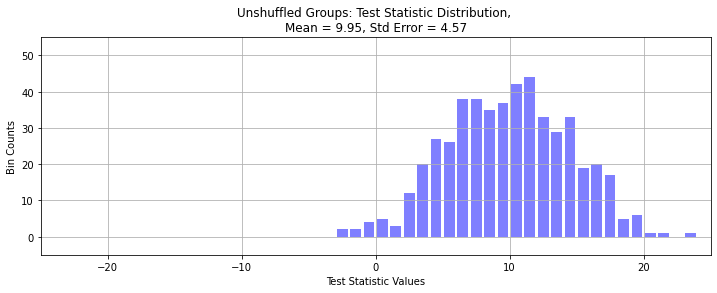

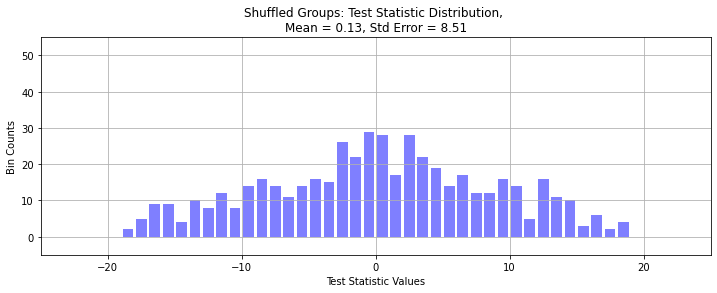

In [17]:
# From the unshuffled groups, compute the test statistic distribution
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)
test_statistic_unshuffled = resample_long - resample_short

# Shuffle two populations, cut in half, and recompute the test statistic
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic_shuffled = resample_half2 - resample_half1

# Plot both the unshuffled and shuffled results and compare
fig = plot_test_statistic(test_statistic_unshuffled, label='Unshuffled')
fig = plot_test_statistic(test_statistic_shuffled, label='Shuffled')

## Visualizing the P-Value

In this exercise, you will visualize the p-value, the chance that the effect (or "speed") we estimated, was the result of random variation in the sample. Your goal is to visualize this as the fraction of points in the shuffled test statistic distribution that fall to the right of the mean of the test statistic ("effect size") computed from the unshuffled samples.

To get you started, we've preloaded the group_duration_short and group_duration_long and functions compute_test_statistic(), shuffle_and_split(), and plot_test_statistic_effect()

In [18]:
def compute_test_statistic(sample1, sample2):
    resample1 = np.random.choice(sample1, size=500, replace=True)
    resample2 = np.random.choice(sample2, size=500, replace=True)
    test_statistic = resample2 - resample1
    return test_statistic

In [19]:
def plot_test_stats_and_pvalue(test_statistic, shuffle_statistic):
    """
    Purpose: 
        Plot the test statistic array as a histogram
    Args:
        test_statistic (np.array): an array of test statistic values, e.g. resample2 - resample1
        shuffle_statistic (np.array): an array of test statistic values, from shuffled resamples
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    t_mean = np.mean(test_statistic)
    t_std = np.std(test_statistic)
    t_min = np.min(test_statistic)
    t_max = np.max(test_statistic)
    effect_size = np.mean(test_statistic)
    p_value = len(shuffle_statistic[shuffle_statistic>=effect_size])/len(shuffle_statistic)
    # bin_edges = np.linspace(t_min, t_max, 21)
    bin_edges = np.linspace(-25, 25, 51)
    shuffle_opts = dict(rwidth=0.8, color='blue', alpha=0.35, label='Shuffled')
    test_opts = dict(rwidth=0.8, color='red', alpha=0.35, label='Unshuffled')
    fig, axis = plt.subplots(figsize=(12,4))
    plt.hist(test_statistic, bins=bin_edges, **test_opts)
    plt.hist(shuffle_statistic, bins=bin_edges, **shuffle_opts)
    axis.axvline(effect_size, color='black', label='Effect Size')
    axis.axvspan(effect_size, +25, alpha=0.10, color='black', label='p-value')
    axis.grid()
    # axis.set_ylim(-5, +55)
    axis.set_xlim(-25, +25)
    axis.set_ylabel("Bin Counts")
    axis.set_xlabel("Test Statistic Values")
    title_form = ("Test Statistic Distibution, \n"
                  "Effect Size = {:0.2f}, p-value = {:0.02f}")
    axis.set_title(title_form.format(effect_size, p_value))
    axis.legend(loc='upper left')
    plt.show()
    return fig

The p-value is = 0.148


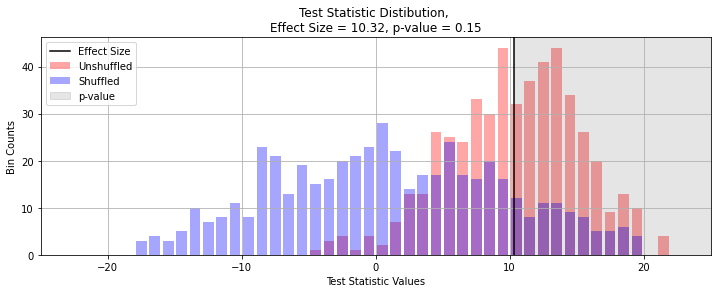

In [20]:
# Compute the test stat distribution and effect size for two population groups
test_statistic_unshuffled = compute_test_statistic(group_duration_short, group_duration_long)
effect_size = np.mean(test_statistic_unshuffled)

# Randomize the two populations, and recompute the test stat distribution
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
test_statistic_shuffled = compute_test_statistic(shuffled_half1, shuffled_half2)

# Compute the p-value as the proportion of shuffled test stat values >= the effect size
condition = test_statistic_shuffled >= effect_size
p_value = len(test_statistic_shuffled[condition]) / len(test_statistic_shuffled)

# Print p-value and overplot the shuffled and unshuffled test statistic distributions
print("The p-value is = {}".format(p_value))
fig = plot_test_stats_and_pvalue(test_statistic_unshuffled, test_statistic_shuffled)